In [2]:
!pip install emcee
!pip install corner


[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.1.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)

100%|██████████| 100/100 [00:00<00:00, 632.72it/s]


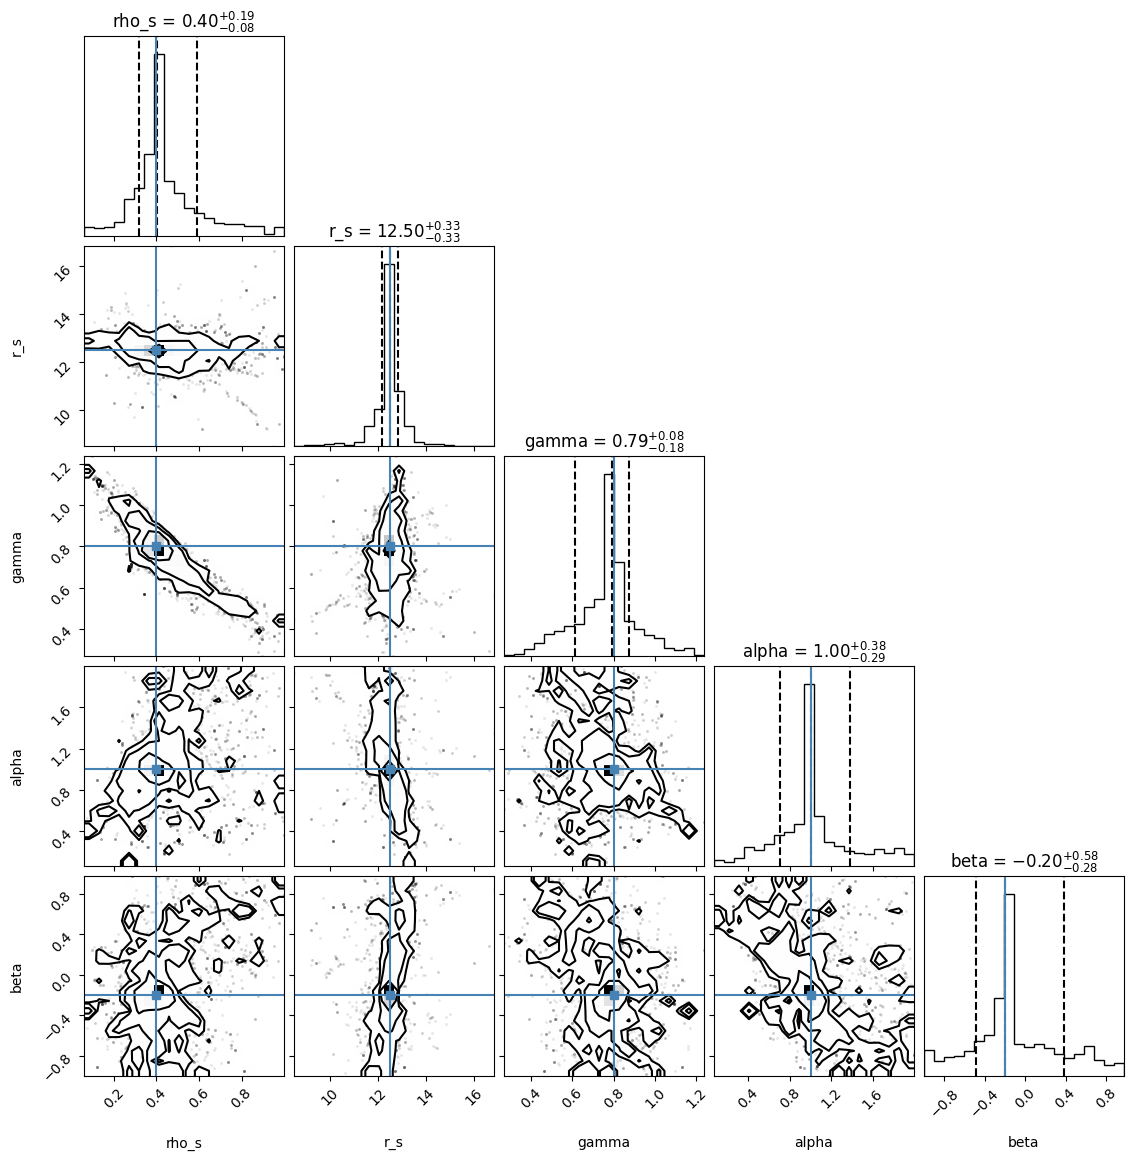

In [4]:
import numpy as np
import emcee
import corner
import matplotlib.pyplot as plt

# Define the gNFW density profile function
def gNFW_density(radius, rho_s, r_s, gamma, alpha, beta):
    x = radius / r_s
    numerator = (x ** (-gamma)) * (1 + x ** alpha) ** ((gamma - beta) / alpha)
    return rho_s * numerator

# Define log-likelihood function
def ln_likelihood(params, radius, data):
    rho_s, r_s, gamma, alpha, beta = params
    model = gNFW_density(radius, rho_s, r_s, gamma, alpha, beta)
    chi_squared = np.sum((data - model) ** 2)
    return -0.5 * chi_squared

# Define log-prior function (uniform priors for simplicity)
def ln_prior(params):
    rho_s, r_s, gamma, alpha, beta = params
    if (0 < rho_s < 1) and (0 < r_s < 40) and (0 < gamma < 3) and (0 < alpha < 2) and (-1 < beta < 1):
        return 0.0
    return -np.inf

# Define log-posterior function
def ln_posterior(params, radius, data):
    prior = ln_prior(params)
    if np.isfinite(prior):
        return prior + ln_likelihood(params, radius, data)
    else:
        return -np.inf

# Generate mock data
np.random.seed(42)
radius = np.linspace(1, 10, 100)
true_params = [0.4, 12.5, 0.8, 1.0, -0.2]  # Example true parameters
data = gNFW_density(radius, *true_params) + np.random.normal(0, 0.1, len(radius))

# Set up MCMC sampler
ndim = 5  # Number of parameters
nwalkers = 50  # Number of walkers
nsteps = 100  # Number of MCMC steps

# Initialize walkers with slight perturbation around the true parameters
p0 = [true_params + 1e-4 * np.random.randn(ndim) for _ in range(nwalkers)]

# Set up the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, ln_posterior, args=(radius, data))

# Run MCMC sampling
sampler.run_mcmc(p0, nsteps, progress=True)

# Extract samples
samples = sampler.chain[:, :, :].reshape((-1, ndim))

# Plot corner plot
labels = ["rho_s", "r_s", "gamma", "alpha", "beta"]  # Parameter labels
fig = corner.corner(samples, labels=labels, truths=true_params, quantiles=[0.16, 0.5, 0.84],
                    show_titles=True, title_kwargs={"fontsize": 12})

plt.show()


In [5]:
a=[1.5
,1.6
,1.7
,1.8
,1.9
,2
,2.1
,2.2
,2.3
,2.4
,2.5
,2.6
,2.7
,2.8
,2.9
,3
,3.1
,3.2
,3.3
,3.4
,3.5
,3.6
,3.7
,3.8
,3.9
,4
,4.1
,4.2
,4.3
,4.4
,4.5]
b=[-31
,-20
,-28
,-24
,-16
,-10
,-22
,-16
,-1
,-12
,-18
,-25
,-23
,-29
,-17
,-7
,-6
,2
,8
,12
,18
,29
,7
,15
,5
,7
,17
,22
,12
,17
,19
]
c=[-46
,-55
,-61
,-69
,-77
,-85
,-78
,-76
,-81
,-85
,-85
,-90
,-98
,-95
,-115
,-126
,-129
,-131
,-140
,-140
,-135
,-137
,-132
,-134
,-139
,-143
,-145
,-142
,-148
,-152
,-158
]
d=[17
,5
,3
,8
,3
,4
,3
,-13
,-9
,-12
,-2
,1
,7
,-2
,5
,8
,1
,-1
,0
,1
,5
,9
,0
,1
,-6
,-1
,1
,2
,-2
,0
,-2
]
e=[81
,77
,79
,79
,78
,83
,80
,77
,81
,80
,78
,71
,72
,76
,83
,90
,101
,99
,101
,98
,95
,101
,91
,92
,94
,93
,92
,95
,94
,96
,93
]

f=[57
,59
,64
,61
,60
,55
,58
,63
,58
,59
,63
,66
,62
,62
,68
,67
,67
,63
,66
,63
,63
,64
,61
,68
,66
,66
,68
,72
,69
,72
,76
]

g=[38
,37
,38
,40
,40
,39
,38
,42
,40
,40
,42
,42
,39
,41
,40
,42
,43
,42
,44
,43
,44
,44
,44
,43
,43
,41
,44
,45
,48
,46
,46
]
h = [0.25601240211595244, 0.2932505341833706, 0.30256011159158014, 0.2885958342619758, 0.25601240211595244, 0.33048866625078877, 0.33048866625078877, 0.10705969628085973, 0.13498842850548842, 0.14895270583509268, 0.19550041531072043, 0.23273854737813857, 0.22808384745674384, 0.20015511523211515, 0.20015511523211515, 0.24204812478634816, 0.34910782106720784, 0.39100083062144086, 0.34910782106720784, 0.42823896268885897, 0.2979054116701854, 0.4235840852020442, 0.4654770947562772, 0.488750949494091, 0.488750949494091, 0.4654770947562772, 0.4422032400184633, 0.4003102304642303, 0.45616751734806765, 0.42823896268885897, 0.39100083062144086, 0.39100083062144086, 0.33979824365899824, 0.38634595313462605, 0.5148470290183033, 0.48158156809383795, 0.5441991256501151, 0.5441991256501151, 0.5578966997187927, 0.5128902580892665, 0.5539831578607192, 0.6283411634257969, 0.6283411634257969, 0.5989892443594051, 0.6029029637828989, 0.5989892443594051, 0.5989892443594051, 0.5833348993616909, 0.563767012505903, 0.6205140797096498, 0.6576932600576088, 0.700742753192678, 0.6635637504101393, 0.6205140797096498, 0.5676805543639765, 0.51680379994734, 0.5833348993616909, 0.563767012505903, 0.5148470290183033, 0.6576932600576088, 0.6185573087806131, 0.6870451791240006, 0.7555328719019679, 0.8103233457420981, 0.7398785269042538, 0.7105267854032821, 0.7105267854032821, 0.7203108176138859, 0.7516193300438946, 0.7829281976047431, 0.747705788185821, 0.7809714266757063, 0.8142368876001718, 0.8142368876001718, 0.83967526480849, 0.8161936585292086, 0.8064096263186047, 0.7242243594719596, 0.7105267854032821, 0.7457488396913641, 0.7516193300438946, 0.7398785269042538, 0.8435888066665637, 0.859243151664278, 0.8631566935223512, 0.8905520192251264, 0.8905520192251264, 0.9238174801495919, 0.9786075988588819, 0.9238174801495919, 0.9003358738703106, 0.8905520192251264, 0.8905520192251264, 0.9336015123601958, 0.9609964829321307, 0.9981756632800897, 1.0392685630515424, 1.0118734149141873, 0.9316445638657389, 0.8259776907398124, 1.0666635336234773, 1.1136267461820404, 1.1136267461820404, 1.191898648736032, 1.191898648736032, 0.8807679870145225, 0.8807679870145225, 0.9120764994445311, 0.9394716475818862, 0.9629534314265876, 1.05296613712022, 1.0118734149141873, 0.8298912325978861, 0.9003358738703106, 0.9668669732846613, 1.0901451399027586, 1.043182104909616, 1.062749991765404, 0.8788112160854857, 0.8748974966619923, 1.0001326117745466, 0.9570829410740574, 0.9883916310694858, 0.9883916310694858, 0.9981756632800897, 1.0470956467676893, 1.1038427139714362, 1.1155835171110773, 1.1645033230332567, 1.1273241426852973, 1.1566762393171095, 1.1645033230332567, 1.2055958676738692, 1.242775048021828, 1.279954405935207, 1.207552816168326, 1.170373813385787, 1.2662568318665295, 1.319090002081363, 1.3464853277841378, 1.3034358346490686, 1.38170791476848, 1.3836645081320966, 1.4404115753358435, 1.4091028853404153, 1.3738804759214929, 1.319090002081363, 1.2936518024384644, 1.244731818950865, 1.2310344224476075, 1.1410217167539753, 1.0823180561866117, 1.1449356137428888, 1.1038427139714362, 1.1410217167539753, 1.1723305843148237, 1.225163932095077, 1.2838679477932808, 1.043182104909616, 1.1155835171110773, 1.2036392743102524, 1.2642998833720729, 1.2975656994273783, 1.3014788861546118, 1.2369047352347176, 1.3543124115002851, 1.4149733756929455, 1.475633984754766, 1.5186831227589948, 1.5871711706678027, 1.4932451006815168, 1.5695602323064715, 1.4169299690565622, 1.3719238825578761, 1.3445285568551009, 1.3347447022099173, 1.3327879312808804, 1.3523558181366684, 1.3777940177795664, 1.3797509662740235, 1.4071459368459582, 1.463893004049705, 1.4247574079035494, 1.5245541458077858, 1.481504119976456, 1.4991152359032072, 1.454109149404521, 1.428670949761623, 1.446282065688374, 1.4991152359032072, 1.471720087765852, 1.530424103464056, 1.5186831227589948, 1.5460786260271902, 1.5773873160226188, 1.6615295313637204, 1.5715170032355084, 1.5362947713820063, 1.5969553804438266, 1.6517453215876965, 1.6830543667139652, 1.7143630567093937, 1.7632830401969937, 1.796548501121459, 1.6615295313637204, 1.7143630567093937, 1.724147266485418, 1.7906781883343486, 1.8219865231989372, 1.8552523392542426, 1.780894333689165, 1.8200301074007401, 1.7163198276384304, 1.6106531320779243, 1.5793440869516555, 1.831770732974961, 1.7280604532126513, 1.6615295313637204, 1.6282640704392553, 1.6204369867231079, 1.5773873160226188, 1.6439182378715496, 1.6282640704392553, 1.6263072995102184, 1.5793440869516555, 1.5343380004529696, 1.7280604532126513, 1.767196582055067, 1.8200301074007401, 1.8122026685537531, 1.8122026685537531, 1.7084923887914434, 1.7084923887914434, 1.75936949833892, 1.8024188139085693, 1.86895009088834, 1.86895009088834, 1.7202333694965042, 1.7065359729932468, 1.767196582055067, 1.804375584837606, 1.6537024476475735, 1.8630794229703898, 1.906129093670879, 1.9296106999501603, 1.9256971580920867, 1.9433080964534182, 1.9198264901741364, 1.906129093670879, 1.915912948316063, 1.876777174604487, 1.8591658811123162, 1.8591658811123162, 1.8943884680966583, 1.9256971580920867, 1.9707035997216131, 1.9707035997216131, 1.9687464736617364, 1.9902713090119808, 1.9648325766728225, 1.8904745711077449, 1.86895009088834, 1.86895009088834, 1.9256971580920867, 1.9746167864488464, 1.9256971580920867, 2.025493540865483, 2.1409448013328536, 2.244654725964323, 2.207475368050944, 2.3014017931680697, 2.379673695722061, 2.444247846641956, 2.542087813617155, 2.497081371987629, 2.110539209063839, 2.0358782768921424, 2.130093423382282, 1.989659418574462, 1.9718829892416367, 2.0181018475593175, 2.0109910627476837, 2.037655706746921, 2.0358782768921424, 2.0358782768921424, 2.0412112767181583, 2.0643203507461583, 2.0803197053550444, 2.0803197053550444, 2.082096780078983, 2.082096780078983, 2.0980961346878697, 2.1247604235562667, 2.1389816380486946, 2.1585358523671383, 2.1585358523671383, 2.190533496192391, 2.131871208367901, 2.172757066859566, 2.217197785060788, 2.147869852715107, 2.1877425229199225, 2.2296415696984373, 2.2580839986832935, 2.250973213871659, 2.29719207218934, 2.314968501522165, 2.204754710684819, 2.1887553560759323, 2.2207533550320253, 2.0767641353838076, 2.1389816380486946, 2.2740826430305, 2.322078931202959, 2.3736307893466555, 2.435848292011542, 2.3505213601878143, 2.3505213601878143, 2.314968501522165, 2.428737507199908, 2.4625129360107794, 2.510509224183238, 2.286526072537309, 2.3718530043610366, 2.4269600773451296, 2.4589577211703824, 2.524730438675666, 2.487400150155238, 2.3896294336938615, 2.5425068680084912, 2.483844935314841, 2.4234045073738923, 2.3345223607097685, 2.2580839986832935, 2.3718530043610366, 2.471401150677192, 2.558505867486538, 2.63849979948425, 2.686496087656709, 2.636722014498631, 2.782488664001627, 2.8980354546649885, 2.8589273811589417, 2.9549203126347003, 3.1362401759341862, 3.3157822542480533, 2.885592025158179, 2.8553721663185447, 2.835817952000102, 2.709605516815549, 2.7718230194804363, 2.549617652820125, 2.5851705114857753, 2.5869479413405534, 2.5869479413405534, 2.6491654440054404, 2.750491375307214, 2.7220489463223583, 2.674052658149899, 2.6100570153685534, 2.5762822968193624, 2.6562762288170743, 2.7007173021491364, 2.6491654440054404, 2.6882738726423274, 2.558505867486538, 2.524730438675666, 2.6260563699774404, 2.7113829466703274, 2.8068268458672674, 2.809153308000864, 2.8749263806369885, 3.0135822453283505, 3.026026029966, 3.08468796265965, 2.8553721663185447, 2.810931092986483, 2.841150951826117, 2.892702809969813, 2.9175896689834317, 2.880259025332164, 2.759379589973627, 2.7540465901476114, 2.4269600773451296, 2.0394334917325394, 3.056982075037194, 3.016743264936219, 3.04400204283097, 3.193274543987587, 3.2542814056185194, 3.2971158670298992, 3.338652680351496, 3.316586270470075, 3.255579408839142, 3.2088505826350553, 3.177698150209278, 3.167314124444298, 3.1257769559918613, 3.1296713207845683, 3.1102009173443927, 3.0050612359506177, 3.0751544752567472, 2.9765048099660842, 2.9544384000846633, 2.8934311833228903, 2.927179977320753, 2.940160009526977, 3.016743264936219, 3.1231813046814567, 3.2464930311639453, 3.2049565729731886, 3.1153929302268817, 3.069962462374258, 3.2776458187205626, 3.358123083791672, 3.413938287670956, 3.3698054679081135, 3.4463887233173565, 3.4671567748473144, 3.442494713655489, 3.4619647619648246, 3.5022039271966396, 3.3049045966153137, 3.3010098766917664, 3.0271272907011983, 3.3399503284412786, 3.2711558026174514, 3.285433838044298, 3.142651352990793, 3.42172595186385, 3.4801368070535386, 3.530759642919492, 3.576190821033797, 3.625515298548288, 3.6268136568997504, 3.7163772996460565, 3.7644041290707655, 3.7371453511760153, 3.6579657341946876, 3.5891712083708605, 3.65926409254615, 3.6995032577779656, 3.6164296311347717, 3.651475718091576, 3.676138489545082, 3.687820873661524, 3.7072909219708596, 3.5541244111523755, 3.545038388608019, 3.598257230915218, 3.542442027035934, 3.4970115591833095, 3.4775411557431335, 3.3918718777895345, 3.333460312338166, 3.423024310215313, 3.513885601051401, 3.4437923617452713, 3.7527217449543238, 3.7254633221904134, 3.794258203145081, 3.8682454521130776, 3.835795016466678, 3.948723072315027, 3.9058882557728083, 3.9058882557728083, 3.7916621967038364, 3.8306033587150283, 3.8721398169057855, 3.843583390921252, 3.818854920262325, 3.5826151379314872, 3.6228532377707814, 3.54626998236154, 3.9213985952148556, 3.8551993655705927, 3.960339046964367, 4.00447186672721, 4.0213459085953005, 3.92918696966943, 3.9992802089755597, 3.9733197894322716, 3.986299821638496, 3.8292389460273046, 4.033716891410727, 4.053188005112583, 4.2621690095486695, 4.197268138255869, 4.177797734815694, 4.0363132529828105, 4.0934261049518765, 4.081744431097116, 4.063572030877562, 4.092128456862095, 4.166115350699252, 4.182989747698183, 4.232314580343514, 4.120684882846628, 4.153135318493028, 4.215440538475423, 4.242698606108494, 4.314090203766086, 4.276447400106356, 4.32707059110315, 4.414037872277372, 4.446488307923771, 4.495813495699943, 4.511388824085732, 4.528263931346344, 4.587972079494974, 4.604847186755586, 4.572396751109186, 4.682728090254609, 4.684026448606072, 4.64508564172572, 4.4659583562331076, 4.386779449513461, 4.293321797105288, 4.350434649074354, 4.346540639412487, 4.43480592380733, 4.473746730687682, 4.772291377870076, 4.362866004132599, 4.3927200782069145, 4.5432909377149935, 4.615979828331528, 4.554973321831436, 4.6575166416531255, 4.740590268296319, 4.80549113958912, 4.760059961474815, 4.704245467857212, 4.736695903503612, 4.839239933586983, 4.857411978675696, 4.8184718820570245, 4.888564766232314, 4.931399227643694, 4.872988727584845, 4.9132264722932995, 4.9988968156394185, 4.952167989435332, 4.948273624642624, 5.01057848949418, 5.115718526018796, 5.22085856254341, 5.241626614073368, 5.455800341653626, 5.429839566979497, 5.407773157098076, 5.368833060479405, 5.259799369423762, 5.207877820075506, 5.093652116137374, 5.072884064607416, 5.052115302815777, 5.0352409058168455, 5.136487287810434, 5.179321749221812, 5.158553697691855, 5.327295536896127, 5.30133547248368, 5.475524308513644, 5.528742795690002, 5.576769980245552, 5.646863574682522, 5.70008206185888, 5.805222098383496, 5.60792276780217, 5.567684312832036, 5.492398705512575, 5.676718003887677, 5.739022158477552, 5.703976426651588, 5.835076527588651, 5.885699718585445, 5.936321489058879, 5.867526963235051, 5.983051025524646, 5.954494244409273, 5.788347701384565, 5.350914578810532, 4.301570421128652, 2.9231961195563363, 1.973622775227363, 2.0155157847815963, 1.62917000921239, 1.7688131376392733, 2.1877425229199225, 2.299456741556757, 2.355314206006015, 2.853374555342895, 2.760279136391639, 2.8068268458672674]
i = [20.444448724859114, 20.444448724859114, 22.8148281095666, 26.370374581014637, 29.92592105246272, 27.555564273368404, 27.555564273368404, 24.592601345290642, 39.70370775736455, 36.74074482928678, 35.8518469086182, 38.814809836695964, 42.66667068544231, 46.814823305873794, 46.814823305873794, 35.259263365247925, 30.518527201446165, 32.29630043717016, 30.518527201446165, 34.07407367289416, 33.18519835783875, 38.22222629332569, 38.814809836695964, 40.59260567803317, 40.59260567803317, 38.814809836695964, 42.66667068544231, 41.77777276477372, 36.14816128591651, 34.07407367289416, 32.29630043717016, 37.3333283726571, 34.66667982187761, 29.62962928077758, 43.770547987260365, 45.016139877977, 46.13715223457014, 46.13715223457014, 50.49671254927181, 50.247576086637956, 52.863316796581586, 52.48964601105058, 52.48964601105058, 50.994940263313225, 55.2299210438914, 48.13010830196204, 48.13010830196204, 44.14421877279141, 43.770547987260365, 46.13715223457014, 48.50375648187991, 48.62833601600341, 46.01259530605978, 43.521411524626465, 41.52847806284774, 39.53556720668219, 36.4215987826971, 43.770547987260365, 43.770547987260365, 43.396877201729275, 40.65657956327529, 38.91275995851724, 34.92689303495979, 39.78468106370287, 41.03025034880637, 42.15128531101264, 42.27581963390983, 45.14067420087419, 44.76700341534314, 44.268775701301735, 47.0090507341426, 49.998462229617274, 46.75995948273504, 46.75995948273504, 49.873927906720084, 53.23698758211263, 56.973740648649446, 55.105364115381086, 58.593003324897126, 52.48964601105058, 44.64244648683278, 41.03025034880637, 47.631835376694326, 53.11243065360232, 56.226376471974184, 56.84918372013909, 56.84918372013909, 55.105364115381086, 57.721104825324716, 55.105364115381086, 53.61065836764372, 51.617724905864954, 49.50021190996274, 52.115952619906366, 54.233465615808626, 54.856250258360355, 57.59654789681435, 60.461379858165515, 59.71403828710344, 43.770547987260365, 60.58593678667588, 62.45431331994426, 62.45431331994426, 64.1981329247023, 64.1981329247023, 45.51436759201841, 45.51436759201841, 47.0090507341426, 49.001984195921324, 61.95608560590287, 64.44724678172301, 64.44724678172301, 60.71051632079939, 65.69283867243966, 68.80678449081155, 72.91723094849254, 73.4154812681471, 68.1839998482598, 60.959630177820074, 41.02093683618454, 45.62958840229373, 45.006803759742, 49.61545532585122, 49.61545532585122, 51.608411393243166, 54.84691414012535, 56.09250603084203, 59.95381602588914, 61.94677209328106, 65.55896823130749, 68.67293665529256, 66.67998058790063, 67.55187908747307, 68.42380019265867, 69.29572129784427, 70.29217672592706, 73.77981593544317, 72.28513279331898, 70.41673365443742, 74.02892979246386, 78.63759266137967, 82.12524317370234, 78.38847880435897, 77.89025109031755, 75.14996475467017, 72.28513279331898, 70.41673365443742, 67.30276523045238, 65.55896823130749, 62.694113664343135, 56.09250603084203, 49.61545532585122, 46.00325918782482, 56.09250603084203, 56.09250603084203, 59.08191752631671, 59.58014524035807, 63.316898306894885, 51.73296832175348, 53.103094535367354, 52.10663910728453, 51.35929753622244, 54.473243354594345, 58.58368981227534, 56.83984760190408, 53.850436106429406, 53.72587917791908, 51.608411393243166, 50.61193335954717, 54.722379817228166, 56.34161988786271, 60.20295248852302, 58.20999642113107, 70.04306286890638, 68.29924326414832, 65.80808208832819, 62.07130641617825, 57.96088256411039, 61.199407916605814, 64.18879680646732, 67.92557247861727, 74.77627136352592, 72.65878097323686, 75.14996475467017, 72.03599633068511, 69.17116436933392, 65.55896823130749, 63.44145523540525, 60.95029405958509, 61.32396484511614, 58.95736059780634, 63.939682949446635, 66.55542365939027, 67.92557247861727, 68.79747097818971, 68.92205051231323, 71.28863215400986, 72.03599633068511, 73.28158822140173, 73.28158822140173, 71.91141679656161, 71.91141679656161, 72.53422404472649, 73.03247436438106, 78.13936494733824, 77.76568285900062, 85.73743931172876, 91.59169407136122, 87.23213375665952, 83.49538069012273, 81.50244722834398, 79.3849568380549, 75.39907861169085, 75.39907861169085, 75.27452168318048, 74.90085089764943, 68.17468633563799, 68.92205051231323, 67.67645862159657, 70.04306286890638, 66.43086673087993, 65.06071791165293, 62.8186705928535, 62.8186705928535, 63.192341378384526, 58.08543949262076, 68.17468633563799, 68.54835712116902, 71.53776861664373, 67.17820830194202, 67.17820830194202, 65.30983176867363, 65.30983176867363, 64.06426248357013, 63.815126020936276, 61.697635630647206, 58.20999642113107, 58.95736059780634, 62.94322752136384, 61.697635630647206, 60.70118020256439, 61.07482838248228, 77.01834128793855, 78.7621608926966, 80.00774148060667, 82.24978879940609, 84.61641565232904, 91.09344375170666, 87.60581584499715, 76.27098841406988, 74.65173704062873, 71.78688247366442, 71.78688247366442, 72.16055325919545, 72.78336050736037, 77.39200077066299, 77.39200077066299, 75.14996475467017, 73.28158822140173, 71.53776861664373, 69.04658483521042, 68.29924326414832, 68.29924326414832, 69.17116436933392, 66.55542365939027, 65.43438869718399, 60.82573713107475, 64.18879680646732, 66.55542365939027, 66.30630980236957, 66.43086673087993, 68.67293665529256, 70.16761979741673, 67.55187908747307, 65.06071791165293, 87.75232282388562, 87.52600672773654, 94.42844986116798, 96.35207451299884, 81.75512146943736, 80.9630433899321, 77.68155606962652, 75.75789750937592, 72.58958519135477, 69.7607187605408, 67.38448452202495, 81.18934818327456, 77.79470846629778, 76.32368209834532, 75.07900573496161, 75.07900573496161, 71.91067081132734, 69.87388246001865, 80.39727010376927, 80.62357489711178, 80.62357489711178, 80.62357489711178, 76.55000949730095, 76.88945538450807, 77.228935180135, 73.94745916263604, 70.81481850218101, 74.40006874932101, 77.34208757680622, 80.1709540076202, 80.1709540076202, 77.68155606962652, 90.24172076187931, 85.82868686924819, 87.07339714105157, 84.69714029692258, 84.69714029692258, 84.81030399640042, 84.69714029692258, 85.48922967923446, 86.73392864823128, 88.77071699953999, 92.27850911318801, 94.76790705118168, 95.33368033734448, 92.95743479602206, 96.2389221163276, 88.43124850671967, 82.2077423589289, 82.77351564509172, 84.1313670107598, 83.79190982074606, 89.33649028570278, 89.44964268237402, 91.59958343035396, 75.64475641551127, 77.34208757680622, 72.36325779239914, 72.36325779239914, 79.2657235314437, 80.73672729378302, 80.39727010376927, 76.21054100448063, 78.0210019568337, 80.9630433899321, 77.34208757680622, 78.81310264195211, 69.42127287333368, 82.54721085174921, 82.88666804176295, 79.94464921427773, 85.03660878974289, 84.24450810462446, 86.62077625156005, 82.32089475560018, 87.18654953772287, 87.75232282388562, 90.01541596853683, 99.7467142299756, 104.49920531262049, 101.2177405979281, 103.82027962978646, 97.59677348199568, 93.41005568551363, 94.08898136834763, 95.8994536235073, 96.80469540249038, 89.44964268237402, 90.01541596853683, 86.05500296539724, 85.03660878974289, 83.79190982074606, 87.07339714105157, 100.8782608023012, 99.85185293678173, 109.59118749369881, 122.37766828210064, 108.68594571471571, 113.66475289350963, 106.08339538005079, 103.93345463207082, 95.44683273401571, 91.82588822369647, 91.71273582702523, 95.107375544002, 97.93624197481597, 92.16535671651677, 95.33368033734448, 74.62635093705035, 67.38448452202495, 87.40860447579128, 89.47423758949188, 93.44022287627533, 89.47423758949188, 90.54836590439166, 91.95298828368729, 93.2749645412708, 96.24946763486662, 100.29807643774906, 103.02468637743482, 96.16683281596109, 94.10121100506709, 93.93596397286915, 96.66258521536147, 89.96998998889228, 84.26888825841726, 101.7026988170447, 100.46333477275357, 103.43781526073624, 102.28105212693092, 99.96755976774001, 97.15833761476189, 96.16683281596109, 113.10489097518813, 109.55203457170609, 110.54353937050689, 109.55203457170609, 109.55203457170609, 105.83391983321953, 104.51192097002286, 99.14131330394373, 99.96755976774001, 100.62857050214494, 97.48883167915776, 95.67108041656068, 93.44022287627533, 85.67351063771292, 85.09513472221354, 87.90435687519168, 104.18142690562698, 114.59214817338932, 114.59214817338932, 119.21912158896454, 131.1997009654139, 117.40138162917404, 118.39288642797483, 120.70636748435916, 122.27623689585276, 122.9372363274511, 125.7464810860424, 125.00285813834509, 123.10248335964904, 117.97974624186682, 119.38436862116248, 116.82301701648126, 115.58364166938355, 111.70026859589247, 110.37828103550237, 104.9250498533243, 101.12432290154533, 97.90194925965261, 94.01859879177468, 98.31507814295404, 100.95906456654082, 102.44631046193544, 104.9250498533243, 107.81691812801456, 104.34668524063149, 110.87403343490277, 108.56052977290528, 107.23854221251518, 111.94816174980254, 113.18752579409366, 104.42929745392387, 106.49491926481787, 111.36977453149657, 104.34668524063149, 106.08180168432304, 110.29564621659681, 113.3527841290982, 116.7403821975757, 119.21912158896454, 126.57272754983867, 131.28233578431943, 135.74406216769674, 83.93837158840824, 106.82541332921376, 107.56904757971763, 108.97365865620672, 124.5071057389447, 122.85461281135211, 119.71487398836496, 120.95423803265606, 124.42448222284573, 129.54721934062792, 130.70395986882008, 107.73429461191557, 111.70026859589247, 114.59214817338932, 93.11781031858408, 95.34867916167597, 87.58194431750043, 99.64514721004876, 102.78488603303595, 103.44589676744086, 103.94162656122809, 107.74237611862021, 113.11298378469931, 116.00484075658301, 113.85659542959003, 112.03885546979954, 110.38636254220698, 119.8882025272675, 117.98783905137805, 123.35843541465056, 127.57230255253752, 129.472666028427, 121.1275778743652, 116.17008778878096, 115.01334726058879, 122.20169488645841, 122.20169488645841, 117.65733368417557, 113.03034896579375, 114.68285319619292, 110.88211494160737, 109.97324496171214, 111.79098492150264, 109.14699849791586, 105.75937782382518, 103.28063843243635, 102.45439196864005, 102.0412743881452, 107.32924723531879, 110.22110420720246, 110.5516208772115, 109.06436367901028, 117.24420480087414, 140.2757642266101, 132.1785579236518, 137.7144013191223, 134.3267919478382, 147.79461721968218, 149.11661608287886, 141.59777439261336, 141.26726902541088, 137.21866022252846, 132.42641716914213, 133.91367436734333, 134.49203898003614, 131.4349236731479, 124.49444659557521, 124.24657604727831, 121.60257832088494, 120.36321427659381, 116.72772305420621, 113.42274850182768, 113.67061905012459, 109.04362302893621, 119.45434429669857, 113.34010238011557, 116.06673492541448, 112.84437258632832, 110.6135037432364, 125.40332787827704, 123.00720070018058, 123.66820013177893, 123.25508255128408, 123.66820013177893, 123.58557661567995, 125.40332787827704, 130.52605369325266, 136.55766079093013, 142.34138603750407, 136.64028430702908, 131.35230015704894, 131.76542904035037, 144.32437302949253, 130.60867720935164, 134.65728601223407, 133.2526636329384, 132.83954605244355, 137.6317778030233, 132.7569225363446, 127.71682023746794, 125.65118712376737, 135.0704035927289, 130.3608066610547, 126.89056247086508, 127.88205596685931, 122.84194236517608, 125.56857491047498, 124.65970493057972, 115.40573549381612, 143.33289083630487, 146.88574723978692, 154.32196541395345, 157.0485753536392, 134.5991556779937, 105.77777879293723, 90.96296415254844, 91.85186207321702, 79.11111244023743, 77.92593405069027, 70.81481850218101, 74.37036497362907, 76.44445258665138, 95.7037116191568, 98.37037147274285, 99.85185293678173]

j = [0.17222656057290656, 0.13498842850548842, 0.20946469264032475, 0.1815361379811161, 0.19550041531072043, 0.16291698316469702, 0.22552566244997135, 0.2652610745850822, 0.3030100623660066, 0.2692348111205553, 0.2632744726654757, 0.27519514957563496, 0.2632744726654757, 0.31294395979113926, 0.31294395979113926, 0.29704990147634697, 0.3248646367012985, 0.34274565206653745, 0.3963888757276742, 0.3705605648569091, 0.35863988794674984, 0.3467193886020106, 0.3467193886020106, 0.38248124176706844, 0.3010234604464001, 0.32089107773124553, 0.36658700588685594, 0.5175824243142935, 0.49771462946402806, 0.4659263352690234, 0.5056617474041342, 0.44208480388328475, 0.38844158022214803, 0.4659263352690234, 0.4222168314675992, 0.38844158022214803, 0.43016394940770547, 0.4222168314675992, 0.4142697135274931, 0.4142697135274931, 0.454005480793444, 0.4222168314675992, 0.4659263352690234, 0.2632744726654757, 0.4659263352690234, 0.4937408929285549, 0.5175824243142935, 0.5175824243142935, 0.5056617474041342, 0.5056617474041342, 0.5056617474041342, 0.49771462946402806, 0.49771462946402806, 0.45599226027847056, 0.541423600569192, 0.5493708960747181, 0.5394369986495854, 0.5652651319549304, 0.585133104370616, 0.585133104370616, 0.6149346190805942, 0.5891064857752492, 0.6387761504663327, 0.6308288549608064, 0.6069875011404879, 0.6367891934158861, 0.6685776651763108, 0.6705646222267575, 0.6884456375919964, 0.6745380036313905, 0.7023530939871823, 0.6566571658315716, 0.6149346190805942, 0.7321547862625803, 0.7301680067775537, 0.7361283452326335, 0.7182473298673945, 0.7798374939032174, 0.7341415657476068, 0.716260550382368, 0.698379357451709, 0.6566571658315716, 0.6824851215714967, 0.7043398734722086, 0.6864588581069697, 0.567251911439957, 0.5573178364494042, 0.5434105576196385, 0.5692386909249836, 0.5692386909249836, 0.624868694071147, 0.6526834292960985, 0.6526834292960985, 0.7023530939871823, 0.8116259656636422, 0.8414276579390403, 0.9069913809449162, 0.9050047790253096, 0.84738799639412, 0.7917581708133767, 0.807652406693589, 0.807652406693589, 0.807652406693589, 0.8116259656636422, 0.8374540989689874, 0.8374540989689874, 0.8593086733042792, 0.8374540989689874, 0.8374540989689874, 0.7778507144181908, 0.7957317297834297, 0.807652406693589, 0.7599696990529519, 0.799705288753483, 0.7401017266372664, 0.8116259656636422, 0.84738799639412, 0.8016920682385092, 0.7500358016278194, 0.7579829195679253, 0.6804985196518901, 0.6208949575356738, 0.7798374939032174, 0.843414437424067, 0.8871235860946507, 0.9050047790253096, 0.9030178219748632, 0.8831500271245977, 0.9427535892408141, 0.9328196918156815, 0.9387798527053409, 0.9328196918156815, 0.8831500271245977, 0.8831500271245977, 0.920898837340102, 0.982489001375925, 0.9665947654957128, 0.9010312200552567, 0.9010312200552567, 1.0420925634921414, 1.0321584885015886, 0.9745420610012389, 1.065942618018043, 1.098525872598646, 1.0187329446564395, 1.0535861955670618, 1.0133127602091756, 1.059062668252484, 1.059062668252484, 1.068527970534084, 1.0085797539375354, 0.9707178345494543, 0.9786056456392612, 0.9883868368031443, 1.0268645530679856, 1.0873300177331628, 1.1258079115634243, 1.0543488390462097, 1.0781683523198613, 1.0378581609200235, 1.0854975425981663, 1.1294723291371567, 1.1148143037113867, 1.1606210326891133, 1.2247507373626028, 1.2247507373626028, 1.1936022113760663, 1.1459628296979234, 1.1276402091330004, 1.0891621377373188, 1.0378581609200235, 1.1001559231547766, 1.1276402091330004, 1.1056526382980851, 1.1056526382980851, 1.1734471156761472, 1.213757129510565, 1.2027636992239474, 1.1807763059544523, 1.1258079115634243, 1.2155896046455612, 1.2668934038974369, 1.3291911661321898, 1.2668934038974369, 1.431798587070521, 1.4904315766007012, 1.4904315766007012, 1.3603396921187265, 1.4061465986618729, 1.4061465986618729, 1.2100927119368325, 1.1844409010936046, 1.1844409010936046, 1.1844409010936046, 1.278644328266021, 1.2436971452481882, 1.2039841063560048, 1.1976301053646567, 1.1928646046211462, 1.2611708255398149, 1.2834098290095317, 1.2929410080619732, 1.2929410080619732, 1.350127372114943, 1.251639646487373, 1.251639646487373, 1.251639646487373, 1.2643478260354886, 1.3151801890971104, 1.4231990937771224, 1.251639646487373, 1.5852275395798503, 1.5375718218830619, 1.4899164593171137, 1.4851509585736027, 1.4390842738209115, 1.381897554637102, 1.381897554637102, 1.3342421920711536, 1.2865868295052054, 1.3834864100157789, 1.1642714225946613, 1.4009599127419854, 1.3946055566197975, 1.3946055566197975, 1.326299690831969, 1.3358308698844106, 1.4629117775384657, 1.4406725965033285, 1.454969276299281, 1.4867396363868597, 1.4867396363868597, 1.5169213186611816, 1.5137443181655077, 1.5137443181655077, 1.4994476383695552, 1.4915051371303707, 1.4899164593171137, 1.4899164593171137, 1.4629117775384657, 1.4327302728295637, 1.4978589605562982, 1.4978589605562982, 1.5137443181655077, 1.5391603221308987, 1.5280408203960403, 1.5280408203960403, 1.5169213186611816, 1.5153324632825047, 1.4390842738209115, 1.559811180483619, 1.5995236866795424, 1.556633824857105, 1.559811180483619, 1.559811180483619, 1.5613996807314559, 1.5725191824663145, 1.613820544040915, 1.6042895425538932, 1.6487679046241677, 1.4756197795211612, 1.5947585410668716, 1.5947585410668716, 1.6408254033849827, 1.667829907598211, 1.6551215504846752, 1.696423267190116, 1.6821264098287434, 1.709131269172811, 1.709131269172811, 1.7075427689249743, 1.6471794043763306, 1.7218392711555066, 1.7599636322344334, 1.8139729957917294, 1.774260489595806, 1.7567869868695996, 1.6916574113157647, 1.6471794043763306, 1.709131269172811, 1.6567104058633524, 1.6360595475106319, 1.6424135485019797, 1.591581540571198, 1.825092852657428, 1.7980879933133598, 1.9013412196844408, 1.9299345792763458, 1.9521735827460627, 1.9537624381247403, 1.8854562172060716, 1.8123848506747324, 1.748844130499575, 1.7075427689249743, 1.661475906606863, 1.6328825470149582, 1.6853037654552574, 1.7297817723946913, 1.7377246287647163, 1.7806144905871537, 1.7520211309952487, 1.72025112603851, 1.72025112603851, 1.72025112603851, 1.7536092761122455, 1.7980879933133598, 1.823504352409591, 1.8520973568706558, 1.8520973568706558, 1.8616283583576776, 1.7879333820710954, 1.807688600445044, 1.8603704849219882, 1.8340297202489364, 1.8636632580715395, 1.9031747602119575, 1.906467533361509, 1.9361010711841125, 1.959149417838453, 1.9953681468293194, 2.0217092666332115, 2.054635577605367, 2.110610235231862, 2.034880004100578, 2.0678063150727324, 1.9821977644927935, 2.0480503864371036, 2.117195426400125, 2.117195426400125, 2.1698773108770686, 2.176462502045332, 2.2258523236344043, 2.2357299328213784, 2.1698773108770686, 2.2258523236344043, 2.268656243793534, 2.209388813017487, 2.183048048344435, 2.130366163867491, 1.9657346090067158, 1.919638270828875, 1.919638270828875, 1.919638270828875, 1.9690273821562676, 2.038172422119289, 2.123780617568388, 1.926223106866298, 2.0019536931284225, 2.097439852895336, 1.998660919978871, 1.9953681468293194, 2.0776839242597074, 2.08426947055881, 2.0941470797457846, 1.8900043778754316, 2.051343159586655, 2.232437514802667, 2.2456075420083534, 2.3378012837565554, 2.318045710251766, 2.318045710251766, 2.2917045904478743, 2.2851193992796115, 2.2752414349617966, 2.117195426400125, 2.3452419851186566, 2.361705495735574, 2.4143870250816777, 2.4637764915399107, 2.4637764915399107, 2.526336695465509, 2.546092268970298, 2.142998878112082, 2.122102979479682, 2.0306823575704116, 2.035906332228511, 2.4041993866712823, 2.4616634630412233, 2.432931602421673, 2.466887792830163, 2.530719010032535, 2.5176590733872852, 2.4055055579012277, 2.374161354821788, 2.374161354821788, 2.384609304137988, 2.4472977102968683, 2.4616634630412233, 2.5139039198839033, 2.645810167828029, 2.5948758822152933, 2.6431981804989784, 2.715028364744114, 2.6915204787826634, 2.6601762757032237, 2.640586193169929, 2.640586193169929, 2.5948758822152933, 2.6064673528366655, 2.5152100911138477, 2.3193092657808974, 2.3663253928346375, 2.4133415198883776, 2.2971071959185525, 2.2396431195486124, 2.169118751402582, 2.414647691118323, 2.3310633863270422, 2.3950576085850277, 2.3336753736560927, 2.256620859622017, 2.171730738731632, 2.218746865785372, 2.229194815101572, 2.124714611677892, 2.016316604826057, 1.9653823192133217, 1.9235901668176814, 1.8543716147707558, 1.9144480336005862, 2.247479081535762, 2.2527030561938624, 2.543941951733398, 2.6523403137160733, 2.6745423835784186, 2.6288320726237835, 2.5191278945420033, 2.4838658880344076, 2.457745659613068, 2.457745659613068, 2.481253900705358, 2.439461748309718, 2.389833278796088, 2.7659626503568493, 2.9083172027480146, 2.769880808915844, 2.809060973982434, 2.853465113707124, 3.234050311918816, 3.258864013979371, 3.3124106420519963, 3.3346127119143416, 3.354202439316796, 3.354202439316796, 3.431642980574077, 2.6378112007852654, 2.628669067568171, 2.5829591117443758, 2.5777351370862753, 2.6756851946219107, 2.730537283662801, 2.7161715309184458, 2.6809095244108505, 2.793225689821681, 2.756657512084141, 2.530719010032535, 2.6103851562648206, 2.6103851562648206, 2.535942629559795, 2.535942629559795, 2.6796033531809056, 2.6796033531809056, 2.6809095244108505, 2.815427759684026, 2.730537283662801, 2.730537283662801, 2.7449033915379957, 2.867667861395866, 2.9434162041999965, 3.1197265918688126, 3.0570385408407716, 3.1197265918688126, 3.0387546295374217, 2.989126515154632, 2.8898702863890513, 2.8898702863890513, 2.8115099562558714, 2.785389727834531, 2.6064673528366655, 2.56598101654013, 2.554226895993985, 2.43799257202416, 2.911394411477616, 2.869725489483496, 2.836933417968905, 2.911271891337776, 2.9345940438698457, 2.921475510635976, 2.921475510635976, 2.8762890176705116, 2.928763505736828, 2.836933417968905, 2.7246960916045797, 2.765509858535702, 2.765509858535702, 2.806323625466823, 2.9856107198374877, 2.9550005722045665, 2.953543115236732, 2.987068531936162, 2.953543115236732, 2.9229329676038107, 2.9229329676038107, 2.8690010225696603, 2.8704588346683346, 2.8762890176705116, 2.989983445871831, 3.0103903293373917, 3.0278819437364444, 3.0599495483371992, 2.991441257970505, 3.194050860004079, 3.182389783738045, 3.2508977189738983, 3.1853050528045532, 3.22466065250616, 3.102220417105315, 3.159067986336815, 3.159067986336815, 3.0861866148049377, 3.1138814933713506, 3.0847291578371037, 3.1867625097723877, 3.1459490979721054, 3.159067986336815, 3.167813793536341, 3.10367822920399, 3.192593047905405, 3.2377791857400298, 3.3033725621710555, 3.3543892381386966, 3.431642980574077, 3.3325252528361426, 3.2713046024394594, 3.3062874761067236, 3.4228975285053913, 3.3689655834712404, 3.102220417105315, 3.1357458338047457, 3.0497459290389983, 3.045373203004656, 3.39228773600331, 3.3937451929711444, 3.50306618487644, 3.50306618487644, 3.4578807573034958, 3.5438795966767214, 3.522015611374167, 3.712964137141706, 3.612388242174256, 3.5963547950047183, 3.6094733282385874, 3.6094733282385874, 3.7858455086735834, 3.86892943411114, 3.797506229808778, 3.7435746399054675, 3.6983881469400024, 3.6575743800088807, 3.761065899173679, 3.659031836976715, 3.8091676612056524, 3.828116022310859, 3.8674719771433064, 3.8412349106755688, 3.574490099440484, 3.527845794376344, 3.527845794376344, 3.481202199573885, 3.481202199573885, 3.4564225900739807, 3.4287280666384086, 3.414151721305865, 3.5249308804406754, 3.616760968208599, 3.5628293783052882, 3.472456747505199, 3.463710940305673, 3.293169298003695, 3.2159148453066346, 3.0468310151033307, 3.0468310151033307, 2.8617130274688085, 2.8762890176705116, 2.7334422539349457, 2.587679866002032, 3.3514736139413484, 3.3893721118059608, 3.7289975843112435, 3.817912758143499, 3.9068279319757537, 3.8441505348729166, 3.712964137141706, 3.745032096873302, 3.8033364128109555, 3.7639811682401882, 3.7013030608756714, 3.6721507253414245, 3.6721507253414245, 3.661947816304904, 3.879133408540181, 3.879133408540181, 3.9403533486751834, 3.8805908655080157, 3.8805908655080157, 3.3471008879070054, 3.956981640001915, 3.9751597223149107, 3.941074974542299, 3.9297143389670013, 4.016061206563541, 3.9751597223149107, 3.9910660326436873, 4.006971277579942, 4.016061206563541, 4.006971277579942, 4.070596163764208, 4.088774246077203, 4.042042578826396, 4.042042578826396, 4.216771923995017, 4.392856093318679, 4.430781581127141, 4.392856093318679, 4.296687016946223, 4.333258745992165, 4.174783029113952, 4.163947276920346, 4.250634359861717, 4.276369626452372, 4.371184588931467, 4.352220957200134, 4.312941355498313, 4.102994750307951, 4.1923911264285625, 4.1923911264285625, 4.138212010329691, 4.124666964956844, 4.03120682663279, 4.1002854571287095, 4.150402231547498, 4.237089314488868, 4.220835686198459, 4.385347206835275, 4.463289547969639, 4.5086060188225865, 4.5086060188225865, 4.587166642749591, 4.606129209088403, 4.546531861761888, 4.49777026662898, 4.49777026662898, 4.577684649318506, 4.623738016664693, 4.4137910563434914, 4.417854818546934, 4.4137910563434914, 4.260733570692922, 4.260733570692922, 4.450362785389433, 4.890709046244931, 4.797249263051718, 4.837884044039422, 4.9882329467724285, 5.272675703424673, 5.554410942551876, 5.615362758902591, 5.465013856169584, 5.390516639315181, 5.31872907077086, 5.246940791964858, 5.156189946820046, 4.549871512182335, 4.643341949300752, 4.700091857551221, 4.770194685390034, 4.770194685390034, 4.800238754463812, 4.9104003410676595, 4.953796619468102, 4.997194318391904, 4.970488479215214, 4.867002642143857, 4.933767240085585, 4.846973262761339, 5.0372523668952605, 5.043928826689433, 5.07397289576321, 5.117369884425332, 5.120708114322419, 5.097340505042814, 5.1373992638078505, 5.20082563185249, 5.287619609176735, 5.180796252469973, 5.180796252469973, 5.341031287530117, 5.5313103916640385, 5.694883656621268, 5.7883533834780065, 5.811720992757611, 5.644810208164974, 5.671516047341664, 5.588060299914505, 5.424487034957275, 5.501266322590261, 5.421148805060189, 5.22085501123501, 5.928559039155632, 5.875147360802251, 5.84844223188724, 5.961941338126496, 5.754971794768823, 5.728265955592132, 5.897595181205955, 5.990690600157211, 4.6826996797874]
k = [59.555550333240255, 62.81482763861633, 73.1851978868885, 75.85184643766793, 88.2963042989624, 106.96296848529097, 41.26982463707362, 42.02860464839455, 43.04034147097336, 45.06381511613097, 47.46670137256218, 50.249000240267016, 50.754846045943246, 50.249000240267016, 50.249000240267016, 47.719635578206876, 45.94909613869397, 44.052078293552164, 43.925622493536395, 46.96083296127277, 50.249000240267016, 52.14597287418252, 54.92827174188741, 55.68707435882151, 61.88395109431004, 58.089938009639546, 65.425052578949, 69.85138987492466, 67.82791622976704, 63.907447345080804, 65.04563996767536, 60.7457584717155, 58.46935062091318, 58.089938009639546, 54.422403330598, 58.46935062091318, 56.445876975755574, 54.54885913061377, 51.38719286286159, 51.38719286286159, 52.14597287418252, 48.60489399515674, 54.92827174188741, 50.754846045943246, 58.089938009639546, 61.75749529429426, 62.01042949993898, 62.01042949993898, 57.71054800397908, 55.94000856446617, 55.181205947532106, 53.790056513679666, 53.790056513679666, 49.996043429009184, 55.05472754190317, 57.45761379833438, 60.11343426041029, 63.52803473380719, 58.72226222094476, 58.72226222094476, 56.319421175739805, 61.12514847737596, 64.41331575637021, 67.44852622410659, 63.907447345080804, 61.12514847737596, 62.895687916888846, 65.17211837330429, 68.58674145231433, 70.98960510313236, 66.3102883902857, 59.22815323784729, 56.319421175739805, 71.49547351442176, 74.02481557086877, 77.4394273470722, 79.71584650068108, 73.51894715957937, 68.33378464105645, 63.907447345080804, 61.50456108864958, 56.698811181400316, 57.963482209623784, 52.77831969110086, 54.54885913061377, 46.32848614435447, 40.13160940886592, 51.38719286286159, 51.766560262908925, 51.766560262908925, 53.1577323023745, 52.27247388542463, 52.27247388542463, 52.77831969110086, 88.44206529261665, 86.16565744181435, 90.97141865187018, 96.03010276476418, 81.23344043174272, 79.33643388940746, 76.9335589357828, 76.9335589357828, 76.9335589357828, 76.5541463245092, 70.35725828621403, 70.35725828621403, 76.80710313576705, 74.02481557086877, 74.02481557086877, 68.46026304668538, 70.61019249185877, 67.32204781847764, 65.17211837330429, 63.52803473380719, 61.37810528863381, 59.22815323784729, 61.50456108864958, 57.20467959268972, 56.825266981416036, 54.295924924969064, 49.743109223364485, 48.98430660643038, 60.61928006608656, 67.70146042975131, 71.11606090314817, 75.66887660475274, 79.08349968376274, 80.980506226098, 82.62456725998194, 80.4746491176152, 77.18649314142752, 72.25427613135588, 69.21906566361947, 69.21906566361947, 68.83965305234585, 67.32204781847764, 65.29857417332008, 61.88395109431004, 59.35460903786305, 68.33378464105645, 64.91916156204644, 73.13953454830573, 93.03704046276418, 97.18519308319568, 77.55936142769139, 78.39131580881052, 83.13622270824027, 87.65511868729861, 87.65511868729861, 73.29506116684497, 71.38705699370752, 76.80975929531331, 80.52528569109307, 85.62586930797872, 88.6583331937162, 89.8246585018881, 87.25874056334857, 84.80946758871347, 83.4098749583459, 80.72732335870855, 80.72732335870855, 82.24354965017399, 84.22629928322425, 84.80946758871347, 89.35813516030326, 91.57415211554925, 94.14007005408874, 96.23944204543028, 78.86120738675612, 77.92813809797335, 75.12894153443156, 75.94538846492307, 74.77905185394461, 70.93017494613532, 70.93017494613532, 71.97986659320938, 66.38151867735216, 62.53261916392974, 68.01436732710889, 68.48090197150023, 71.16344226833102, 69.64721597686555, 72.32977887930953, 69.64721597686555, 70.11375062125697, 69.76386094077, 69.76386094077, 62.41599680563847, 65.21518206637367, 65.21518206637367, 76.29526684260345, 79.2110857644365, 79.44436438943877, 79.32773072834094, 86.18594597962523, 85.78148634897059, 84.97255578485469, 86.99486524093456, 82.34353427717969, 82.24244197512917, 82.64690160578381, 82.84913142111114, 82.84913142111114, 84.66922236467026, 77.49000740651721, 77.49000740651721, 75.06322701697607, 72.83867644276233, 75.26545683230346, 75.56880155529444, 66.16504732573415, 71.11970040686685, 74.15317024238996, 72.83867644276233, 75.16434192463976, 78.09668554969261, 78.09668554969261, 78.09668554969261, 78.5011677859604, 78.5011677859604, 81.33239650334961, 77.08554777586254, 85.47814162597959, 88.10714052804143, 88.10714052804143, 86.79264672841379, 82.24244197512917, 84.97255578485469, 86.4893020054228, 88.81496748730025, 92.75847149179633, 92.75847149179633, 97.51090606040829, 93.46627584544197, 93.46627584544197, 89.82610526113032, 88.30938164617537, 87.6015659897231, 87.6015659897231, 84.97255578485469, 82.34353427717969, 82.54579800092675, 82.54579800092675, 85.47814162597959, 82.34353427717969, 80.82681066222473, 80.82681066222473, 78.09668554969261, 78.09668554969261, 78.09668554969261, 79.61343177026075, 83.75917689289074, 84.46698124653636, 86.4893020054228, 89.01718599982101, 92.05065583534407, 95.89305623498305, 89.72499035346665, 87.09600275421138, 86.18594597962523, 79.81565028278148, 79.61343177026075, 77.28776628838331, 80.82681066222473, 82.95025763158141, 90.02834637926422, 88.81496748730025, 86.69152051794354, 85.27590050784569, 82.84913142111114, 80.62459214970396, 77.99557064202895, 78.4000302726836, 76.98442156539231, 77.18665138071962, 68.69292001732578, 71.22081531453054, 72.63644662743499, 73.84982551939898, 75.36657173996711, 103.17338610079979, 108.63363632586399, 99.22988209630374, 99.63434172695838, 113.48718580213962, 111.16152032026218, 111.36376143839608, 107.11690140810244, 120.66640076029267, 102.66778895686832, 101.55552497256802, 98.62318134751516, 99.22988209630374, 99.22988209630374, 95.89305623498305, 93.87073547609663, 92.35401186114167, 91.14063296917769, 88.30938164617537, 86.89376163607744, 95.89305623498305, 95.89305623498305, 94.78078094787618, 94.78078094787618, 93.56739075310564, 91.03950675870743, 95.48859660432841, 96.09527474750381, 96.09527474750381, 99.12874458302689, 82.180163510874, 85.74320374308449, 89.30623267248843, 91.40213470220992, 92.65965105386836, 94.75555308358987, 97.06105435852878, 99.99530815789365, 96.22270258888543, 95.17474027121813, 97.89940612817215, 98.52818125821122, 100.62408328793272, 101.88162224520431, 101.88162224520431, 99.57614357587856, 105.44465117460825, 106.282991641445, 106.282991641445, 106.282991641445, 109.6364326284381, 109.6364326284381, 104.18711221733665, 101.46244636038266, 102.091187582002, 105.44465117460825, 97.89940612817215, 94.54597644398561, 94.54597644398561, 91.40213470220992, 92.03089852944242, 91.19253545699252, 91.19253545699252, 92.03089852944242, 91.40213470220992, 90.9829475145817, 88.88704548486018, 88.25829296043426, 88.04869371521687, 92.03089852944242, 92.03089852944242, 91.8213105870316, 95.38433951643552, 88.04869371521687, 87.83910577280601, 88.46784699442536, 94.12680055916395, 97.89940612817215, 97.89940612817215, 100.83365992753698, 100.83365992753698, 99.57614357587856, 96.85145511331137, 93.49801412631827, 104.18711221733665, 111.05874390003127, 106.02857676813834, 111.05874390003127, 111.47791978485296, 111.47791978485296, 115.66972384429596, 111.05874390003127, 114.24074391682065, 122.22150870639294, 112.57808976611278, 109.25279276750359, 103.93227914018654, 104.26481901257337, 107.59011601118254, 108.00578802596446, 106.94412670672229, 103.86820352968515, 100.5238386963757, 100.44070655398066, 100.5238386963757, 96.94913396777476, 100.35757441158559, 104.18168687017831, 100.93949940835104, 86.93468909870323, 91.00819798448114, 92.25518012040715, 95.66363186702453, 99.90339373478602, 106.05524008886027, 106.80342937041587, 106.80342937041587, 104.89136748971622, 103.12001424812958, 95.41423543983935, 94.25036284069527, 92.50459915320548, 95.3310919946377, 90.42626168490914, 91.67325512364168, 91.75638726603673, 91.67325512364168, 88.59733194660451, 80.03467606868652, 82.52865164334503, 84.77323079081837, 88.26481467983083, 85.8539599447608, 88.59733194660451, 85.10575936039865, 86.35276410193778, 84.52384566643977, 85.35516709039042, 84.60697780883483, 80.20092905067007, 73.88282971461223, 77.62381003080989, 82.61178378574012, 80.45032547785524, 75.04670231375631, 84.35757007884304, 90.75879025448938, 90.59252596969925, 93.33590927434958, 96.07929257899984, 98.15760744168307, 89.51179681575682, 88.51419980420947, 88.34794682222591, 92.25518012040715, 93.50217355913969, 94.83231044307387, 92.42144440519726, 119.08150991885441, 116.83693077138109, 113.51161116715875, 112.2646177284262, 111.01763559250021, 111.01763559250021, 125.19102726228704, 113.17908259757849, 119.82969920041002, 118.6658492068791, 116.171862329414, 117.2525914833564, 114.75860460589132, 107.19352313390749, 109.18869455138905, 109.35497013898576, 109.6875100113726, 107.02725884911736, 108.35739573305156, 108.35739573305156, 104.11761125967693, 104.11761125967693, 105.03206482602263, 105.03206482602263, 109.18869455138905, 105.86339755277989, 105.86339755277989, 105.86339755277989, 103.86820352968515, 102.53808925136411, 102.70434223334767, 101.12482022503485, 99.54530951952863, 90.15129830924025, 93.80914648304282, 95.97060479092765, 98.63084465037633, 98.63084465037633, 100.21036665868914, 103.20314639052462, 103.12001424812958, 100.04409107109244, 93.3934857710675, 81.0898156685321, 110.93128215022989, 116.80455953333629, 113.68582132497453, 113.50026314935255, 116.28378272016802, 121.29411342651326, 121.29411342651326, 127.13949548298051, 128.7168247468168, 127.23228022219479, 134.8405723237335, 125.19102726228704, 121.47968290494184, 119.80956890189123, 121.47968290494184, 122.96421612675726, 120.73740499122752, 115.35594663083172, 112.85076997485254, 108.30436296457873, 108.30436296457873, 109.23218775110846, 111.55179492865908, 114.14974502104597, 109.13941431470076, 113.0363394532811, 117.39717698512632, 113.59304788856683, 104.87135021926325, 104.2218683475698, 107.19094609400727, 110.34560462167991, 111.4590101894448, 114.52088397790313, 115.5415048064537, 121.94359529820669, 121.94359529820669, 123.33535508361443, 125.19102726228704, 126.58279835050136, 117.48997302714719, 119.43842994503409, 114.79922689273943, 127.13949548298051, 130.20136927143886, 131.77869853527517, 130.10858453222454, 130.20136927143886, 127.9745581359091, 125.19102726228704, 124.35597591216502, 124.35597591216502, 120.36626603437038, 121.38689816572754, 121.94359529820669, 115.5415048064537, 137.809650070171, 138.73748615950728, 143.09833499415907, 143.5622586902305, 134.37664862766206, 135.30448471699836, 135.30448471699836, 130.94363588234657, 130.29415401065313, 125.74773569757276, 129.83024161738828, 135.8611931522841, 133.44881253832577, 129.6446608361531, 129.6446608361531, 131.407559578418, 135.9539665886918, 138.4591319418644, 136.7890292416204, 136.41789028476325, 136.8818139808347, 143.84061290787338, 150.33548813884065, 149.31486731029005, 143.5622586902305, 135.9539665886918, 128.6240513104091, 119.16007572739122, 116.00541719971858, 116.09820193893286, 112.38684627878109, 112.38684627878109, 110.99508649337335, 109.78890748920077, 113.68582132497453, 112.10849206113822, 115.35594663083172, 108.30436296457873, 103.20124751901922, 106.07755182904899, 101.71669169159061, 102.36618486609062, 109.6961114471799, 107.28373083322158, 97.17028468131683, 94.75790406735851, 100.41771664539716, 86.03620639805489, 88.26302883639124, 97.35585415974539, 112.10849206113822, 113.31469367092397, 111.55179492865908, 104.2218683475698, 106.72703370074242, 118.41780911648348, 121.57245634134954, 123.79927877968586, 125.00546908666504, 122.22196081865614, 122.22196081865614, 118.41780911648348, 119.99513838031982, 119.99513838031982, 122.31473425506384, 123.70649404047158, 127.60340787624536, 116.84047985264718, 131.89133100284374, 134.06094993707924, 134.20559195288206, 140.56979543697926, 144.3304652422391, 144.7643799868409, 142.884045084211, 149.1036065525054, 152.719645644769, 149.1036065525054, 135.79664282390635, 129.8663653872176, 117.18752122587601, 117.18752122587601, 122.015797626639, 132.01724426814366, 136.1557668973691, 132.01724426814366, 133.31053400262743, 134.9486949714767, 135.5522309344229, 137.88014567480974, 140.0356361008204, 142.62221556978795, 143.13953372414275, 145.12257723016413, 147.10562073618544, 144.43282345862653, 146.50208477323926, 149.3473176679809, 151.93389713694845, 154.69292352590531, 159.43498211807693, 157.7106033406363, 159.17631738949623, 158.31412800077592, 160.12473588961453, 159.90324609187508, 150.81304301964744, 142.40072577204847, 142.40072577204847, 141.4523185747368, 138.08975622283373, 150.93643575908004, 153.86788646241308, 153.86788646241308, 158.26507382021921, 161.0240889063695, 159.4721457461116, 164.64530468404666, 159.4721457461116, 167.92163792455182, 167.92163792455182, 179.9061224206745, 114.72564562190436, 132.3143837503223, 144.72996294080517, 142.40203689761177, 142.40203689761177, 135.41828137364465, 136.62535329953704, 150.50665784168646, 152.05861230475094, 152.1448301133423, 155.59359897103016, 156.19712363116977, 189.25953394972794, 193.509383572362, 201.79659570533144, 155.2607426200591, 150.79838327951333, 151.86085840082922, 155.0482498563572, 151.64836563712737, 155.89822091116466, 162.48548528311593, 173.96007756880678, 178.63490706744125, 186.922124851814, 188.1970701312186, 195.8468096244858, 204.55899598205238, 177.57244324893193, 177.78494731544038, 173.53509769280635, 170.56019900098022, 169.4977351824709, 165.46038397494203, 162.6979667440112, 162.91047081051966, 159.93558342150013, 160.785543173501, 159.08561236669266, 169.71022794617275, 176.08500520582544, 177.35996178803663, 184.37221168739163, 185.00967867569062, 182.6722695777767, 203.2840393998412, 202.64656676013888, 206.47142520396588, 169.71022794617275, 187.98457736751675, 191.17196882304475, 198.39671713750488, 213.69616786702275, 217.94601748965675, 147.25925978602584, 151.1111206347722, 199.1111053759833]

Zu = [0.7366447337655847, 0.8491095917151207, 1.1752578513765302, 1.507029268131539, 1.7319589840306115, 1.8444238419801475, 1.8331770987735623, 1.7432052982178103, 1.6363635973618738, 1.0571698363333946, 1.0684161505205936, 1.203374065863914, 1.192127751676715, 1.0796628937271786, 1.2539833377450826, 1.1977509087703144, 1.3481123361521337, 1.3948334053370868, 1.4232731004415895, 1.500464413485452, 1.4415549035414261, 1.5329664931569262, 1.6893813840766023, 1.5289036795705684, 1.4760883900060795, 1.445617717127784, 1.4192098578358459, 1.3623317546849991, 1.3237358836533748, 1.5187466456046748, 1.675161536524351, 1.7746983242931795, 1.6812557569038873, 1.8315764274440272, 1.9676781084706876, 2.0428388727601434, 2.13628101113005, 1.9473644695582855, 1.9250198528720919, 2.046290333721309, 2.177146394714138, 2.209861268001117, 2.191686290728419, 2.3625265294862876, 2.2571143212248326, 2.188051638489388, 2.406145359490359, 2.471573389986773, 2.5151926490102308, 2.4388598037579525, 2.3697962629837352, 2.2607494024832495, 2.522461953488292, 2.56608121251175, 2.337082676754914, 2.3879712402564333, 2.424319907743671, 2.624239509510716, 2.7696354665178253, 2.809619644282866, 2.8859524895351445, 3.0458879135371486, 2.9550156012899755, 2.9840949642991514, 2.987729616538182, 3.0458879135371486, 3.0458879135371486, 3.0386181800397005, 3.0277133652838364, 2.9550156012899755, 2.9004923855494256, 2.8314288447752083, 3.002269512552463, 2.8314288447752083, 2.8314288447752083, 2.9113972003052897, 2.9368410530366638, 2.747825837006096, 2.9150318525443204, 2.711477169518859, 2.864143289042802, 2.8968568752716224, 2.8132542965218965, 2.78054028127369, 2.6860328877680986, 2.4788435525036063, 2.5442715830000204, 2.4134155220071922, 2.300733580248291, 2.2861936842340094, 2.2171305724791783, 2.2171305724791783, 2.046290333721309, 2.173511742475107, 2.2498445877273854, 2.9804603120601207, 3.085872091302189, 3.085872091302189, 2.987729616538182, 3.1658400178128847, 3.1440299592817698, 3.1440299592817698, 3.162205365573854, 3.162205365573854, 3.278521530552401, 3.3294100940539204, 3.373028924057991, 3.482076642597248, 3.4857112948362796, 3.3584894570630963, 3.216728581314404, 3.373028924057991, 3.3548548048240656, 3.347584642307232, 3.347584642307232, 3.1476650405401867, 3.223997885792465, 3.39483855356972, 3.325775441814889, 3.4275525688179265, 3.5293296958209646, 3.594758155336765, 3.594758155336765, 3.4966156805727575, 3.5584090588301414, 3.76559882311402, 3.6674563483500124, 3.67472608184746, 3.892820231867817, 3.896454884106847, 4.001866663348917, 3.8673759501170575, 3.969153077120095, 3.9255342471160244, 3.9255342471160244, 3.83466193486885, 3.8019479196206434, 4.045485493352988, 4.143628397136381, 4.139993315877964, 4.154533211892245, 4.150897701614442, 4.303564679177158, 4.285388843865687, 4.285388843865687, 4.430785229892183, 4.6161662227031055, 4.17997792266239, 4.249040176378449, 4.281755049665429, 4.227230975886107, 4.121819196644038, 4.183611716862649, 4.2563103388952825, 4.172707331126171, 4.063660899645073, 3.9509789578861696, 3.8782803358535354, 3.8528364831221626, 3.8564711353611933, 3.896454884106847, 4.457945589187338, 4.359803972462104, 4.363438624701134, 4.316184713438646, 4.407057025685819, 4.490659175416159, 4.541548596956449, 4.461581099465141, 4.417961840441683, 4.432500449397806, 4.537913086678647, 4.596071812697001, 4.661499843193414, 4.541548596956449, 4.457945589187338, 4.7632769701964515, 4.803261576980878, 4.78508659970818, 4.952292615246404, 4.981370691197423, 4.890498378950249, 5.02135529798185, 5.02135529798185, 4.981370691197423, 5.061339046727504, 5.239449877021592, 5.2685288110113815, 5.224909551987925, 5.457543598022563, 5.457543598022563, 5.457543598022563, 5.5629553772646325, 5.5593207250256, 5.821033705050029, 5.973699395554585, 5.675637319023534, 5.617479451043954, 5.457543598022563, 5.6683680145454725, 5.63565357027788, 5.526606280758007, 5.584764148737588, 5.010451341264757, 4.803261576980878, 4.730562525928859, 4.683309472705142, 4.654230538715352, 4.726927873689828, 4.686944124944173, 4.686944124944173, 4.959561919724465, 4.959561919724465, 5.035894764976745, 5.152211358974678, 4.825070348453834, 4.832339652931897, 4.7196585692117665, 4.639690213681685, 4.62151609444776, 4.5742621831852714, 4.352532951906498, 4.370707929179195, 4.421596492680714, 4.476120566460036, 4.487024523177128, 5.629873821108354, 5.677126874332069, 5.7062066663606315, 5.488112087320888, 5.575350605367803, 5.677126874332069, 5.677126874332069, 5.637143125586415, 5.59352472460173, 5.768000044618016, 5.858872356865189, 5.97155429862409, 5.931569691839663, 5.917030224844769, 5.826157912597596, 5.826157912597596, 5.837061869314688, 5.89522059533304, 5.851602194348356, 5.8443328898702935, 5.797078978607805, 5.760729882101182, 5.949744669112362, 5.73165009007262, 5.673492222093039, 5.637143125586415, 5.73165009007262, 5.749825067345318, 5.709841318599664, 5.477207272565025, 5.484477435081858, 5.5353659985833765, 5.4808419248040545, 5.393605122834685, 5.3463512115721965, 5.255478041286252, 5.313636767304604, 5.299097300309709, 5.150066262044183, 5.073733416791904, 5.0591939497970095, 4.997400571539626, 4.971956289788865, 4.997400571539626, 4.935607193282242, 4.899258096775618, 5.3209069298214375, 5.357256884366834, 5.375430145561987, 5.3390810490553635, 5.273653018558949, 5.270018366319918, 5.230034617574264, 5.230034617574264, 5.230034617574264, 0.17393990382243413, 0.19536684804176252, 0.19536684804176252, 0.2596483242288271, 0.29982427365945413, 0.2757187469030164, 0.3132165428159203, 0.3801761725207078, 0.42570885800616665, 0.5140956464399759, 0.4873117516561221, 0.6051614464302799, 0.6051614464302799, 0.7364027668318248, 0.7578297110511535, 0.8381816099124071, 0.881035498351064, 0.9479955570752376, 0.9908498745332808, 1.0203123518542434, 1.0693951727596718, 1.1033426187429134, 1.1220911949348253, 1.1408397711267382, 1.1408397711267382, 1.0390609280461554, 1.1783373525299488, 1.2533325153363704, 1.2533325153363704, 1.2560108833637864, 1.2292272030896259, 1.2961868327944133, 1.3256488810959903, 1.3765387316556674, 1.4033224119298278, 1.4408199933330386, 1.4220714171411262, 1.3792170996830833, 1.3417195182798727, 1.3069003049040775, 1.3069003049040775, 1.513136788112044, 1.5774180497894157, 1.636342575411955, 1.5640262096523354, 1.633664207384539, 1.6925891620264646, 1.628307471329707, 1.5586694735975033, 1.5158147271200744, 1.639021372458757, 1.6658054817523038, 1.6899103649796625, 1.6872324259716325, 1.6684834207603338, 1.5693829457071677, 1.7622271597586683, 1.7622271597586683, 1.775619428915134, 1.775619428915134, 1.810438642290929, 1.810438642290929, 1.7702622638409158, 1.8024031091892947, 1.834543954537674, 1.8479357946747539, 1.8613276348118344, 1.8827545790311622, 1.8827545790311622, 1.8532929597489722, 1.8773982719957167, 1.8559708987570018, 1.8372223225650894, 1.9229309574811755, 1.9657852749392186, 1.9657852749392186, 1.9764987470488826, 2.0273885976085597, 2.0488155418278886, 2.0729208540746327, 2.129167011669756, 2.1238102756149244, 2.163986225045551, 2.22291075066809, 2.263087129118103, 2.2496948599616373, 2.2309462837697245, 2.2309462837697245, 2.3166544896664245, 2.3648659721986856, 2.391649652472846, 2.391649652472846, 2.279156908263213, 5.844050595114242, 5.876191869482005, 5.830659183996546, 5.779769762456255, 5.779769762456255, 5.7931611735739486, 5.739592954986857, 5.664599508257979, 5.565497746146655, 5.434256425745111, 5.394080476314483, 5.303015105343565, 5.303015105343565, 5.1958795262081505, 5.219985267474281, 5.219985267474281, 5.300337166335535, 5.332477582664527, 5.442291958846744, 5.442291958846744, 5.485145847285401, 5.415507420533811, 5.530679390809631, 5.581568812349922, 5.544071659966098, 5.544071659966098, 5.5574630710837924, 5.509251588551532, 5.530679390809631, 5.463718903066072, 5.4181862175806135, 5.367296796040323, 5.324442049562893, 5.281588161124236, 5.126241099456561, 5.126241099456561, 5.193200729161347, 5.2173073284662514, 5.233376678591975, 5.233376678591975, 5.252125683803273, 5.305693902390366, 5.043211261587277, 5.043211261587277, 5.078030474963071, 5.118206424393699, 5.115527627346897, 5.115527627346897, 5.016426723274344, 4.957502626671191, 4.970894895827658, 4.970894895827658, 5.179809318043654, 4.890542138927631, 4.853045844582578, 4.78608535683902, 4.83697477837931, 4.78608535683902, 4.719125727134232, 4.6575228334842755, 4.5450305182940305, 4.577170934623021, 4.453965147323112, 4.636095889264948, 4.689663249813268, 4.748588204455194, 4.753944940510026, 4.804834362050317, 4.804834362050317, 4.930718946397031, 4.9682160987808555, 4.871793991755105, 4.796799686987456, 4.76733635162772, 4.76733635162772, 4.796799686987456, 5.051245936650139, 5.147668901714661, 5.094100683127567, 5.091422744119537, 5.091422744119537, 5.193200729161347, 5.193200729161347, 5.193200729161347, 5.198557465216181, 5.198557465216181, 5.327120846609695, 5.372653532095153, 5.426221750682248, 5.082439936213397, 5.049780406427225, 5.008955779684816, 5.066109742300925, 5.961518677144464, 5.986013968013172, 5.917973209455415, 5.8689843437955425, 5.8689843437955425, 5.828160575091905, 5.852655007921842, 4.772175690302917, 4.87559767763226, 4.930029083224182, 4.976297107937416, 5.000791540767352, 5.063388901354285, 4.913699747350483, 4.829329652919025, 4.712300886740169, 4.712300886740169, 4.660590322094883, 4.584384466580891, 4.486406735261146, 4.467355700402034, 4.437418727640045, 4.437418727640045, 4.304058909509944, 4.257791742835483, 4.222410943083285, 4.181586745360262, 4.108103017851067, 4.146205945608064, 4.135319149666416, 4.151649343578888, 4.148927644593476, 4.089051982991955, 4.05911458121058, 3.988352552686798, 3.988352552686798, 3.9856312827207723, 3.9420853860123373, 3.9039833162941124, 3.8223349208480677, 3.773345626168809, 3.773345626168809, 3.8304991597655316, 3.767902228197985, 3.6862542617713263, 3.69441850068879, 3.680810863800502, 3.582833132480757, 3.5392872357723224, 3.4494737433700418, 3.446752902423402, 3.4385878054671655, 3.4385878054671655, 3.27256974460905, 3.3759908738996187, 3.2371889448568507, 3.901260759269929, 4.031898020375847, 4.355770332194, 4.3857073049559885, 4.355770332194, 4.355770332194, 4.453748063513746, 4.519066265047318, 4.589827864551714, 4.589827864551714, 4.603436359478775, 4.625209093323299, 4.625209093323299, 4.557169192804315, 4.513622867076493, 4.440139568586685, 4.421088533727573, 4.32583250139324, 4.32583250139324, 4.206081607209584, 4.66875541905112, 4.725908523628457, 4.706857488769345, 4.693249851881056, 4.693249851881056, 4.63881758825036, 4.625209093323299, 4.584384466580891, 4.426531931698396, 4.513622867076493, 4.497293531202794, 4.497293531202794, 4.497293531202794, 4.497293531202794, 4.641539287235772, 4.6714762599977595, 4.663312021080296, 4.63881758825036, 4.600714660493363, 4.584384466580891, 4.584384466580891, 4.361213730164825, 4.328554200378652, 4.263235140806307, 4.295893812553708, 4.295893812553708, 4.227854341054108, 4.1897518423164986, 4.1570923125303265, 4.282286175665419, 1.944700259170611, 1.9583083250782853, 1.9583083250782853, 2.0018542217867195, 2.026348654616656, 2.0862238871987904, 2.0862238871987904, 0.42174321731076064, 0.5117152323762056, 0.6073101900255566, 0.5679476613509734, 0.5679476613509734, 0.6804123047908165, 0.6804123047908165, 0.6466729332098332, 0.6522963048131257, 0.6522963048131257, 0.6522963048131257, 0.7928771627403528, 0.7928771627403528, 0.8434864346215213, 0.9109656068028749, 0.7535146340657695, 0.6860358909038021, 0.8266169633407223, 0.9053420206898889, 0.9503281354774579, 0.9968128149806704, 1.0009374073586264, 0.995314250265027, 1.0178068786394252, 1.0178068786394252, 0.9447049783838581, 1.0515466792397947, 0.5848173471414653, 0.1911903443180887, 0.26153171933380176, 0.28112310410970537, 0.28112310410970537, 0.3614469022011697, 0.3614469022011697, 0.43393423218614974, 0.43589334921277106, 0.5025035426275809, 0.49662640605741054, 0.41238415940301104, 0.32226434715905516, 0.30071405986622335, 0.31442809356226387, 0.26544973887735085, 0.24194054906759066, 0.21843093023844481, 0.20863534510533926, 0.2105946766416535, 0.3457739659882012, 0.3790791699504528, 0.3790791699504528, 0.39475210616342127, 0.45352561696205357, 0.3124689765356427, 0.37124248733427523, 0.38887496959325124, 0.40846592534976883, 0.40846592534976883, 0.37124248733427523, 0.37124248733427523, 0.30463229391946556, 0.30463229391946556, 0.2301858469078644, 0.200798876998855, 0.4594029680419171, 0.4789943528178207, 0.39475210616342127, 0.48683060641461207, 0.48683060641461207, 0.5749910871222539, 0.5632365994722204, 0.5553999168560428, 0.5553999168560428, 0.5553999168560428, 0.5475632342398656, 0.5671548335254626, 0.5671548335254626, 0.3457739659882012, 0.5906640233352226, 0.6239692272974742, 0.6396419490007496, 0.6553150997234112, 0.6611924508032745, 0.6631513533202025, 0.6631513533202025, 0.580868223692424, 0.5730319700956327, 0.5730319700956327, 0.4574438510152958, 0.4437300318289482, 0.439811797775706, 0.4515667144451258, 0.46919855317502246, 0.48683060641461207, 0.49466686001140336, 0.512299342270379, 0.512299342270379, 0.5416860976696957, 0.44568914885556954, 0.38299740400369503, 0.3536104340946856, 0.3261827957219905, 0.30463229391946556, 0.30463229391946556, 0.1949217404286848, 0.1949217404286848, 0.1479025027703927, 0.14202536620022252, 0.12047486439769778, 0.09500655756131667, 0.09500655756131667, 0.26153171933380176, 0.26153171933380176, 0.3065916254557796, 0.38299740400369503, 0.38299740400369503, 0.4025883597602126, 0.4025883597602126, 0.3301010297752327, 0.4496075974185045, 0.4574438510152958, 0.4574438510152958, 0.48683060641461207, 0.48683060641461207, 0.45352561696205357, 0.3690767974732475, 0.32984361814357316, 0.2906097952848195, 0.23568308681164393, 0.1905646195434633, 0.1905646195434633, 0.16702454033790443, 0.5044324137874817, 0.5613210279132885, 0.5966310394667803, 0.6025163274052866, 0.6966768587372157, 0.8183008515605795, 0.8555723397473163, 0.9065758804443099, 1.1125515198655278, 1.2282906537697715, 0.6966768587372157, 0.5534744778512307, 0.5750528659138519, 0.5750528659138519, 0.6142864742629126, 0.6554815592452176, 0.7143318645139618, 0.7162937701665927, 0.7574886406392045, 0.7574886406392045, 0.7221782000663265, 0.7104084822280863, 0.7064850999422109, 0.7064850999422109, 0.6554815592452176, 0.6535198681022799, 0.6535198681022799, 0.6535198681022799, 0.5828994159759097, 0.6319414800396588, 0.6319414800396588, 0.7104084822280863, 0.7496418760674539, 0.7339487759433387, 0.7849523166403319, 0.7888752699068216, 0.7888752699068216, 0.8359558573373256, 0.8359558573373256, 0.8614571986664363, 0.8771507278099374, 0.8928442569534389, 0.8928442569534389, 0.8928442569534389, 0.8928442569534389, 0.8673424866049423, 0.802607322417078, 0.8045687990503226, 0.7692587874968305, 0.7104084822280863, 0.7104084822280863, 0.7339487759433387, 0.6829452352463451, 0.6535198681022799, 0.641749935754347, 0.6123245686102818, 0.6123245686102818, 0.7692587874968305, 0.6986387643898465, 0.7104084822280863, 0.7123699588613309, 0.7202167234330819, 0.6692133972457813, 0.6692133972457813, 0.790837175559452, 0.7672973108635859, 0.8124155636220731, 0.8261471871129438, 0.8261471871129438, 0.8614571986664363, 0.8948061626060697, 0.8006458457838335, 0.8006458457838335, 0.8163389459079486, 0.8163389459079486, 0.7516037817200844, 0.7692587874968305, 0.6731365650219637, 0.6731365650219637, 0.645673103530529, 0.6692133972457813, 0.6692133972457813, 0.6299795743870279, 0.6672514915931509, 0.6947149530845849, 0.7202167234330819, 0.7202167234330819, 0.7692587874968305, 0.8163389459079486, 0.8163389459079486, 0.8555723397473163, 0.8496874808281962, 0.8908823513008081, 0.8908823513008081, 0.8320324750514501, 0.8261471871129438, 0.8261471871129438, 0.7496418760674539, 0.8771507278099374, 0.8555723397473163, 0.8555723397473163, 0.898729115872559, 0.898729115872559, 0.9320776507928061, 0.947771179936308, 0.9516945622221835, 0.9791578092039243, 0.9634642800604232, 0.9516945622221835, 0.9516945622221835, 1.0007361972665458, 1.0203531086959228, 1.05958650253529, 1.0576250259020454, 0.9948513383474258, 0.9948513383474258, 0.9870050027950611, 0.9360010330786815, 0.9713110446321738, 0.9771963325706797, 0.9771963325706797, 1.0026981029191766, 0.9968128149806704, 0.9281542685069311, 0.9458092742836771, 0.9458092742836771, 0.9830811914897998, 0.9830811914897998, 1.030161349900918, 1.0517401669829254, 1.0517401669829254, 1.0438929733917885, 1.061548408187921, 0.9399244153645571, 0.8634191043190668, 0.8634191043190668, 1.0203531086959228, 1.018391203043292, 1.061548408187921, 1.1400151958666558, 1.090973560822293, 1.0752800316787914, 1.0752800316787914, 1.1321684312949052, 1.1145134255181588, 1.0929350374555376, 1.0929350374555376, 1.1027432786605327, 1.118436807804034, 1.173363730786903, 1.1360918135807803, 1.1812104953586537, 1.173363730786903, 1.090973560822293, 1.1145134255181588, 1.0399700201252993, 1.0399700201252993, 1.0968584197414126, 1.0752800316787914, 1.1302069546616607, 1.1243220957425406, 1.1243220957425406, 1.0556631202494144, 1.0556631202494144, 1.030161349900918, 1.1223601900899096, 1.1478615314190204, 1.1812104953586537, 1.2008274067880307, 1.2125971246262706, 1.2125971246262706, 1.2322136070362613, 1.2184824125647764, 1.20475036005452, 1.20475036005452, 1.1321684312949052, 1.20475036005452, 1.2106356479930258, 1.2106356479930258, 1.1282450490090297, 1.2125971246262706, 1.2204438891980212, 1.2498686128130072, 1.2675244766285254, 1.2675244766285254, 1.1890572599304048, 1.1831719719918985, 1.1831719719918985, 1.118436807804034, 1.1321684312949052, 1.1635554895819078, 1.1635554895819078, 1.0693951727596718, 1.2322136070362613, 1.2930262469770222, 1.2930262469770222, 1.306757870467893, 1.306757870467893, 1.2753708121808902, 1.2891024356717604, 1.2891024356717604, 1.3636462700840064, 1.3734545112890015, 1.4205346697001198, 1.3871861347798722, 1.4205346697001198, 1.4365641210229365, 1.4107264284951242, 1.3871861347798722, 1.3871861347798722, 0.9348641317055193, 0.9348641317055193, 0.9910965606802875, 1.0515466792397947, 1.0515466792397947, 0.947516342420965, 0.8786317027307512, 0.8575445418652132, 0.8406750705844147, 0.7999062163621988, 0.7492973735004167, 0.8631676989588126, 1.0262418287895179, 0.9728211928712424, 1.050140782711548, 1.050140782711548, 1.1415184797955467, 1.1218372154582548, 1.0824742577642856, 1.178069644433023, 1.1597938476045917, 1.1597938476045917, 1.2188380696358527, 1.2047799623921607, 1.1893159586202222, 1.1893159586202222, 1.1063732116863163, 1.114808161836409, 1.1134022653081628, 1.0951264684797308, 1.2582005983104358, 1.2582005983104358, 1.2849109162695733, 1.3355201881507424, 1.3369260846789885, 1.3397378777354814, 1.3397378777354814, 1.275070498610621, 1.2286784872948053, 1.238519333973144, 1.2539833377450826, 1.2539833377450826, 1.1738519548482838, 1.1907218551484688, 1.3031867130980048, 1.3031867130980048, 1.3397378777354814, 1.3397378777354814, 1.2722587055541277, 1.2652296519322817, 1.2610123913669289, 1.2652296519322817, 1.297563556004405, 1.2863168127978197, 1.3499742802878032, 1.3580132455445264, 1.3580132455445264, 1.2610123913669289, 1.31583892381345, 1.31583892381345, 1.329897031057142, 1.507029268131539, 1.5660730611434135, 1.5885661185371982, 1.6150460530860005, 1.6265231797029212, 1.6560452907185517, 1.6869728692430421, 1.7122777196933194, 1.7221181373522725, 1.7221181373522725, 1.4915652643596002, 1.4915652643596002, 1.4423618890066785, 1.4423618890066785, 1.4044048278409553, 1.380506302938311, 1.3959703067102494, 1.419868831612894, 1.4817244176812618, 1.5351454826189228, 1.5801311683871055, 1.5801311683871055, 1.6194941260810751, 1.64339265098372, 1.6616684478121515, 1.6265231797029212, 1.587160222008952, 1.4915652643596002, 1.4409559924784323, 1.4409559924784323, 1.3650422991663724, 1.380506302938311, 1.2961576594761588, 1.275070498610621, 1.1949391157138216, 1.1541706905109919, 1.2089972229575139, 1.1611997441328383, 1.1752578513765302, 1.2258671232576988, 1.2258671232576988, 1.3003749200415116, 1.165417004698191, 1.067010253992347, 1.067010253992347, 1.0304595183742569, 1.0417058325614559, 0.981256143021335, 0.9461108749121048, 0.9559512925710577, 0.9559512925710577, 0.981256143021335, 0.9461108749121048, 1.3720713527882182, 1.4142456745192946, 1.387535356560157, 1.387535356560157, 1.388941253088403, 1.3102157667198508, 1.3102157667198508, 1.5098406321686457, 1.3941529805907342, 1.3941529805907342, 1.4630715128124492, 1.4630715128124492, 1.4825099521772092, 1.5549631751209938, 1.5761687453370954, 1.5761687453370954, 1.6150460530860005, 1.6433201467074692, 1.6786631927536908, 1.546127091844899, 1.546127091844899, 1.6185798857692981, 1.5761687453370954, 1.5196201290747726, 1.4825099521772092, 1.5143183075013609, 1.5143183075013609, 1.4524687277043988, 1.3499742802878032, 1.5125516056694053, 1.5125516056694053, 1.4719071670691586, 1.4365641210229365, 1.666293276794298, 1.593840053850513, 1.6839645853077163, 1.7157729406318678, 1.7157729406318678, 1.756417379232115, 1.8165002571971214, 1.8218016497511476, 1.8218016497511476, 1.8218016497511476, 1.8536104340946853, 1.8218016497511476, 1.6680599786262542, 1.6592243243695453, 1.6645261459429563, 1.6592243243695453, 1.660991455220887, 1.660991455220887, 1.7087048462458874, 1.7087048462458874, 1.6680599786262542, 1.6680599786262542, 1.5602641386556335, 1.5090169149473358, 1.4542358585557402, 1.4542358585557402, 1.597374315553197, 1.597374315553197, 1.5708673527830703, 1.5867715304451462, 1.5797030070397793, 1.5797030070397793, 1.4577696912390379, 1.6645261459429563, 1.721074333185894, 1.7458145941240644, 1.7458145941240644, 1.7422799034019951, 1.8730488734594453, 1.8924877418435901, 1.9083914904862807, 1.9348988822757933, 1.957872012362622, 1.957872012362622, 1.7157729406318678, 1.6804303236050324, 1.6804303236050324, 1.6715946693483235, 1.6433201467074692, 1.7705544260428492, 1.7511159866780899, 1.7511159866780899, 1.7511159866780899, 1.8889530511215207, 1.8730488734594453, 1.8377058274132232, 1.8129659954944384, 1.7864586037049257, 1.7882261635756533, 1.7970618178323619, 1.8218016497511476, 1.8818845277161533, 1.9278307878898122, 1.9278307878898122, 1.9278307878898122, 1.9313650495924957, 1.9402002748298184, 1.9879132368354329, 2.0179548903276285, 2.0320919371383632, 2.051530376503123, 2.0886409824200722, 2.115147516170813, 2.1133803853194713, 1.91192618120835, 1.9366664421465212, 1.9295974897217678, 1.9384331439784768, 1.9596391432139644, 1.9755433208760405, 1.9455020964032301, 1.9472687982351862, 1.8200345188998053, 1.782924342002242, 1.782924342002242, 1.8359386965618814, 1.8359386965618814, 1.904857657802983, 1.8977891343976157, 1.8977891343976157, 1.887186349289565, 1.8818845277161533, 1.8818845277161533, 1.8765831351621283, 1.904857657802983, 1.8041303412377294, 1.7387460707186975, 1.7475817249754066, 1.7475817249754066, 1.781157640170286, 1.781157640170286, 1.9136937410790782, 1.9189947046137175, 1.8907206109922485, 1.8907206109922485, 1.8306373040078558, 1.8076646029404133, 1.7988289486837044, 1.7988289486837044, 1.8659803500540775, 1.9242960971677427, 1.8854187894188372, 1.9225293953357867, 1.9985160219434837, 2.0091192360709207, 1.5390585684395317, 1.6009085772558802, 1.6009085772558802, 1.606210398829292, 1.6397858850047853, 1.6079771006612475, 1.6839645853077163, 1.6963345012671083, 1.6963345012671083, 1.6963345012671083, 1.73167754731333, 1.6998687629697922, 1.8182673880484637, 1.775856247616261, 1.84477435081859, 1.8818845277161533, 1.896022003546274, 1.896022003546274, 2.0214891520303127, 2.0479961148004397, 2.076270637441294, 1.8659803500540775, 1.9737761900246988, 1.8536104340946853, 2.0745035065899526, 2.0479961148004397, 2.1098465526361743, 2.1451891696630097, 2.1451891696630097, 2.1504905622170347, 2.0462289839490975, 2.0462289839490975, 1.9720090591733566, 1.9720090591733566, 2.0214891520303127, 2.0886409824200722, 2.0886409824200722, 2.076270637441294, 2.093941945954712, 2.1027780292308065, 2.134586384554959, 2.138120646257642, 2.1469567295337373, 2.1911350008172814, 2.132819253703617, 2.132819253703617, 2.132819253703617, 2.138120646257642, 2.1292849920009336, 2.1292849920009336, 2.093941945954712, 2.0479961148004397, 2.065667852333243, 2.065667852333243, 2.0303248062870214, 1.9755433208760405, 2.0320919371383632, 2.0462289839490975, 2.0709692448872685, 2.06213359063056, 2.1027780292308065, 2.1027780292308065, 1.979077582578724, 2.0851062916980028, 2.02855767543568, 2.0462289839490975, 2.0462289839490975, 2.1027780292308065, 2.0886409824200722, 2.0055845453488503, 1.9402002748298184, 2.0886409824200722, 2.1416549079603255, 2.1769979540065476, 2.221176225290092, 2.187600739114598, 2.187600739114598, 2.164627609027769, 2.164627609027769, 2.040927591395072, 2.0320919371383632, 2.0320919371383632, 1.5425932591616014, 2.5980483050087577, 3.0421743217310753, 3.002811793056493, 2.9859418927563075, 2.8341145061321877, 2.8791006209197576, 2.9240863066879395, 2.9750653932799254, 2.9240863066879395, 3.06466737912486, 3.0196816933566777, 2.749765862670036, 2.648547318907699, 2.671040376301484, 2.597938476045916, 2.671040376301484, 2.457357403608997, 2.4236176030086263, 2.5135898325837647, 2.5135898325837647, 2.4517338174960104, 2.3786319172404444, 2.3111527450590903, 2.3730087601468446, 2.226804101596939, 2.2099346303161393, 2.2211809445033395, 2.249297158990723, 2.294283273778292, 2.305529587965491, 2.305529587965491, 2.305529587965491, 2.3561388598466597, 2.3561388598466597, 2.3955013885212426, 2.389878231427643, 2.4629805607025963, 2.429241189121613, 2.406748131727828, 2.4629805607025963, 2.468603717796196, 2.4629805607025963, 2.4629805607025963, 2.1424554581347866, 2.06373040078562, 1.9737581712104826, 2.013121128904452, 2.1593253584349714, 1.8331770987735623, 1.895033113861316, 2.5304593038645633, 2.5590049667574326, 2.566289286914008, 2.566289286914008, 2.6294207766366333, 2.170503029520395, 2.1996407391660804, 2.1996407391660804, 2.1777877786963558, 2.1854994021614855, 2.100087219641194, 2.0490961205063973, 1.9422582808249356, 1.9422582808249356, 2.0272431600366723, 2.313762899004117, 2.42545723813622, 2.42545723813622, 2.4594514472325453, 2.542008076718963, 2.6755553763207893, 2.7823932160022515, 2.7823932160022515, 2.6876961959280052, 2.7216899760049458, 2.7216899760049458, 2.872234594664629, 2.8503816341949038, 2.8503816341949038, 2.9377943341125756, 2.94265040454383, 2.9547912241510454, 2.96207554430762, 2.96207554430762, 2.988785433247372, 2.3866069586086387, 2.3550414282570182, 2.3307602180619735, 2.3307602180619735, 2.604232190439989, 2.5347010185349244, 2.539336143982338, 2.539336143982338, 2.5331556907061956, 2.537791245172995, 2.553242807382737, 2.553242807382737, 2.5547877061920796, 2.5022529953060983, 2.4852565342870148, 2.4852565342870148, 2.3894573634098806, 2.34928398809557, 2.6382251124781577, 2.6351348858400865, 2.6351348858400865, 2.6366802136688143, 2.823642142917512, 2.8112812363652275, 2.7618363230979317, 2.7618363230979317, 2.740204736631434, 2.713936737659364, 2.6737633623450536, 2.6413157681356147, 2.639770440306886, 2.6675829090689125, 2.653676674687899, 2.653676674687899, 2.628954432563944, 2.577965049506692, 2.553242807382737, 2.5439716984491376, 2.5439716984491376, 2.6196837526497307, 2.6196837526497307, 2.672218463535711, 2.670673135706983, 2.7726523308408737, 2.7989199007935572, 2.7989199007935572, 2.856089737126951, 2.856089737126951, 2.8499092838508098, 2.8499092838508098, 2.8514546116795376, 2.877722181632221, 2.908624448012932, 2.866906173889279, 2.856089737126951, 2.856089737126951, 2.795829674155486, 2.7185722921261646, 2.704666486764537, 2.704666486764537, 2.805100354069699, 2.839093705127254, 2.839093705127254, 2.774197658669602, 2.774197658669602, 2.615048198182931, 2.615048198182931, 2.2225825508377244, 2.2519399184090925, 2.275117261723705, 2.3122008394193307, 2.347739089286227, 2.347739089286227, 2.3539195425623696, 2.3925480190673376, 2.4528080820388025, 2.4528080820388025, 2.4528080820388025, 2.1499611522945883, 2.1484158244658595, 2.112877574598963, 2.285933269466647, 2.3137457382286732, 2.2333985585806664, 2.2333985585806664, 2.3137457382286732, 2.347739089286227, 2.347739089286227, 2.551697479554008, 2.5918708548683185, 2.519249456325183, 2.530065464068124, 2.5130690030490404, 2.5130690030490404, 2.4667147454392024, 2.553242807382737, 2.553242807382737, 2.704666486764537, 2.713936737659364, 2.621229080478459, 2.4883467609250856, 2.4558987376962604, 2.2735723629143627, 2.2673914806188344, 2.3075652849525308, 2.3075652849525308, 2.2673914806188344, 2.3029297304857312, 2.319926191504815, 2.319926191504815, 2.3600999958385116, 2.1854994021614855, 2.6799442446405823, 2.684579799107382, 2.6953953778309376, 2.713936737659364, 2.738659408802705, 2.738659408802705, 2.7556558698217892, 2.7664718775647312, 2.7788332131364015, 2.7881038930506152, 2.7865585652218865, 2.7293882998691066, 2.715482065488093, 2.715482065488093, 2.747930517736305, 2.621229080478459, 2.545517026277866, 2.516158800667725, 2.517704128496454, 2.4698049720772732, 2.4497182844201175, 2.4497182844201175, 2.880812408270292, 2.879267080441564, 2.842183502745938, 2.842183502745938, 2.842183502745938, 2.842183502745938, 2.9101697758416605, 2.85299951048888, 2.85299951048888, 2.795829674155486, 2.8220972441081686, 2.885447962737092, 3.0059685176994084, 2.8143714630032983, 2.834457721641068, 2.834457721641068, 2.85763506495568, 2.8730866271654207, 2.8730866271654207, 2.939527572432415, 2.9487986813660148, 2.9487986813660148, 2.9487986813660148, 2.9487986813660148, 2.979700947746726, 3.0075138455281376, 3.0075138455281376, 3.0415067675663052, 3.056958329776047, 2.9920622833183956, 2.9920622833183956, 2.9920622833183956, 2.9920622833183956, 2.8900835172038915, 2.8900835172038915, 3.1264895016811125, 3.1156734939381705, 3.145031290528925, 3.145031290528925, 3.141941063890854, 3.3227221108440226, 3.3227221108440226, 3.345899454158635, 3.3907083839397454, 3.410795500616286, 3.410795500616286, 3.308815876463009, 3.2130175636246467, 3.175933985929022, 3.149666844995725, 3.1512121728244527, 3.2130175636246467, 3.2454651578340865, 3.2624620478725572, 3.2624620478725572, 3.145031290528925, 3.1836597670338924, 3.225378899196318, 3.0646841108809184, 3.0646841108809184, 3.004423618890066, 3.004423618890066, 3.0291458610140216, 3.0291458610140216, 3.0461418930137194, 3.08013567309066, 3.123399275043041, 3.123399275043041, 3.0878614541955303, 3.089406353004873, 3.1264895016811125, 3.155847298271867, 3.2068371103485056, 3.2068371103485056, 3.2068371103485056, 3.1743886581002934, 3.209927336986576, 3.209927336986576, 2.9889720566803253, 3.2624620478725572, 3.2825487355297116, 3.254736266767686, 3.254736266767686, 3.403069719511415, 3.3366287742444216, 3.3366287742444216, 3.265552274510628, 3.2346495791105307, 3.2346495791105307, 3.1929304469481066, 3.158937953929324, 3.0646841108809184, 2.9750653932799254, 3.2439198300053587, 3.254736266767686, 3.254736266767686, 3.2068371103485056, 3.3149963297391514, 3.3397190008824933, 3.3613510163683764, 3.4231559781491843, 3.4200657515111135, 3.3458960220035463, 3.393798610577816, 3.393798610577816, 3.4370626415495833, 3.4911431092836787, 3.47260089141648, 3.47260089141648, 3.542132492340931, 3.5622187509787007, 3.5622187509787007, 3.5761249853597135, 3.478781773712009, 3.3489901098160915, 2.9466081083805933, 2.2631557722198794, 2.2631557722198794, 2.2340103402252436, 2.2340103402252436, 2.191750214616947, 2.191750214616947, 2.172806005584974, 2.134917158501641, 2.1932075934715263, 2.229639061700281, 2.2675274797642277, 2.2660701009096496, 2.251497599422025, 2.2864716887962016, 2.301044190283826, 2.301044190283826, 2.347676452455857, 2.38556529953919, 2.4423979266351106, 2.4423979266351106, 2.5356624509791725, 2.5356624509791725, 2.4788293948638653, 2.5021453114401875, 2.5429484872132915, 2.38556529953919, 2.3141593129168725, 2.3141593129168725, 2.3535055388547836, 2.3156166917714507, 2.264612722055071, 2.3986804221722364, 2.4642568933762408, 2.4846584812627923, 2.5050600691493448, 2.5050600691493448, 2.4832015314276004, 2.4832015314276004, 2.694503446527238, 2.7309344857366065, 2.7790241267632156, 2.7644511962562053, 2.7644511962562053, 2.879574687341397, 2.8693738933981208, 2.959723660033026, 2.924749570658849, 2.93786426427251, 2.9364077434567033, 2.969924024956916, 2.969924024956916, 3.026757081072222, 2.97721049021042, 2.999069456951551, 2.999069456951551, 3.0850475160421067, 3.0908766024410337, 3.1083634326184297, 3.1185646555810913, 3.1185646555810913, 3.1141929480367425, 3.0675602568453253, 3.1404231933028357, 3.1010769673649237, 3.0515303765031225, 3.016556716148332, 2.964095796596761, 3.0850475160421067, 3.0967061178593474, 3.1316797782141386, 3.1506235582267257, 3.1506235582267257, 3.1826833189111308, 3.157910023480231, 3.146252708721149, 3.146252708721149, 3.099620446549118, 3.197256249418142, 3.2162004584501163, 3.2249443025581996, 3.2584605840584113, 3.2905203447428177, 3.3138362613191403, 3.32549486313638, 3.32549486313638, 3.3983573705745043, 3.3575546238207865, 3.3211227265726455, 3.3211227265726455, 3.240973753881016, 3.289062965888239, 3.424588044859983, 3.395442612865347, 3.4653907916137006, 3.418758958461056, 3.418758958461056, 3.4799637221207114, 3.4799637221207114, 3.5120234828051173, 3.5761421461351572, 3.5892581268069756, 3.5892581268069756, 3.5659417812112673, 3.5965445920604813, 3.5120234828051173, 3.4872501873742165, 3.4872501873742165, 3.4872501873742165, 3.4653907916137006, 3.4231315240441766, 3.3983573705745043, 3.5965445920604813, 3.6344325811050426, 3.660663255390521, 3.673778807042953, 3.7014668601830105, 3.721868019050176, 3.721868019050176, 3.7670429023676286, 3.7670429023676286, 3.8369915101353684, 3.8369915101353684, 3.8603074267116906, 3.8603074267116906, 3.9302556054600433, 3.9302556054600433, 3.978344817467266, 4.0235197007847185, 4.006032870607323, 4.006032870607323, 3.1797689902213615, 3.214743079595537, 3.251174976843678, 3.286148637198469, 3.3123793114839484, 3.291977723597396, 3.291977723597396, 3.3458960220035463, 3.37649883285276, 3.446446582581727, 3.4653907916137006, 3.4887075662287947, 3.4887075662287947, 3.3998147494290825, 3.436246217657837, 3.261375341767568, 3.254089305533449, 3.236602046336668, 3.2278582022285844, 3.2278582022285844, 3.188512834329445, 3.188512834329445, 3.3036358963952503, 3.2905203447428177, 3.291977723597396, 3.291977723597396, 3.341524314459197, 3.3444390721683535, 2.596127585217193, 2.599982324401292, 2.634674977058188, 2.673222368899183, 2.526741850884016, 1.2064827403355876, 1.2797232138528645, 1.3182701766744733, 1.4377675204009444, 1.5148627331023208, 1.5341364290228179, 1.5534101249433154, 1.561119603311515, 1.7076001213266823, 1.7692763772916607, 1.857935378525949, 1.9041926777545297, 1.8887741500375175, 1.9234663736750273, 1.9234663736750273, 1.9735784120877067, 1.9735784120877067, 2.20100888198835, 2.1239136692869742, 2.32821570408302, 2.158606750963256, 2.0545279349537964, 1.9350305912273258, 1.81938841570434, 1.7230195070824665, 1.6921811645902842, 1.8270974650531528, 1.8656452859135346, 1.9196116344909273, 1.9427400695955244, 1.9003379385704298, 1.9465948087796243, 1.8926284602022312, 1.8463711609736508, 2.035254239033299, 2.1508968435756706, 2.289667883222639, 2.428439351888994, 2.316651057511335, 2.177880446883753, 2.2395562738293453, 2.3127967473466224, 2.463132004545889, 2.5826293482723606, 2.5826293482723606, 2.563355223332476, 2.6481599144020516, 2.702126691998831, 2.571064701700675, 2.528662570675581, 2.463132004545889, 2.4014557485809105, 2.012125803928702, 2.3706178351081144, 2.4053104877650107, 2.4554220971583045, 2.5363724780631656, 2.6134672617451566, 2.698271952814732, 2.786931383068407, 2.7214003879193283, 2.9796687712927685, 2.817769296541203, 2.840897731645799, 2.7483835622080255, 2.8524615201787125, 3.0220709023178625, 2.879445123486795, 2.8331878242582147, 2.786931383068407, 2.682852567058947, 2.628886218481554, 2.7599477797603242, 2.7599477797603242, 2.717545648735229, 2.6789978278748476, 2.586483658437073, 2.6635788711384496, 2.675143088690749, 2.7792214756808216, 2.906428726794877, 2.941120950432387, 2.910283036959591, 3.095310946815754, 3.149277724412533, 2.652014653586151, 2.652014653586151, 2.891009341039093, 2.7252546980840417, 2.7599477797603242, 2.8100593891536176, 2.840897731645799, 2.917992086308404, 2.8948645092425784, 3.0027972063973656, 3.137713506860234, 3.0914562076316536, 3.2302276762980084, 3.311177199164099, 3.2610664478095766, 3.318887106551683, 3.318887106551683, 3.257211279606091, 3.2302276762980084, 3.2302276762980084, 3.199389333805826, 3.4576581461986526, 3.3034677207959, 3.515479662979531, 3.5578817940046252, 3.530898190696543, 3.530898190696543, 3.6157028817661185, 3.6157028817661185, 3.4191103253382704, 3.561736104169339, 3.5694460115569235, 3.519333973144245, 3.4692223637509505, 3.573300321721637, 2.5980483050087577, 3.5386080980841275, 3.519333973144245, 3.2032440729899254, 3.34587028084038, 3.183970377069428, 3.183970377069428, 3.1415682460443333, 3.1415682460443333, 3.326596584919882, 3.368998715944977, 3.276484975526589, 3.2263729371139087, 3.2070992411934114, 3.2649198999355176, 3.4499486678304527, 3.476931842119149, 3.519333973144245, 3.5540270548205264, 3.735200225492589, 4.069334252006845, 3.487704518904095, 3.553138126652528, 3.6312943042957277, 3.66219313852135, 3.794877680137732, 3.7330795826671017, 3.7330795826671017, 3.7730671925872312, 3.885756856695083, 3.885756856695083, 3.896662958509106, 3.8530402673305595, 3.9002984687869082, 4.007536154536215, 4.062064089490011, 4.160214286602968, 4.12204443182174, 3.9839079118468126, 3.9857248089469413, 4.03116525526439, 3.9493735673433865, 3.896662958509106, 3.8584935327472643, 3.8039660268128537, 3.83304753491896, 3.794877680137732, 3.7476203367201544, 3.667646403938054, 3.634929814573531, 4.049340232537087, 4.131132778496862, 4.076604843543064, 4.011171235794632, 4.20020060946494, 4.2783572161275245, 4.274722563888494, 4.360149762087299, 4.349243231253889, 4.301985887836313, 4.456481775041968, 4.401954269107558, 4.3946841065907245, 4.53827346296297, 4.583713480261032, 4.652782169267883, 4.547360951599319, 4.743661345825234, 4.823635707626721, 4.812730034832084, 4.829088544024039, 4.892704396633571, 4.919967720581389, 5.13080843984097, 4.9435963922901776, 4.800007035917932, 4.776378364209143, 4.816365545109887, 4.645511148712276, 4.849081705455023, 4.761837181136703, 4.760020713055961, 4.650963985109594, 4.436488613610983, 4.405588921346589, 4.343790394856572, 4.340155742617541, 3.683097108109024, 3.6758265165728043, 3.657650681261334, 3.657650681261334, 3.630386928294128, 3.6176630713412044, 3.5649533205456954, 3.5649533205456954, 3.546777485234225, 3.548595240373126, 3.548595240373126, 3.906660826282757, 3.9248370906136136, 3.9248370906136136, 3.9466475781641144, 4.0320747763629186, 4.039345367899139, 4.039345367899139, 4.070244202124761, 4.117501545542338, 4.117501545542338, 4.1792996430129685, 4.195747388237232, 4.1465830536484445, 4.139312462112225, 4.046615101396586, 4.046615101396586, 4.046615101396586, 4.012080756893162, 3.9957226767205922, 3.9484653333030155, 3.875761992057135, 3.8539506464678612, 3.8539506464678612, 3.9302890689721592, 3.9702766788922887, 3.844862728812126, 3.8266868935006557, 3.8012400376335798, 3.7885170387194287, 3.750347612957586, 3.735806858904533, 3.735806858904533, 3.6013054201880217, 3.639474416930477, 3.6958201070231764, 3.6958201070231764, 3.5922170735129, 3.5922170735129, 3.4668035524521246, 3.4668035524521246, 3.4595329609159045, 3.5231483845060505, 3.5504129955120276, 3.5504129955120276, 3.4958846315388454, 3.5140608958697013, 3.619480826480106, 3.619480826480106, 3.684914005209153, 3.684914005209153, 3.7794295500830795, 3.8103283843087015, 3.8103283843087015, 3.733989103765632, 3.7739767136857614, 3.812146139447603, 3.812146139447603, 3.844862728812126, 3.863038993142983, 3.863038993142983, 3.7485298578186854, 3.8684914005209152, 3.7594359596327074, 3.719448349712578, 3.9375600895277656, 3.9720944340311903, 3.9702766788922887, 4.0320747763629186, 4.077514364641595, 4.11204870914502, 4.0938724448141635, 4.064791365727443, 4.052068366813291, 3.939377415647281, 3.939377415647281, 3.9957226767205922, 3.923019335474712, 3.8412276475537093, 3.8285046486395573, 3.821234057103338, 3.821234057103338, 3.7903347938583294, 3.730354451526601, 3.730354451526601, 3.612210663963272, 3.612210663963272, 3.572223483062529, 3.568588830823498, 3.568588830823498, 3.652197415844629, 3.743077450440753, 3.723083859990381, 3.723083859990381, 3.6994556173009787, 3.797605385394549, 3.572223483062529, 3.906660826282757, 3.906660826282757, 3.986634759064857, 3.875761992057135, 3.9212015803358105, 3.817598546825535, 3.744895205579654, 3.744895205579654, 3.744895205579654, 3.744895205579654, 3.683097108109024, 3.8266868935006557, 3.6267514180163256, 3.875761992057135, 3.892120072229704, 3.892120072229704, 3.968458923753387, 3.968458923753387, 4.008445675634745, 4.106595443728316, 4.124772137078558, 4.139312462112225, 4.139312462112225, 3.9484653333030155, 3.7558004493549046, 3.6158461742410752, 3.5849464819766808, 5.878802881465805, 5.558302233003002, 5.58572515216245, 5.554874368108071, 5.460609370555626, 5.412620978104137, 5.645711500765584, 5.974781382446328, 5.9387900881077105, 5.995349429854686, 5.890799979578676, 5.551447361251912, 5.637142267547643, 5.632000899224631, 5.714267940625432, 5.758829326220763, 5.681703653142973, 5.733120768528168, 5.743404363212959, 5.757115822792684, 5.757115822792684, 5.791393613703221, 5.527452306987395, 5.270366730061431, 5.205238155096514, 5.170959506147203, 5.112686660972149, 4.975574639291225, 4.932726757123973, 4.989285240832176, 5.062983907053807, 5.181243100831996, 5.140109580131597, 5.186384469155008, 5.242943810901983, 5.277222459851292, 5.611433709855047, 5.2206631181043175, 5.256655270481707, 4.853886722579333, 4.853886722579333, 4.924156665867259, 4.87788177684385, 4.900162469641515, 4.934441118590826, 5.105830931182287, 4.75619471817073, 4.6019433720151515, 4.607084740338162, 4.607084740338162, 4.6482182610385605, 5.128112482018724, 5.412620978104137, 5.258369631948558, 5.296075287754027, 5.244658172368834, 5.512027343979591, 5.532594533349178, 5.544590773423278, 5.614861574749978, 4.247164503622424, 4.195747388237232, 4.182035928657508, 4.303723416350015, 4.233453473062086, 4.303723416350015, 4.355140531735207, 4.355140531735207, 4.380849947466576, 4.389419180684517, 4.44426330292587, 4.4476911678208, 4.504250509567775, 4.504250509567775, 4.48196981677011, 4.466544853762306, 4.44426330292587, 4.44426330292587, 4.269445196420091, 4.2505923685173554, 4.240308773832562, 4.242023135299415, 4.216314148587432, 4.216314148587432, 4.247164503622424, 4.262589895649614, 4.262589895649614, 4.305437777816866, 4.3260041091476795, 4.353427028307128, 4.353427028307128, 4.394560549007528, 4.4476911678208, 4.048351342852129, 4.048351342852129, 4.212886712711887, 4.190606019914221, 4.180322425229429, 4.180322425229429, 4.144330272852039, 4.125477444949305, 4.079201697887122, 4.067204170754863, 4.216314148587432, 4.226597314252838, 4.260875963202149, 4.336287703832473, 4.13233274571978, 4.044923906976583, 4.108338549494035, 4.075774262011577, 4.075774262011577, 4.504397234197821, 4.504397234197821, 4.461550210069342, 4.42555719965318, 4.476974315038373, 4.38442367895278, 4.394707273637573, 4.379282310629771, 4.350145888042242, 4.3484323846141635, 4.404990868322366, 4.326151691816498, 4.374140084267987, 4.374140084267987, 4.374140084267987, 4.768338540913648, 4.845464213991438, 4.946584941333744, 5.066558496578784, 5.1368284398667114, 4.8180421528707615, 4.893454322520472, 4.941443573010734, 5.388772648469666, 5.320217066648589, 5.292794147489142, 4.507825099092752, 4.507825099092752, 4.6003757351783445, 4.5421028900032905, 4.6089458264350585, 4.499255865874811, 4.557528711049866, 4.560955717906024, 4.562670079372877, 4.759769307695707, 4.499255865874811, 4.699782959092572, 4.610660187901911, 4.610660187901911, 4.653507212030389, 4.716921425528455, 4.559242214477945, 4.590092998532325, 4.5746671774857495, 4.526677926995487, 4.526677926995487, 4.751200074477764, 4.7889057302832345, 4.838609342240347, 4.905451420633344, 4.838609342240347, 4.860890035038013, 4.860890035038013, 4.888312096158688, 4.888312096158688, 4.800902828396106, 4.800902828396106, 4.7237771553183165, 4.7237771553183165, 4.867745764827874, 4.902023555738412, 4.735774253431189, 4.907164924061424, 4.974007860493192, 4.974007860493192, 4.963724265808399, 4.96543862727525, 5.090553550843301, 5.121403476858909, 5.12311783832576, 5.12311783832576, 5.12311783832576, 5.148825537979584, 5.085411324481519, 5.0871256859483704, 5.126544845181918, 5.160823494131228, 5.215668474411352, 5.249947123360663, 5.354493999520355, 5.462470456652524, 5.599583336372221, 5.633861127282758, 5.69041961099096, 5.740123222948075, 5.812107527702853, 5.889233200780643, 5.932081082947895, 5.9475060459556985, 5.9475060459556985, 5.95778964064049, 5.990353928122949, 5.049420030142901, 5.189959916718757, 5.265371228329694, 5.155682125808219, 4.96543862727525, 4.96543862727525, 5.016855742660443, 5.004857786508798, 5.0785555946916565, 5.066558496578784, 5.009999154831808, 5.186531193785053, 5.189959916718757, 5.369919820566931, 5.428192665741986, 5.369919820566931, 5.399056243154459, 5.529313393084293, 5.529313393084293, 5.519029798399499, 5.519029798399499, 5.5515932278431865, 5.546451859520175, 5.464184818119375, 5.4693261864423866, 5.472754051337317, 5.652713955185493, 5.652713955185493, 5.724698259940272, 5.8206767609207954, 5.827532490710657, 5.632147623854679, 5.64585822539563, 5.599583336372221, 5.539596987769085, 5.510459707142786, 5.433334034064997, 5.397342739726379, 5.368205459100079, 5.366491955672, 5.390487009936518, 5.390487009936518, 5.387058287002814, 5.460756953224445, 5.460756953224445, 5.328786299866531, 5.36306409077707, 5.285938417699279, 5.36306409077707, 5.383630422107883, 5.450473358539651, 5.880663967562701, 5.956075279173639, 5.880663967562701, 5.915913058363367, 5.800784848064929, 5.809922102950065, 5.709413157252336, 5.709413157252336, 5.674692618335344, 5.66738298603499, 5.607077447008598, 5.586976172692315, 5.5431183788901865, 5.486467226994585, 5.5303258788354865, 5.53398112400505, 5.4828128398637945, 5.449919065492812, 5.4225073008374025]
u1 = [-735.285883609923, -764.2955425079089, -585.7739360533348, -735.285883609923, -708.5075404908542, -708.5075404908542, -670.5717672198456, -654.951194755659, -646.0250803826362, -340.30672717829583, -371.54804235814044, -427.33604437519483, -449.6512451820164, -197.4896633415492, -239.88840867333352, -226.49923711379927, -276.92082763921985, -273.69626477849283, -257.57379097780006, -256.7676502626183, -282.5636423940208, -320.45140475020764, -339.79835628589205, -401.8698293431177, -430.0842436200657, -473.61482073105367, -495.3802795380187, -496.9923907169108, -446.2065471692873, -501.02309429281974, -468.77814669143424, -443.78829527521316, -402.67597005829964, -370.431022456914, -406.7066736342081, -422.02283646824816, -458.29848764554237, -513.9210052327855, -492.9618573924733, -344.24958099516886, -361.55921830313974, -403.39085598502567, -425.02777493138603, -436.5675898871904, -533.2130506690723, -546.195236087183, -566.3897845712373, -569.2746957473207, -598.1241480110958, -625.531059561094, -667.3625269915087, -639.9557856929815, -644.2832375828422, -652.938141362563, -706.309253497311, -751.0258023552801, -788.5301583987767, -779.8752546190556, -688.9997864408109, -660.1503341770358, -739.4861576509471, -748.1408911791968, -700.5396013966155, -686.1147050132568, -664.4777860668964, -663.0352453531192, -631.3008819132607, -608.2215925045939, -579.3721402408188, -605.3365110770394, -629.8585114509546, -567.8321550335435, -540.4252434835453, -528.8857690306829, -528.8857690306829, -531.7705099552952, -487.05396109732607, -474.07194593068687, -430.7977675350237, -425.02777493138603, -384.63867796327753, -355.789395950973, -312.5152175553102, -344.24958099516886, -364.4441294792231, -332.70976603936447, -296.648035835381, -295.2056653730747, -335.5948474669189, -311.0728470930041, -306.74531007740813, -306.74531007740813, -306.74531007740813, -275.0111168890206, -259.14385004335577, -342.8072105328627, -342.8072105328627, -305.3027693636309, -303.86039890132474, -311.0728470930041, -430.7977675350237, -430.7977675350237, -414.9306709408299, -393.2934114915276, -380.31122607341695, -355.789395950973, -367.32904065530647, -445.22249366691125, -478.39922756907634, -494.2664944147408, -533.2130506690723, -543.3104951625708, -576.4870588132643, -629.8585114509546, -629.8585114509546, -652.938141362563, -663.0352453531192, -694.7696087929777, -726.5038019813657, -749.5834318929741, -792.857610288637, -537.540502558933, -500.03631676690753, -518.7883245371845, -551.9650584393498, -611.1063334292062, -648.6105192212316, -745.2559800031135, -611.1063334292062, -611.1063334292062, -563.5048733951539, -589.4694144828458, -474.07194593068687, -478.39922756907634, -456.7623086227159, -445.22249366691125, -426.4703156451633, -442.3375824908279, -445.22249366691125, -401.9483152712484, -348.57686263355833, -364.4441294792231, -377.4263148973336, -410.6032190509693, -439.45250106327376, -475.51431639299295, -491.38141298718665, -575.0446883509582, -615.4337853190667, -641.3983264067588, -650.0530599350088, -664.4777860668964, -684.6723345509507, -743.8136095408073, -794.2999807509435, -779.8752546190556, -781.3179655843039, -772.6630618045828, -751.0258023552801, -719.2914389154217, -707.7517942110883, -560.6199622190707, -567.8321550335435, -567.8321550335435, -567.8321550335435, -586.5843330552916, -625.531059561094, -645.7256080451483, -648.6105192212316, -650.0530599350088, -680.3450529125612, -678.9023419473128, -751.0258023552801, -782.7603360466101, -781.3179655843039, -766.8932394524161, -753.9108837828346, -762.5656173110843, -739.4861576509471, -776.9903434429723, -791.4150695748601, -785.6450769712224, -742.3710688270304, -742.3710688270304, -725.0614315190595, -764.0081580248616, -756.795794958918, -743.8136095408073, -699.0968904313671, -755.3532542451408, -755.3532542451408, -736.6012464748637, -722.1765203429761, -686.1147050132568, -654.3805118248691, -703.4243423212278, -616.8761557813729, -629.8585114509546, -588.0267035175978, -549.0801472632664, -564.9474141089312, -530.3281394929891, -498.5937760531303, -637.0708745168982, -626.9734300234002, -663.0352453531192, -642.8406968690649, -680.3450529125612, -592.3543256589292, -589.4694144828458, -573.6023178886521, -524.5581468893513, -501.4786872292136, -487.05396109732607, -521.673405964739, -478.39922756907634, -439.45250106327376, -391.85104102922145, -374.5415739727213, -422.1428637553027, -412.0455895132754, -383.1963075009714, -397.62086338138784, -404.8332264473318, -375.98394443502747, -403.39085598502567, -455.31976790893873, -455.31976790893873, -419.25795257921936, -432.24013799732984, -393.2934114915276, -377.4263148973336, -348.57686263355833, -332.70976603936447, -289.43575789517257, -313.95767314335205, -280.7808541154516, -337.03721792922505, -365.8866701930003, -277.8958578136328, -275.0111168890206, -275.0111168890206, -212.98484559734504, -200.00266017923434, -189.90530081147188, -159.61356321112578, -127.87911464553179, -117.78184040350448, -68.73800990714597, -240.3917571473429, -249.04657580132846, -217.31221236146985, -217.31221236146985, -181.25048215748643, -155.28602619552964, -319.72758062125416, -364.4441294792231, -253.3739425654535, -244.71912391146805, -347.1344921712522, -350.0194033473355, -374.5415739727213, -387.52358913936087, -410.6032190509693, -337.03721792922505, -293.76303953356205, -348.57686263355833, -335.5948474669189, -364.4441294792231, -377.4263148973336, -401.9483152712484, -387.52358913936087, -257.7013093295785, -282.2233948292288, -305.3027693636309, -319.72758062125416, -318.285210158948, -300.975402599506, -275.0111168890206, -259.14385004335577, -273.56849104950766, -63.24910248212814, -73.87790181661512, -73.87790181661512, -96.19872092197988, -105.76464032301806, -118.51936977587366, -122.77088950966822, -125.95961443574993, -144.0287435558489, -176.97827686996493, -187.60724645592302, -219.49389983659057, -219.49389983659057, -184.41852152984154, -166.34939240974268, -159.97202768331488, -171.66387720272166, -148.2802632896437, -136.5884988959724, -120.64521476850643, -114.43103607703165, -147.217383356195, -153.5947480826227, -163.16083773513196, -163.16083773513196, -157.84626781641737, -140.8401888812382, -148.2802632896437, -148.2802632896437, -165.28651247629386, -176.97827686996493, -187.60724645592302, -198.2361309161456, -169.53803221008866, -151.4689882157253, -146.1545885484818, -130.21113416954483, -113.20497010863005, -112.14200504944586, -117.45648984242496, -117.45648984242496, -155.72050794951997, -152.5317830234385, -117.45648984242496, -128.0854594283827, -117.45648984242496, -147.217383356195, -165.28651247629386, -192.921731248902, -206.7391703837353, -197.1732509826969, -204.61349564257318, -207.80213544291928, -207.80213544291928, -234.37438915634345, -222.68262476267205, -207.80213544291928, -193.9845260566152, -192.921731248902, -192.921731248902, -167.41235746892687, -167.41235746892687, -161.03499274249907, -137.6513788294211, -113.20497010863005, -152.5317830234385, -162.09787267594777, -168.47523740237557, -168.47523740237557, -181.22996685523094, -234.37438915634345, -213.11653511016289, -248.19199854264764, -229.05981923762886, -220.55677977003938, -201.4247707164917, -251.38063834299362, -242.87759887540403, -227.99702442991565, -243.940393683117, -241.81454869048434, -225.87126456301837, -229.05981923762886, -218.43093477740638, -185.48148658902574, -183.35564159639284, -184.41852152984154, -184.41852152984154, -192.921731248902, -222.68262476267205, -221.61974482922335, -221.61974482922335, -237.56311408242493, -64.300916069962, -40.91738728261953, -44.106112208701006, -40.91738728261953, -41.98026721606823, -21.785378229071853, -58.986516402718394, -92.99892965028334, -154.64656167045632, -187.59626523604356, -197.16218463708196, -205.66539435614266, -205.66539435614266, -187.59626523604356, -175.9045008423726, -175.9045008423726, -156.77240666308933, -147.20648726205104, -132.32591281656278, -132.32591281656278, -149.33216200321294, -149.33216200321294, -111.0682290218532, -75.99285071510417, -82.37004519006086, -65.3638811291462, -50.483476935128806, -56.8606714100855, -28.162657829764157, -28.162657829764157, -38.79162741572213, -44.106112208701006, -34.54002255619173, -38.79162741572213, -40.91738728261953, -40.91738728261953, -26.036983088602256, -15.408098628379662, -4.779214168157068, -4.779214168157068, 12.227120144228593, -9.03073390195209, -248.18101732276796, -248.18101732276796, -231.1747681361179, -217.35715874981372, -258.80981665725494, -258.80981665725494, -273.6902208512722, -279.0047907699869, -277.94191083653834, -277.94191083653834, -244.99237752242198, -324.70913866269376, -324.70913866269376, -319.3947389954505, -305.5771296091464, -292.822400156291, -317.2688940028175, -317.2688940028175, -291.75952022284235, -273.6902208512722, -275.8160658439052, -231.1747681361179, -251.36957199737867, -251.36957199737867, -220.5458836758953, -263.06133639104985, -263.06133639104985, -250.30669206392997, -217.35715874981372, -220.5458836758953, -208.8541192822239, -198.22514969626616, -182.2817804430647, -159.96113158917092, -184.40762543569747, -193.97362996247125, -161.02392639688412, -144.01776233596945, -124.88566815668628, -127.01151314931917, -137.64048273527715, -136.57760280182845, -85.55885524187784, -85.55885524187784, -67.48972612177909, -78.11852545626607, -96.18765457636493, -88.9878049935395, -105.188424219421, -98.70822760450972, -70.62720535508993, 10.37572052284645, 27.656329955012097, 33.056536363639225, 21.176218465836428, 21.176218465836428, 30.896470825335427, 47.09700492548143, -132.18945626255675, -103.0283586811172, -83.58768371064787, -60.906952995590586, -43.62625843768956, -18.785377058592985, -63.06693340815889, -32.82584562043519, -189.4315760934163, -189.4315760934163, -189.4315760934163, -195.9117727083276, -190.51165142543584, -230.47307669839427, -230.47307669839427, -230.47307669839427, -250.99382700088313, -240.19349930936437, -229.3930013663744, -207.79226085760138, -187.2714254293769, -177.55117306987768, -222.9128047514631, -241.27357464138402, -262.87423002442154, -272.59465263539187, -327.6765366764765, -360.0776900025039, -292.0354127315965, -259.6342594055693, -223.992880083483, -223.992880083483, -211.03248685366043, -246.67361079854004, -270.4345870970882, -271.51457730337233, -303.9157306293996, -320.11634985528116, -294.19530801842933, -263.9543053564412, -281.2349999143422, -269.3544266393329, -272.59465263539187, -289.8752620675574, -324.4366511833595, -240.19349930936437, -293.1154029378807, -263.9543053564412, -249.91383679459898, -163.51053425656448, -160.27047851197676, -192.67180208947514, -182.95137947850503, -171.0708062034953, -152.71020656504572, -163.51053425656448, -173.2309568675347, -168.9108257909271, -168.9108257909271, -139.74972820948778, -117.06899749443039, -118.14907282644992, -126.78924985392962, -110.58863062804812, -133.2695315945764, -110.58863062804812, -133.2695315945764, -133.2695315945764, -130.02930559851745, -87.90789991299084, -69.54730027454116, -64.14700874017853, -64.14700874017853, -64.14700874017853, -59.826877663571054, -79.2675526340405, -74.94742155743268, -86.82782458097131, -77.10757222147208, -60.906952995590586, -42.54618310566991, -13.385170649965858, 11.455795854866096, -24.18549834148473, -12.305095317946211, 16.85591713775773, 30.896470825335427, 10.37572052284645, 4.975514114219209, 4.975514114219209, -33.905920952454835, -60.906952995590586, -77.10757222147208, -84.66775904266763, -84.66775904266763, -103.0283586811172, -107.34857488346029, -91.14795565757868, -108.42865021547982, -184.45997776302966, -180.13993181215778, -180.13993181215778, -170.41950920118757, -182.29991222472597, -170.41950920118757, -170.41950920118757, -97.07108945938035, -99.30257548976817, -99.30257548976817, -101.53414664589172, -123.84934745271357, -108.22886011426215, -108.22886011426215, -132.77537670000083, -132.77537670000083, -166.2481779102335, -166.2481779102335, -123.84934745271357, -123.84934745271357, -117.15480423581414, -105.99720383240322, -97.07108945938035, -76.98737468294667, -74.75588865255872, -65.82977427953574, -54.672173876124816, -62.2735615533021, -99.30257548976817, -83.68200302558148, -85.91348905596942, -85.91348905596942, -79.2189458390701, -76.98737468294667, -59.13523106263631, -30.12548703891514, -49.116017120062224, -55.33564385860916, -54.55819051629078, -54.55819051629078, -54.55819051629078, -51.44829202128187, -51.44829202128187, -59.22299569593633, -39.78649188650661, -73.21707073193136, -3.246184797543833, 3.7509804090567513, 13.080420516876984, 13.080420516876984, 18.522593913105425, 8.415700462966925, 2.1959885986846075, 2.1959885986846075, 9.193153805285192, 3.7509804090567513, 3.7509804090567513, -10.24326487840915, -16.462891616955858, 47.28836757888462, 57.395346154758954, 53.50799431743155, 49.620812731575256, 49.620812731575256, 13.080420516876984, 13.080420516876984, 43.401185993028434, 43.401185993028434, 51.953172758530286, 42.62373265071005, 12.302967174558717, 43.401185993028434, 32.516839200571326, 5.305887093693514, 5.305887093693514, -1.6911929871715756, 5.305887093693514, 11.52551383224045, 11.52551383224045, 30.184394047880915, -18.795166518175506, -26.569785067094585, -26.569785067094585, 38.73646593911826, 44.9560926776652, 48.065906046938494, 53.50799431743155, 65.1698795779422, 67.50232473063284, 67.50232473063284, 67.50232473063284, 65.94733292026069, 60.50515952403214, 60.50515952403214, 66.72487138831457, 60.50515952403214, 67.50232473063284, 76.05422637039942, 83.82875979358266, 91.60337834250186, 97.0455517387303, 104.820085161914, 104.820085161914, 123.47896537755446, 110.26234368387793, 100.9328184503222, 106.37499184655053, 109.48480521582405, 104.820085161914, 104.820085161914, 96.26809839641203, 97.0455517387303, 58.95025283939549, 51.953172758530286, 40.291372623755024, 37.1815592544815, 37.1815592544815, 132.8084054853747, 132.8084054853747, 132.8084054853747, 135.14085063806533, 160.01935759225273, 161.57434940262488, 161.57434940262488, 166.23898433079944, 183.34304298753887, 171.68124285276338, 171.68124285276338, 130.47613058415516, 130.47613058415516, 146.8026507728406, 579.9062616682113, 523.0780657262189, 340.9163976959444, 270.075782121957, 216.3614430216743, 216.3614430216743, 184.44431462769774, 194.56431744110353, 200.0136413991138, 305.10689504624634, 289.53748314909467, 378.2828500479311, 450.6804578870749, 459.2436386867953, 488.8253850902063, 572.1215131567678, 603.260294388203, 234.2662794722587, 162.64710392139136, 171.98871700938832, 171.98871700938832, 176.65965124198976, 188.3366037576842, 200.79211625025823, 200.79211625025823, 188.3366037576842, 187.55821403227526, 165.7610033259689, 153.30549083339486, 146.2993022988311, 146.2993022988311, 150.19167655455306, 137.7361640619788, 125.28065156940465, 126.05912642054898, 108.93276482110878, 88.69267406856216, 88.69267406856216, 63.00325935800515, 71.56631246912207, 77.79402615254128, 85.57868953824925, 89.4710637939711, 89.4710637939711, 108.15437509569995, 108.15437509569995, 71.56631246912207, 80.90792555711857, 91.02801349625963, 102.70513626342495, 110.48979964913303, 109.7113247979886, 124.50217671826022, 142.40692804310947, 142.40692804310947, 121.38836243941842, 109.7113247979886, 109.7113247979886, 77.79402615254128, 81.68640040826301, 6.231544341516724, 4.6747648906989525, 3.1178151884103045, 3.1178151884103045, -14.787021262174221, 9.345443746094247, 18.687141959826363, 21.800956238668164, 32.69951902895377, 29.58561962437625, 29.58561962437625, 9.345443746094247, 9.345443746094247, 15.573242555248953, 23.357991066692648, 22.5794310898126, 52.16130518182706, 43.59816694497454, 52.93969490723589, 52.93969490723589, 21.800956238668164, 21.800956238668164, -1.5530339184557533, -14.787021262174221, -31.1349080104701, -31.1349080104701, -13.230156685620955, -10.11617215530805, -10.11617215530805, -35.027197140456224, -51.37508388875233, -47.48270963303048, -39.6979611215869, -39.6979611215869, -14.787021262174221, -21.79320979673787, -21.79320979673787, -34.24872228931201, -38.91948627044269, -23.350159499026518, -23.350159499026518, -47.48270963303048, -56.04593299561816, -56.04593299561816, -66.94449578590377, 2.339255211530485, 26.47180534553445, 26.47180534553445, 54.49672973525992, 53.71816975838021, 75.51538046468647, 79.4076695946726, 93.4201317895355, 108.21106883554262, 126.89420988580059, 130.008109290378, 130.008109290378, 100.42632032409915, 115.99573222125059, 105.87564428210965, 105.87564428210965, 120.66649620238127, 120.66649620238127, 68.50910680438733, 40.48426754039724, 14.016292852960191, 9.345443746094247, 9.345443746094247, -12.451596708741135, -25.685498926724108, -3.1099836207444014, 17.130192257537715, 17.130192257537715, 42.04121724268589, 42.04121724268589, 15.573242555248953, -4.666933323033163, -4.666933323033163, -20.23626009444922, -29.577873182445956, -37.36262169388954, -54.48889816759413, -54.48889816759413, -52.93194846530537, -52.93194846530537, -29.577873182445956, -24.90710920131528, -42.033385675019986, -46.70414965615066, -46.70414965615066, -38.14109654503375, -10.11617215530805, -6.223797899586202, -6.223797899586202, 6.231544341516724, 6.231544341516724, 16.35171740639339, 11.680953425262715, -3.1099836207444014, 16.35171740639339, 26.47180534553445, 37.37036813581983, 34.2565538569778, 34.2565538569778, 57.61054401410183, 67.73063195324312, 83.29995872465906, 97.31242091952174, 96.53394606837753, 59.167493716390595, 59.167493716390595, 15.573242555248953, 37.37036813581983, 32.69951902895377, 31.921129303544944, 30.364179601256183, 20.244006536379516, 20.244006536379516, 4.6747648906989525, -8.559222453019515, -13.230156685620955, -13.230156685620955, -38.14109654503375, -48.26118448417469, -43.590335377308634, -43.590335377308634, -65.38746095787951, -64.60890098099958, -63.83068150706174, -63.83068150706174, -63.83068150706174, -63.83068150706174, -85.62763683616163, -94.19068994727843, -93.41230022186949, -106.64628756558807, -104.3108630121551, -101.97543845872201, -101.97543845872201, -114.43103607703165, -122.99408918814834, -114.43103607703165, -114.43103607703165, -98.08306420300016, -80.17831287815113, -83.29229740846404, -78.62144830159787, -78.62144830159787, -70.8366997901544, -68.50127523672154, -65.38746095787951, -34.24872228931201, -47.48270963303048, -46.53662220868728, -70.8366997901544, -77.06449859930922, -77.06449859930922, 139.05161205265495, 139.60952612311985, 148.5355553704071, 142.39892622397235, 142.39892622397235, 173.64015627808146, 183.68201366629842, 222.73361507823643, 236.68061558249997, 229.42815829513574, 241.14367276901157, 258.43798744459264, 173.64015627808146, 207.6708715587788, 214.92332884614314, 214.36541477567823, 192.0502139688566, 170.85075617722885, 186.47141376715115, 165.27195597552327, 155.23018371304192, 155.23018371304192, 144.07258330963123, 120.64155436187991, 111.71552511459254, 111.71552511459254, 127.89401164924402, 140.16735506784892, 140.16735506784892, 154.11435557211246, 127.89401164924402, 127.89401164924402, 139.60952612311985, 147.41981235521314, 134.03072592141427, 126.22035456358549, 126.77826863405005, 82.14786702040658, 79.35846691955408, 79.35846691955408, 80.47420993474805, 80.47420993474805, 80.47420993474805, 64.85355234482552, 45.327751638856626, 45.327751638856626, 52.580208926220735, 52.580208926220735, 26.359865003352297, 20.22315073118216, 10.181378468700814, 5.718321282189322, 0.1395210804838598, -7.670850277345039, 10.266248826994001, -6.555022136415573, -6.555022136415573, -14.365393494244358, -26.080822842384464, -26.080822842384464, -46.164537618818144, 79.35846691955408, 88.28458129257683, 89.95815325249998, 74.78321401365406, 107.25246792808105, 96.09486752467012, 99.44218169598776, 104.46306782722843, 104.46306782722843, 104.46306782722843, 98.32635355505818, 98.32635355505818, 83.82152410606545, 83.82152410606545, 79.91638099001864, 64.29572340009634, 103.90515375676353, 129.009754664438, 146.30406934001917, 141.8410121535078, 148.5355553704071, 148.5355553704071, 151.88286954172452, 138.49378310792576, 119.52581134668594, 107.25246792808105, 110.59978209939857, 122.31521144753867, 176.4295563789343, 176.4295563789343, 174.75598441901104, 146.30406934001917, 173.08232733335228, 203.2078143722673, 194.28178512498016, 215.4811577908722, 232.2175583959886, 260.1115594045157, 281.31101719614344, 296.37376071560107, 321.47836162327553, 356.06699097443766, 310.8786752903293, 280.75318825141426, 280.75318825141426, 272.3849879488562, 305.8577891590887, 245.04881588505827, 232.77547246645327, 226.63875819428313, 227.1966722647478, 245.04881588505827, 262.9009595053683, 207.6708715587788, 229.98607236560065, 232.2175583959886, 232.2175583959886, 232.2175583959886, 256.76433035893365, 256.76433035893365, 166.38778411645285, 37.615870757000835, 37.615870757000835, 54.44633529984412, 54.44633529984412, 27.096798495572898, 53.74506949079807, 65.66667337031822, 65.66667337031822, 74.78321401365406, 39.71966818413932, 15.175194616052522, 1.850973992704553, 1.850973992704553, 17.278992043191124, 17.278992043191124, 22.187852706514263, 27.096798495572898, 50.94000625461342, 50.94000625461342, 10.266248826994001, 10.266248826994001, -37.42016669108716, -37.42016669108716, -37.42016669108716, -46.53662220868728, -3.0578866706187, -0.954089243480098, -1.6553550525264882, -2.3566208615724236, -2.3566208615724236, -7.966747333941726, -15.680841484920734, -34.61510345490251, -34.61510345490251, -0.954089243480098, -1.6553550525264882, -10.070544761080328, -24.096031193474573, -33.91375252012085, -29.004976982533094, -49.34185569634303, -56.354598912540155, -56.354598912540155, -99.83324932487312, -99.83324932487312, -124.37780801869542, -124.37780801869542, -110.35232158630117, -106.84599254107025, -78.79518992775274, -78.79518992775274, -91.41805961631917, -91.41805961631917, -44.432909907284284, -34.61510345490251, -26.901094429659224, -27.602360238705387, -15.680841484920734, -29.004976982533094, -56.354598912540155, -54.95198216871222, -54.95198216871222, -38.121432500133324, -46.53662220868728, -50.74430218869975, -59.159662148724806, -52.84818474157373, -52.84818474157373, -52.84818474157373, 47.43367720938261, 69.87435335033081, 69.87435335033081, 51.641272063659585, 39.71966818413932, 41.82346561127781, 43.22608235510552, 57.95266434507516, 57.95266434507516, 53.04380368175191, 53.04380368175191, 51.641272063659585, 51.641272063659585, 50.94000625461342, 50.94000625461342, 27.096798495572898, -9.369278952034165, 34.810722395080575, 34.810722395080575, 6.760004907498569, 22.187852706514263, -3.0578866706187, 3.2535907365323737, -24.096031193474573, -31.1086892839362, -31.1086892839362, -31.1086892839362, -31.1086892839362, -33.91375252012085, -33.91375252012085, -29.004976982533094, 58.65401527985671, 90.21114693840514, 97.22389015460226, 109.14549403412252, 99.32777270747613, 88.80861532031281, 88.80861532031281, 101.43148500887912, 97.9252410893838, 88.10734951126642, 84.60102046603583, 84.60102046603583, 102.83410175270706, 82.49722303889723, 82.49722303889723, 50.23874044556726, 34.810722395080575, 19.382789470329612, 115.45697144127348, 102.83410175270706, 116.15823725031964, 163.84465276840058, 156.83199467793906, 156.83199467793906, 140.00153013509555, 140.00153013509555, 149.81925146174194, 163.84465276840058, 168.75359855745944, 168.75359855745944, 174.36372502982874, 184.88279729125645, 199.6095495326971, 199.6095495326971, 152.62431469792648, 182.7789998641182, 203.81714438697406, 210.8298876031712, 204.51841019602023, 187.6879456531767, 219.94642824650657, 268.3341095736341, 268.3341095736341, 196.10313536173078, 214.336216648402, 177.87013920079494, 178.5713198841056, 176.4676075827026, 176.4676075827026, 214.336216648402, 225.556554718876, 235.37436117125776, 261.321366357437, 262.02263216648294, 243.08837019650105, 243.08837019650105, 243.08837019650105, 243.08837019650105, 249.3997624779165, 242.3870192617194, 280.95697926220055, 298.4887947398254, 251.5036450307905, 222.05014054790968, 216.4400140755405, 242.3870192617194, 231.86794700029145, 259.2175689302983, 259.2175689302983, 226.25782052792215, 175.76625664792107, 175.76625664792107, 154.0268463160188, 154.0268463160188, 139.300179200314, 121.76836372268883, 121.76836372268883, 101.43148500887912, 87.40608370222049, 81.0946062950693, 81.79595722985118, 64.2641417522259, 60.757812706995196, 34.10954171177002, 91.61367855649735, 101.43148500887912, 101.43148500887912, 117.56076886841197, 137.19638177317552, 137.19638177317552, 144.91030567268342, 159.63705791412372, 95.12009272746354, 95.12009272746354, 107.7429624160302, 99.32777270747613, 47.43367720938261, 47.43367720938261, 48.13485789269339, 53.74506949079807, 46.732411400336446, 46.732411400336446, 46.03114559129028, 3.2535907365323737, 38.317136566047, 18.68152366128345, 18.68152366128345, -3.759152479664749, -1.6553550525264882, 0.44844237461222747, 3.2535907365323737, -1.6553550525264882, 20.785321088421938, 43.9272630384163, -5.862949906803351, -14.278309866828295, -14.278309866828295, 0.44844237461222747, 0.44844237461222747, 58.65401527985671, 58.65401527985671, 58.65401527985671, -83.00286990776522, 233.8575908161249, 68.06143056139467, 99.30266061550378, 70.29291659178261, 41.283172568061445, 5.578800201705349, 10.041857388216954, 49.934415941155976, 10.041857388216954, 10.041857388216954, 23.431028947751088, 63.598373374883295, 54.67225900186031, 72.52440262217056, 90.37663136821641, 72.52440262217056, 72.52440262217056, 74.75597377829399, 150.6276054460467, 150.6276054460467, 132.77546182573633, 130.5439757953484, 146.1646333852707, 155.09066263255806, 108.22877498852665, 128.31240463922495, 85.91357418170492, 72.52440262217056, 63.598373374883295, 90.37663136821641, 90.37663136821641, 110.46026101891471, -23.43094382201582, -23.43094382201582, -41.28308744232595, -41.28308744232595, -30.12548703891514, -5.578800201705462, 12.27342854434039, -30.12548703891514, 18.96797176123971, 27.894001008527198, 27.894001008527198, -88.14497508635736, -112.69174704930253, -110.4601758931791, -137.2384338865122, -141.7016613244948, -88.14497508635736, -90.3765462424808, -132.77537670000083, -10.595430046171145, -15.413291298245213, -15.413291298245213, 0.003915783832894704, -31.794206831914835, -38.53914448423018, -38.53914448423018, -71.30089042583415, -75.37492300111217, -80.93669805571756, -78.04599832962037, -79.0094514040054, -79.0094514040054, -49.13866056570521, -90.57242055986569, -86.71818263364776, -86.71818263364776, -78.04599832962037, -66.48302917376009, -81.90015113010281, -73.2279668260752, -73.2279668260752, -41.430014461798464, -41.430014461798464, -41.430014461798464, -51.0657369659466, -42.39355266191899, -42.39355266191899, -26.976260454105272, -17.340452824221757, -14.449753098124575, -40.46639113594233, -40.46639113594233, -27.939883779961406, 64.56369921544933, 57.818676437398494, 53.000730059589046, 53.000730059589046, 63.160656842944036, 49.057791116980525, 33.11527312113401, 33.11527312113401, 60.708014151727866, 74.81096500342676, 80.32949618439841, 80.32949618439841, 103.01678158108928, 95.6587683817055, 121.41194226815196, 121.41194226815196, 107.30907654218845, 91.97971921914575, 20.851889413582626, 15.94643377967941, 15.94643377967941, 39.860210773449126, 180.88963416470324, 198.05830325468673, 161.88122767910124, 161.88122767910124, 148.39152262594178, 131.22268328448718, 142.25974564643047, 159.42858498788507, 159.42858498788507, 184.5685982015275, 192.53985719945058, 191.92669652664654, 209.09545074236564, 136.74121446545882, 129.9963619388791, 122.02510294095578, 122.02510294095578, 108.53531276206093, 108.53531276206093, 99.33781754426514, 99.33781754426514, 109.14855856060035, 110.37487990620843, 110.37487990620843, 126.9305585748591, 126.9305585748591, 108.53531276206093, 82.16897820281065, 77.26360769464293, 69.2923486967195, 85.84802736537006, 63.77390264148346, 55.18939784502072, 55.18939784502072, 26.983581267358318, 22.07821075919071, 20.851889413582626, 20.851889413582626, -3.674963127255751, -7.9671729626193155, -7.9671729626193155, -46.59697635515647, -46.59697635515647, -60.08676653405155, -60.08676653405155, -122.63017666888743, -122.63017666888743, -126.30922583144707, -128.76195364839873, -126.30922583144707, -126.30922583144707, -148.38335055533366, -137.34628819339036, -152.67564551643284, -163.0995472055721, -163.0995472055721, -172.91020309617204, -190.69220311043057, -118.33805195925925, 23.958808507849085, 4.950487147982585, 30.70366103442882, 30.70366103442882, 4.950487147982585, 29.477339688820734, 29.477339688820734, -157.5399002943542, -176.5483067799563, -179.00103459690797, -200.46191352225503, -213.95170370115, -213.95170370115, -194.33013654274396, -237.86539556918433, -237.86539556918433, -223.14928404468128, -243.38384162442037, -152.63461491192209, -112.77831992230574, -121.36282471876848, -36.13195893577074, -51.46123113307783, -42.26373591528204, -42.26373591528204, -51.46123113307783, -72.9223654356316, -71.69595896428802, -71.69595896428802, -63.7246999663646, -75.37492300111217, -114.00472639364932, -108.48628033841305, -102.96766403170602, -91.93060166976272, -85.18566401744738, -85.18566401744738, -109.09944101121732, -124.42871320852407, -124.42871320852407, -125.04187388132823, -124.42871320852407, -130.56040506229988, -156.92673962155015, -156.92673962155015, -170.41652980044512, -114.61788706645336, -96.83597217793022, -91.31744099695857, -91.31744099695857, -48.39551289479323, -56.36668676698105, -56.36668676698105, -150.18188709497042, -150.18188709497042, -174.09557896300464, -182.06675283519235, -190.03809695885127, -190.03809695885127, -188.8116904875077, -212.11222168273787, -212.11222168273787, -232.34677926247707, -245.83656944137203, -240.9312840589398, -217.0175070651702, -147.72924440375448, -83.34626712477086, -83.34626712477086, -112.77831992230574, -120.13650337316062, -120.13650337316062, -110.93892302962922, -106.03355252146162, -118.91009690181704, -118.296936229013, -143.4369494426552, -143.4369494426552, -147.11599860521494, -147.11599860521494, -156.92673962155015, -135.4657755704676, -181.45359216238853, -181.45359216238853, -199.23559217664706, -199.23559217664706, -68.63007047453232, -68.63007047453232, -180.0048372699198, -191.65506030466736, -200.239394849659, -200.239394849659, -221.70044402647716, -216.79507351830955, -216.79507351830955, -203.30528333941447, -191.0418996318631, -200.85255552246315, -200.85255552246315, -167.74136843663302, -167.12820776382887, -140.7618732045786, -140.7618732045786, -140.7618732045786, -179.39159147138037, -187.36293559503895, -195.94727014003092, -195.94727014003092, -116.23502066374044, -108.87683721288556, -89.2554403059504, -111.94272570264104, -111.94272570264104, -103.35839115764941, -103.97155183045345, -72.08660096449603, -72.08660096449603, -49.39931556780516, -59.82321725694442, -70.24711894608367, -70.24711894608367, -17.514449827583235, -18.12761050038705, -7.090463012708369, 7.012487838990637, -11.995918646611585, -11.995918646611585, -11.995918646611585, -27.93826639098711, -50.01247624060932, -50.01247624060932, -58.59681078560095, -27.32519084391845, -21.806574537211304, -24.25930235416297, -24.25930235416297, -2.185092504540762, 16.823228855325965, 16.823228855325965, 26.633884745925684, 22.341760036297615, 22.341760036297615, 22.341760036297615, 37.05787156080066, 37.05787156080066, 49.934415941155976, -115.00861419239675, -121.14030604617244, -121.14030604617244, -124.20619453592815, -151.798935566522, -138.92230606043097, -153.02525691212998, -141.37503387738263, -115.00861419239675, -69.55794099147863, -60.43637792974857, -60.43637792974857, -59.82321725694442, -65.95499423645572, -88.64227963314647, -88.64227963314647, -93.54756501557858, -85.57639114339077, -85.57639114339077, -70.86027961888794, -18.74068604745571, -26.098869498310364, 142.03492857897584, 265.2117827212421, 265.2117827212421, 216.05669288858542, 216.05669288858542, 203.33422608948456, 203.912570336469, 187.7202934326665, 166.32334393467954, 150.70932615212632, 170.37132803489476, 168.63646554541185, 168.63646554541185, 187.7202934326665, 209.11715780491807, 213.16522703086878, 213.16522703086878, 205.64743282595202, 177.88929249128228, 189.45515592214952, 188.87681167516484, 196.97295012706616, 196.97295012706616, 205.64743282595202, 184.82874244921425, 172.68461989709783, 239.18850487605528, 250.17610918567334, 249.59785006442416, 270.4164553154267, 284.2955254827614, 312.053665817431, 275.04278366262633, 287.18699134047824, 281.9824038720292, 273.3079211731433, 273.3079211731433, 234.56217652885562, 234.56217652885562, 225.88769382996975, 240.9234524912738, 233.40557316062177, 219.52650299328695, 219.52650299328695, 205.06908857896747, 184.82874244921425, 202.75588184249966, 226.46603807695442, 226.46603807695442, 226.46603807695442, 199.86441598478302, 199.86441598478302, 231.09236642415408, 161.1186713404952, 165.1667405664458, 165.1667405664458, 203.912570336469, 204.49074433198268, 204.49074433198268, 204.49074433198268, 204.49074433198268, 223.57457221923755, 183.6722242067159, 179.04581073378063, 152.44418864160934, 152.44418864160934, 133.36044588008997, 123.52944493870575, 113.69844399732142, 100.39763295123589, 98.08451134050358, 99.81945895572221, 99.24111470873754, 109.07211565012176, 70.90463012708324, 64.54335416466483, 65.12169841164962, 52.39923161254842, 70.90463012708324, 93.45818299330392, 95.771304604036, 91.14497625683634, 91.14497625683634, 92.87983874631925, 92.87983874631925, 92.87983874631925, 113.69844399732142, 62.23023255393275, 36.20695470874591, 36.20695470874591, 44.30300803491173, 73.21775173781532, 66.85656090113241, 48.929421507846996, 17.123211947226537, 29.267334499343065, 29.267334499343065, 50.08593975034535, 50.08593975034535, 29.84567874632785, 45.45961140314546, 56.44721571276364, 55.86895659151446, 87.09690703088563, 80.15737194721817, 105.02404642417116, 98.66277046175276, 98.66277046175276, 68.01316426936637, 123.52944493870575, 128.15577328590552, 113.69844399732142, 80.15737194721817, 39.09833544072728, 21.74954029442665, 50.08593975034535, 74.95269935303384, 62.23023255393275, 62.23023255393275, 44.8813522818964, 44.8813522818964, 31.00228211456158, 31.00228211456158, 59.338766696215885, 58.760422449231214, 69.74802675884928, 69.74802675884928, 70.90463012708324, 85.94030366265179, 89.41011376735332, 89.41011376735332, 131.62558339060706, 137.98685935302524, 139.14346272125897, 135.67373774229316, 144.92639443669282, 174.41948238658085, 174.41948238658085, 173.8411381395963, 149.55272278389248, 167.4799473029135, 160.54032709351054, 154.75739537807704, 154.75739537807704, 196.97295012706616, 187.7202934326665, 213.16522703086878, 200.44276023176758, 193.5032251481001, 189.45515592214952, 189.45515592214952, 172.68461989709783, 172.68461989709783, 207.96055443668422, 236.2970390183384, 247.2846433279567, 246.70629908097203, 224.7311755874714, -69.55794099147863, -27.921241243887152, -26.39153177695823, -17.21318984964978, -17.21318984964978, -26.39153177695823, 710.3006715462866, 707.2412526124292, 722.538389844585, 795.9646996343747, 768.4298653853543, 635.3446522895683, 569.5668898344229, 442.60062101352196, 523.6754355750877, 532.8536923766605, 537.4429059031825, 523.6754355750877, 508.3782983429319, 571.0965993013517, 571.0965993013517, 571.0965993013517, 623.1069339912704, 494.6108705777049, 555.7994195063281, 459.4274677126066, 407.4171330226882, 370.7039355649258, 686.6531252902921, 682.0639968895057, 649.9400129582652, 675.9451164589225, 636.1725426301705, 648.4103034913364, 630.0536621995873, 660.6479366638991, 709.5988524199597, 734.0742890165561, 746.3120498777223, 755.4903066792954, 783.025183491183, 738.6634599802105, 770.7874651928851, 706.5393909232344, 665.2371501904211, 675.9451164589225, 625.4645337988009, 596.399968801418, 672.8856975250651, 631.5834142293838, 631.5834142293838, 581.1028315692622, 581.1028315692622, 553.5678909130725, 513.7953596471878, 507.676436653737, 527.562787412415, 512.2656927431269, 405.1856044294325, 342.46730347101266, 330.22962773558197, 342.46730347101266, 317.991866874416, 353.1753548652496, 376.12099686918214, 382.23991986263263, 350.1159359313922, 382.23991986263263, 420.4827842244563, 441.89875932432733, 446.487845162246, 515.325026551249, 487.7902561465305, 584.1622079402521, 637.7022095342315, 671.3559880581363, 646.8805514615399, 657.588560292909, 735.6039984834849, 735.6039984834849, 752.4308451825698, 738.6634599802105, 747.8417167817834, 761.6091658284442, 786.0846237064748, 790.673752107261, 737.1336653875462, 688.1828773200887, 781.4954740242542, 548.9788050751538, 568.865070708096, 287.3975924101044, 287.3975924101044, 334.8187561363684, 298.10555867860603, 290.457011343962, 281.2787545423889, 298.10555867860603, 304.22439654632126, 264.4518652804368, 313.4027384736296, 305.75419113898556, 330.22962773558197, 357.7643981403005, 348.58614133872766, 330.22962773558197, 311.8730290067008, 282.80846400931796, 298.10555867860603, 279.74904507546034, 279.74904507546034, 307.2838154801789, 328.69983314291767, 428.1313315591003, 435.7799214566121, 420.4827842244563, 396.00734762785964, 334.8187561363684, 290.457011343962, 290.457011343962, 272.1004126150808, 307.2838154801789, 264.4518652804368, 226.20904348148088, 220.09012048803004, 230.7980016307963, 233.8575908161249, 140.54497283052535, 174.19866622869483, 778.4360550903966, 775.3765935936713, 720.3068612513293, 720.3068612513293, 734.0742890165561, 692.7720057208751, 737.1336653875462, 717.2474423174715, 688.1828773200887, 686.6531252902921, 654.5291413590514, 636.1725426301705, 582.632541036191, 552.0382665718791, 535.2113773099268, 526.0330779454862, 522.9736164487608, 790.764815362812, 668.8665710491846, 699.882132778484, 703.4885696886622, 725.1273188383361, 755.4215463664452, 694.1117996719042, 694.1117996719042, 678.2433836288103, 579.4264930229353, 579.4264930229353, 681.1285927449678, 588.0819926828046, 544.804494383457, 580.1478059426915, 579.4264930229353, 640.7362184360425, 704.9311529653073, 502.24835156673385, 482.0522282565728, 481.33091533681636, 431.56177101113303, 407.0379404339051, 389.0055856315421, 404.87404423750377, 430.11927286022365, 438.0534170374692, 378.1863174638745, 384.67792092734294, 369.5307326782697, 412.08691805786066, 414.9720846111504, 378.1863174638745, 378.1863174638745, 542.6406407499239, 588.8033056025611, 613.3271787426568, 694.1117996719042, 753.9789843712342, 748.2086512646545, 641.4575313557989, 534.7064540098106, 511.62512158349205, 665.2601341390059, 661.6536972288275, 698.4395495018391, 715.0292359018217, 753.9789843712342, 790.0435237244892, 773.4538373245068, 756.8641296430901, 763.3557543879924, 781.388045346054, 793.6499819161015, 660.2111565150503, 663.0962805054726, 645.0640108288449, 625.5891578755725, 553.4600366061945, 579.4264930229353, 523.1657877966511, 487.8225188002848, 500.08445537033276, 411.3656477009722, 392.61206510458805, 385.3991912842314, 409.92310698719484, -37.687376374820474, -44.1791500897599, -57.162271890960824, -57.162271890960824, -36.24483566104345, -18.21248085868035, 0.5410591748358229, 0.5410591748358229, -16.04866978801465, -51.39193878438118, -51.39193878438118, -21.09773253770561, -21.819002894594178, -21.819002894594178, -37.687376374820474, -50.670583301757006, -49.22812771371525, -49.22812771371525, -26.146795287396685, -0.9016517904124157, -0.9016517904124157, -28.3106063580625, -41.288790866604586, -45.621605677801426, -65.81785667656573, -83.85004122745772, -83.85004122745772, -101.88239602982082, -117.75076951004723, -137.94693538307604, -133.61914299027342, -129.29135059747114, -117.02949915315867, -117.02949915315867, -106.21001817115234, -85.29266706697047, -83.12868574483377, -91.06300017355, -99.71841470768413, -104.7675625831107, -103.32493674359807, -96.83324815439437, -96.83324815439437, -109.8165402070664, -83.12868574483377, -135.7830391866746, -135.7830391866746, -130.73406156271915, -130.73406156271915, -147.32362027409852, -147.32362027409852, -127.84872475795828, -167.3413626055201, -175.996947391125, -175.996947391125, -181.76728049770475, -139.21088230377484, -195.47167265579424, -195.47167265579424, -169.5051736761858, -169.5051736761858, -165.1775515348544, -144.26003017920152, -144.26003017920152, -165.1775515348544, -82.95026220322643, -25.968286620053846, -36.78759735058907, -44.000556296681566, -31.017349369745148, -31.017349369745148, -12.985079693117427, -67.08188872300013, 26.685896570316118, 31.735044445742574, 35.34148135592102, 31.735044445742574, 31.735044445742574, 54.095021389436965, 68.52085415588624, 77.89762417264444, 94.48735313549469, 106.02801934865397, 121.17512247199181, 173.82939078809727, 173.82939078809727, 169.50168352103037, 155.0758507545811, 141.37128834502073, 126.94545557857145, 119.73258175821468, 119.73258175821468, 95.92989384927193, 93.04481242171744, 93.04481242171744, 126.22418522168289, 126.22418522168289, 161.56745421804942, 171.66557971743157, 170.9442242348074, 187.53395319765775, 164.45262077133907, 144.25645489831038, 144.25645489831038, 192.58293082161345, 173.10803530547332, 208.45138942757512, 218.5494298012219, 218.5494298012219, 253.17142844069986, 258.9417615472794, 298.61273781071304, 291.39986399035615, 294.2850305436459, 282.0230088478627, 270.4823426347032, 270.4823426347032, 318.08763332685317, 227.2049294610913, 157.96101730787097, 191.86166046472476, 122.61774831150433, 122.61774831150433, 109.63445625883253, 109.63445625883253, 144.97772525519895, 44.71825137267899, 41.11181446250055, 33.898855516408275, 33.898855516408275, 9.375067502047955, -51.21351524277384, 108.91318590194396, -152.19417435644675, 776.8402880527203, 745.5536434187218, 759.8366564824366, 778.200554743137, 770.7189602572414, 715.6273293194422, 661.8959650720594, 644.2122001565674, 556.4735727686179, 458.53279623250523, 456.49246004118186, 624.4880139240167, 585.7197960855569, 555.7934607048435, 536.7493865360668, 526.547237387904, 493.22017143684707, 473.4960277671639, 466.6946091893444, 457.1725721049563, 457.1725721049563, 439.4888071894643, 517.0252428663835, 690.461948636621, 650.3335066706122, 639.4511603329397, 632.6496991922527, 567.3558765434227, 553.0728847611422, 541.5104263596947, 562.5949218455303, 597.9624091136466, 592.521214663376, 570.7566071137662, 573.4772256203353, 555.113306078201, 438.12845537331214, 504.78262983829427, 473.4960277671639, 455.84469575689695, 455.84469575689695, 450.40350130662705, 437.4808187776307, 421.1573631154231, 413.67578991096184, 449.0432771790779, 399.39275556581333, 402.7934435732891, 368.10615349468276, 368.10615349468276, 355.86345534085785, 387.83029716436613, 421.1573631154231, 419.1169417983642, 391.9111823613516, 387.15009997485595, 419.1169417983642, 403.47355563706355, 376.9479933895609, 340.9003089319349, -27.685953710966146, -40.60863623996238, -1.1603489005958636, 11.762418754135979, 9.722039999944627, 11.762418754135979, 26.045410536416625, 26.045410536416625, 37.60786893786394, 52.57110047252229, 50.530636592595556, 70.2548653880142, 92.69954243853101, 92.69954243853101, 117.86492312135215, 121.94568062973462, 132.1479149036329, 132.1479149036329, 117.18476849470994, 108.3429285998318, 94.74000631845774, 95.42016094509995, 70.2548653880142, 70.2548653880142, 32.84687167710365, 27.40571978970104, 27.40571978970104, 87.93863030350633, 67.53433200718086, 70.2548653880142, 70.2548653880142, 87.93863030350633, 13.122728007420392, -1.8404184015024612, -1.8404184015024612, 180.43821238934845, 169.55582348880807, 168.87575398790136, 168.87575398790136, 136.228757537751, 105.62231009326263, 181.7984365168976, 213.76519321467015, 230.76880350351985, 256.6142536872478, 288.5810103850206, 326.66915872257346, 302.1839326663944, 308.3053243061747, 262.7355602012926, 260.0150268204593, 260.0150268204593, 320.4182908390983, 320.4182908390983, 317.69775745826473, 291.8522221488013, 291.8522221488013, 266.6869265917155, 247.64293754867458, 226.5583994999713, 216.35625035180885, 192.55117892227202, 189.83064554143857, 176.22772326006464, 159.22411297121482, 159.22411297121482, 126.57720164679984, 323.13882421993185, 327.2197519797853, 295.25291015627704, 298.6536832894883, 328.57997610733446, 246.96269779629688, 244.24216441546355, 237.44070327477652, 341.50274376206585, 326.5395973531431, 338.1020557545901, 244.24216441546355, 244.24216441546355, 258.5251561977443, 236.76054864813432, 222.47747174011806, 211.59525309104856, 208.1945650835728, 189.15049091479636, 132.01843865993794, 171.46672599930423, 152.4227369562633, 146.3014304422187, 129.9778896542756, 129.9778896542756, 123.85658314023101, 108.2133672304011, 116.37505249863716, 97.33106345559622, 77.60683466017758, 76.92676515927076, 55.16207248392527, -4.01044365085977, 7.552014750587432, -1.2898251442908304, 6.191705497302905, 23.87547041279504, 53.121693729734034, 52.44153910309183, 81.00760779338873, 81.00760779338873, 73.5259920260595, 73.5259920260595, 71.48552814613276, 71.48552814613276, 115.01474324535263, 103.45228484390555, 16.393854645465694, 146.3014304422187, 150.38227307633656, 150.38227307633656, 133.37874791322247, 170.10641674601993, 153.78304620954793, 151.06242770297877, 151.06242770297877, 151.06242770297877, 185.06956315494267, 207.51441045693048, 244.24216441546355, 244.24216441546355, 253.0840043103417, 232.67970601401612, 227.91870875325594, 297.2933740362039, 308.1756778110089, 302.73452592360627, 12.993251763725311, 29.99677692683963, 40.19892607500219, 64.68415213118135, 80.32736804101091, 78.28698928681979, 145.62127581557638, 146.9814999431253, 146.9814999431253, 163.9851953577106, 178.94834176663346, 100.73175146307199, 58.56276049140115, 68.084840138657, 80.32736804101091, 76.24652540689306, 76.24652540689306, 74.2061466527017, 55.16207248392527, 49.04076596988057, 8.912324003871959, 34.0776195609576, 25.23577966607934, 6.871945249680721, 12.31301201134761, 1.430708236542614, 12.31301201134761, 32.03724080676636, 4.831481369753988, 4.831481369753988, 38.83861682171789, 38.83861682171789, 49.720920596522774, 79.64729854010432, 71.48552814613276, 53.80184835637624, 103.45228484390555, 99.37144220978757, 99.37144220978757, 96.6509088289539, 104.13252459628325, 155.82342496373928, 136.0992812940559, 166.02557411190185, 189.83064554143857, 183.02918440075155, 149.02196382305226, 144.26088143655636, 134.05873228839368, 119.77574050611304, 87.12891430743355, 57.20253636385212, 57.20253636385212, 161.26457685114167, 187.110112160605, 187.110112160605, 187.79018166151184, 183.70933902739387, 197.9923308096745, 183.70933902739387, 204.11363732371933, 210.23502896349953, 183.70933902739387, 200.71286419050807, 206.15410120364595, 235.90384324606566, 221.40003530589877, 249.68263529698174, 256.934581829933, 256.934581829933, 243.88106104547387, 274.3391343329861, 264.18644323714875, 229.3770828538361, 220.6748491651773, 224.30077986878496, 235.1787422310797, 260.56051253354076, 277.96515016232956, 252.58337985986805, 241.70541749757376]


b1=[4
,4
,4
,4
,4
,5
,5
,5
,6
,5
,6
,6
,6
,6
,6
,6
,7
,6
,7
,7
,7
,7
,7
,7
,8
,8
,8
,8
,9
,9
,10
]

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from astropy.visualization import astropy_mpl_style

plt.style.use(astropy_mpl_style)
#!pip install astroquery
from astroquery.gaia import Gaia

tables=Gaia.load_tables(only_names=True)
for table in tables:
  print(table.name)

from astroquery.gaia import Gaia



import numpy as np 
from astroquery.gaia import Gaia

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]
external.apassdr9
external.catwise2020
external.gaiadr2_astrophysical_parameters
external.gaiadr2_geometric_distance
external.gaiaedr3_distance
external.gaiaedr3_gcns_main_1
external.gaiaedr3_gcns_rejected_1
external.gaiaedr3_spurious
external.gaia_eso_survey
external.galex_ais
external.ravedr5_com
external.ravedr5_dr5
external.ravedr5_gra
external.ravedr5_on
external.ravedr6
external.sdssdr13_photoprimary
external.skymapperdr1_master
external.skymapperdr2_master
external.tmass_xsc
external.xgboost_table1
external.xgboost_table2
gaiadr1.aux_qso_icrf2_match
gaiadr1.ext_phot_zero_point
gaiadr1.allwise_best_neighbour
gaiadr1.allwise_neighbourhood
gaiadr1.gsc23_best_neighbour
gaiadr1.gsc23_neighbourhood
gaiadr1.ppmxl_best_neighbour
gaiadr1.ppmxl_neighbourhood
gaiadr1.sdss_dr9_best_neighbour
gaiadr1.sdss_dr9_neighbourhood
gaiadr1.tmass_best_neigh

In [5]:


# Define the ADQL query
query = """
SELECT 
TOP 1800000
    fgkm.*, 
    gaia.ra,gaia.ra_error,gaia.dec_error, 
    gaia.dec, 
    gaia.parallax, 
    gaia.pmra, 
    gaia.pmdec, 
    gaia.pmra_error, 
    gaia.pmdec_error, 
    gaia.parallax_error,
    gaia.b,
    gaia.l,
    gaia.pmra_pmdec_corr, 
    gaia.parallax_pmra_corr, 
    gaia.parallax_pmdec_corr,
    gaia.radial_velocity, 
    gaia.radial_velocity_error, 
    gaia.rv_template_teff, 
    gaia.grvs_mag,
    gaia.phot_g_mean_mag, 
    gaia.bp_rp, 
    gaia.bp_g, 
    gaia.g_rp, 
    ap.abp_gspphot,ap.spectraltype_esphs, 
    ap.arp_gspphot
FROM gaiadr3.gaia_source AS gaia
JOIN gaiadr3.gold_sample_fgkm_stars AS fgkm USING (source_id)
JOIN gaiadr3.astrophysical_parameters AS ap USING (source_id)
WHERE ap.spectraltype_esphs='K'
AND ABS(gaia.b)>15





"""


# Execute the query
job = Gaia.launch_job(
    query)
results1 = job.get_results()
a=np.sum(np.isnan(np.array(results1['radial_velocity'])))
b=len(results1['radial_velocity'])-a
b

NameError: name 'np' is not defined

In [3]:
from astroquery.gaia import Gaia

# Define the ADQL query
query = """
SELECT 
TOP 1800000
    fgkm.*, 
    gaia.ra, gaia.ra_error, gaia.dec_error, 
    gaia.dec, 
    gaia.parallax, 
    gaia.pmra, 
    gaia.pmdec, 
    gaia.pmra_error, 
    gaia.pmdec_error, 
    gaia.parallax_error,
    gaia.b,
    gaia.l,
    gaia.pmra_pmdec_corr, 
    gaia.parallax_pmra_corr, 
    gaia.parallax_pmdec_corr,
    gaia.radial_velocity, 
    gaia.radial_velocity_error, 
    gaia.rv_template_teff, 
    gaia.grvs_mag,
    gaia.phot_g_mean_mag, 
    gaia.bp_rp, 
    gaia.bp_g, 
    gaia.g_rp, 
    ap.abp_gspphot, ap.spectraltype_esphs, 
    ap.arp_gspphot,
    ap.mh_gspspec  -- Adding metallicity column
FROM gaiadr3.gaia_source AS gaia
JOIN gaiadr3.gold_sample_fgkm_stars AS fgkm USING (source_id)
JOIN gaiadr3.astrophysical_parameters AS ap USING (source_id)
WHERE ap.spectraltype_esphs = 'K'
AND ABS(gaia.b) > 15
"""

# Execute the query
job = Gaia.launch_job(query)
results = job.get_results()

# Display the first few rows of the results
results


"Important:  Gaia archive will be intermittently unavailable due to scheduled maintenance on 10-12-2024 from 08:00 to 10:00 (CET)"


SOURCE_ID,teff_gspphot,logg_gspphot,mh_gspphot,ag_gspphot,ebpminrp_gspphot,alphafe_gspspec,teff_gspspec,logg_gspspec,mh_gspspec,radius_flame,lum_flame,mass_flame,age_flame,evolstage_flame,radius_flame_spec,lum_flame_spec,mass_flame_spec,age_flame_spec,evolstage_flame_spec,spectraltype_esphs,ra,ra_error,dec_error,dec,parallax,pmra,pmdec,pmra_error,pmdec_error,parallax_error,b,l,pmra_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,radial_velocity,radial_velocity_error,rv_template_teff,grvs_mag,phot_g_mean_mag,bp_rp,bp_g,g_rp,abp_gspphot,spectraltype_esphs_2,arp_gspphot,mh_gspspec_2
,K,log(cm.s**-2),dex,mag,mag,dex,K,log(cm.s**-2),dex,solRad,solLum,solMass,Gyr,,solRad,solLum,solMass,Gyr,,,deg,mas,mas,deg,mas,mas / yr,mas / yr,mas / yr,mas / yr,mas,deg,deg,,,,km / s,km / s,K,mag,mag,mag,mag,mag,mag,,mag,dex
int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32,float32,int32,object,float64,float32,float32,float64,float64,float64,float64,float32,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,object,float32,float32
6185506144720574080,5192.9946,4.4489,-0.7568,0.0098,0.0053,--,--,--,--,0.87046057,0.49633715,--,--,--,--,--,--,--,--,,192.68180222758886,0.020551637,0.017067261,-28.65416514323851,1.40253578572656,-41.11229435535517,-4.606783480815116,0.026811955,0.017774306,0.025338778,34.2173246602091,302.74336561497347,-0.23356116,0.12027717,0.20415023,26.644922,6.1297956,5250.0,13.920551,14.705925,0.9574356,0.39244366,0.56499195,0.0124,K,0.0071,--
1757455262668879360,5245.0044,4.5341,-0.3829,0.2114,0.1133,--,--,--,--,0.78964025,0.42539385,0.8945067,0.36649013,107,--,--,--,--,--,,316.6481220026179,0.013849164,0.009534354,12.738772803467187,4.109329224978069,-5.064478844865832,21.034883527131676,0.016292097,0.011140986,0.0151685225,-22.471239823606833,61.62003791902868,-0.15478301,-0.050395545,-0.16698082,-18.84888,1.4660046,5000.0,11.916954,12.784715,1.0605078,0.448699,0.6118088,0.2687,K,0.1553,--
1759772487720818304,5213.1147,4.5049,-0.0508,0.2004,0.1064,--,--,--,--,0.8549704,0.48724604,0.83316517,11.247125,305,--,--,--,--,--,,319.0224294174444,0.01659791,0.011472155,15.518457642882485,1.5208357422607135,1.1809821196047117,-1.4878723324522616,0.02010261,0.015288673,0.023131665,-22.583176688483746,65.52568093306122,0.020163115,-0.27989864,0.066707656,-62.153667,5.870328,5000.0,13.743921,14.7382555,1.0799341,0.45635986,0.62357426,0.2544,K,0.148,--
2271406034451828864,5576.482,4.4499,-0.2122,0.7423,0.4001,--,--,--,--,0.9049462,0.70869946,0.9571051,3.499352,192,--,--,--,--,--,,312.47311774557335,0.019923808,0.019905798,70.10837095654854,1.2570984081092091,-12.26193420934429,-10.200135300486176,0.025670664,0.025297562,0.020441385,16.2091745084308,104.99053471025046,-0.067160524,-0.01578377,-0.010095726,--,--,--,--,15.251862,1.2356358,0.5415983,0.69403744,0.9472,K,0.5471,--
2271687062751502080,5175.861,4.4469,-0.3744,0.6011,0.3231,--,--,--,--,0.90760815,0.53224796,0.8259116,13.363757,340,--,--,--,--,--,,317.41756559917445,0.023277706,0.024231195,70.81866455902059,1.323080685140483,-1.869085782187454,-2.226807383727622,0.030941179,0.029288594,0.023057334,15.355070768308735,106.63579398086462,0.12203218,-0.00482122,0.06673381,--,--,--,--,15.369284,1.2933025,0.5631046,0.7301979,0.772,K,0.4487,--
2730630672246654720,5214.735,4.3633,-0.0034,0.0477,0.0253,--,--,--,--,1.1306062,0.85011286,0.86872643,--,359,--,--,--,--,--,,335.76946577781706,0.02315682,0.02297478,11.900343805165114,1.1586041156674345,4.6563626461811225,-1.0985372736184233,0.027692167,0.030375918,0.028312786,-36.91626639688246,75.36356458909282,0.2541102,-0.29417178,-0.3366786,-16.996979,7.269461,5250.0,13.906511,14.547288,0.99684906,0.41892052,0.57792854,0.0604,K,0.0351,--
2722420344044129920,5274.489,4.5122,-0.3289,0.0422,0.0226,--,--,--,--,0.8031298,0.44556412,0.89395386,1.4750861,132,--,--,--,--,--,,332.0057741957

In [4]:
from astroquery.gaia import Gaia

# Query LAMOST data (replace with your actual query method)
lamost_data = lamost_query_function()

# Query Gaia DR3 data
gaia_data = Gaia.query_your_method()

# Perform cross-match based on RA and Dec
from astropy.coordinates import SkyCoord
from astropy import units as u
from astroquery.utils import TableList

lamost_coords = SkyCoord(lamost_data['raj2000'], lamost_data['dej2000'], unit=(u.deg, u.deg))
gaia_coords = SkyCoord(gaia_data['ra'], gaia_data['dec'], unit=(u.deg, u.deg))

# Perform the cross-match within a radius (e.g., 1 arcsecond)
idx, d2d, _ = gaia_coords.match_to_catalog_sky(lamost_coords)
matched_gaia_indices = idx[d2d < 1 * u.arcsec]

# Extract matched data
matched_gaia_data = gaia_data[matched_gaia_indices]

# Now you have the matched Gaia DR3 data


NameError: name 'lamost_query_function' is not defined

In [8]:
max(results1['teff_gspphot'])

5812.4917

<Axes: xlabel='x', ylabel='y'>

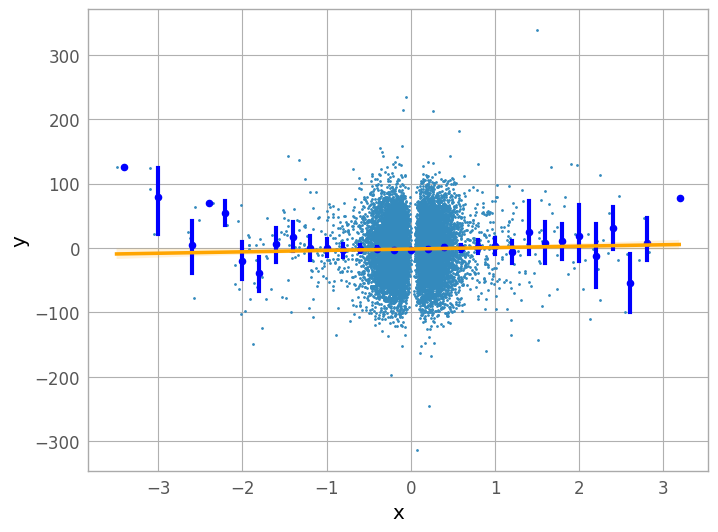

In [9]:
import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
import seaborn as sns 
import pandas as pd
ra_array = np.array(results1['ra']) * u.degree
dec_array = np.array(results1['dec']) * u.degree
distance_array = (np.array(results1['parallax']) * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec_array = np.array(results1['pmra']) * u.mas / u.yr
pm_dec_array = np.array(results1['pmdec']) * u.mas / u.yr
radial_velocity_array = np.array(results1['radial_velocity']) * u.km / u.s
radial_velocity_error = np.array(results1['radial_velocity_error']) * u.km / u.s
pm_ra_error = np.array(results1['pmra_error']) * u.mas / u.yr
pm_dec_error = np.array(results1['pmdec_error']) * u.mas / u.yr

# Function to transform coordinates
def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity):
    c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                 pm_dec=pm_dec, radial_velocity=radial_velocity)
    g = c.transform_to(Galactocentric(galcen_distance=8.2 * u.kpc,  # Default distance to Galactic Center
                                      z_sun=0.020 * u.kpc,  # Default Sun's height above the Galactic plane
                                      galcen_v_sun=[11.1,246, 7.25] * (u.km / u.s)))
    
    x, y, z = g.x.value, g.y.value, g.z.value
    v_x, v_y, v_z = g.v_x.value, g.v_y.value, g.v_z.value
    
    # Convert to cylindrical coordinates
    R = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    v_R = (x * v_x + y * v_y) / R
    v_phi = (x * v_y - y * v_x) / R
    return np.array([R, phi, z, v_R, v_phi, v_z, np.abs(z)])

plt.scatter((transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[2]),(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]),s=1)
x=transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[2]
y=transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]
B1=pd.DataFrame({'x': x, 'y': y})
sns.regplot(x='x', y='y', data=B1, x_bins=np.arange(-4, 4, 0.2), order=1, scatter_kws={'s':20,'color':'b'}, line_kws={'color':'orange'},label='GaiaDr3 ')
#plt.ylim(-20,30)#plt.xlim(-4,4)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


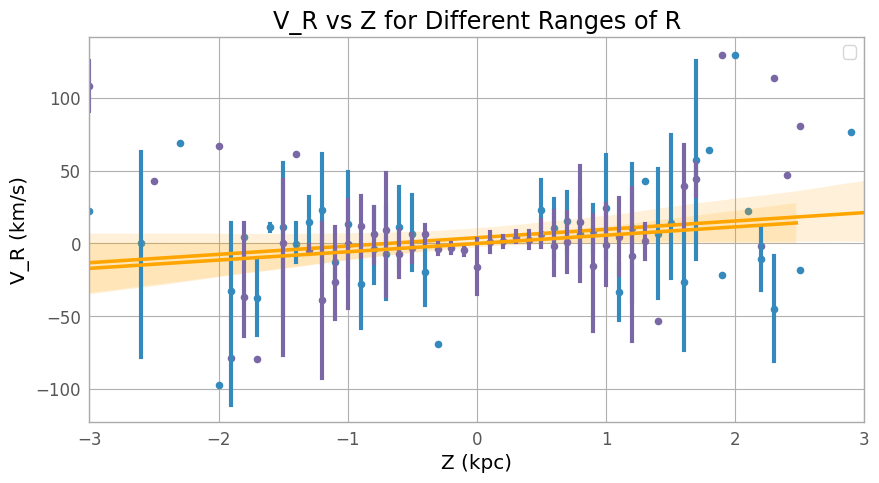

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `data` is an array of transformed coordinates [R, phi, z, v_R, v_phi, v_z, abs(z)]
def plot_vr_vs_z(data, r_ranges):
    plt.figure(figsize=(10, 5))
    
    for r_min, r_max in r_ranges:
        # Filter data for the given range of R
        mask = (data[0] >= r_min) & (data[0] < r_max)
        #R_filtered = data[0][mask]
        Z_filtered = data[2][mask]
        v_R_filtered = data[3][mask]
        B=pd.DataFrame({'x': Z_filtered, 'y':v_R_filtered })
        # Plot V_R vs Z
        sns.regplot(x='x', y='y', data=B, x_bins=np.arange(-3, 3, 0.1), order=1, scatter_kws={'s':20}, line_kws={'color':'orange'},label='')

    plt.xlabel('Z (kpc)')
    plt.ylabel('V_R (km/s)')
    plt.legend()
    plt.xlim(-3,3)
    #plt.ylim(-20,30)
    plt.title('V_R vs Z for Different Ranges of R')
    plt.grid(True)
    plt.show()

# Example usage:
# Generate sample data (Replace this with your actual transformed data)


# Define the ranges of R
r_ranges = [(5, 7), (7,8)]

# Plot V_R vs Z
plot_vr_vs_z(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array), r_ranges)


"n_bins=80\nbinned_scatter_plot([transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]],[transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[0]],n_bins)\n\n\nplt.scatter(a,b,color='r')\nbinned_scatter_plot([transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]],[transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[1]],n_bins)\n\nplt.scatter(a,c,color='r')\nbinned_scatter_plot([transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]],[transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[2]],n_bins)\n\nplt.scatter(a,d,color='r')"

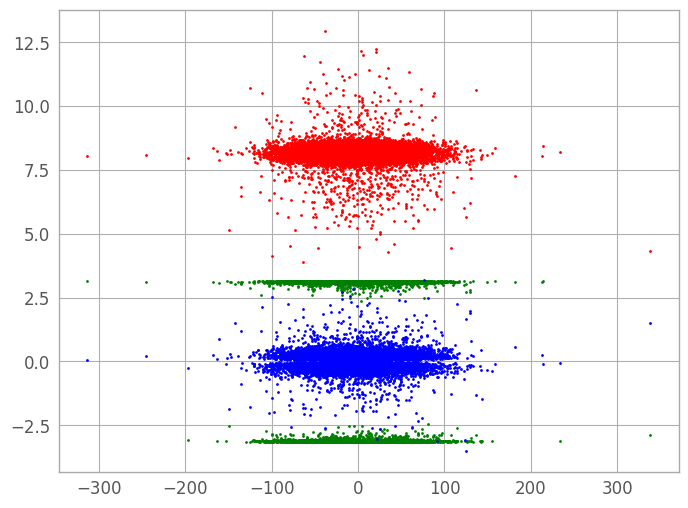

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
plt.grid(True)
plt.scatter(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3],transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[0],s=1,color='r')
plt.scatter(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3],transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[1],s=1,color='g')
plt.scatter(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3],transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[2],s=1,color='b')

def binned_scatter_plot(x_list, y_list, n_bins, smooth=True, colors=None, labels=None):
    """
    Create binned scatter plots from multiple unbinned x and y data sets.
    
    Parameters:
    x_list (list of array-like): List of arrays of x data points.
    y_list (list of array-like): List of arrays of y data points.
    n_bins (int): Number of bins to use for binning the data.
    smooth (bool): Whether to plot a smooth line through the binned data points.
    colors (list of str): List of colors for the points and lines in the plot.
    labels (list of str): List of labels for each dataset in the plot legend.
    """
    if colors is None:
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    
    if labels is None:
        labels = [f'Dataset {i+1}' for i in range(len(x_list))]
    
    plt.figure(figsize=(10, 6))
    
    for i, (x, y) in enumerate(zip(x_list, y_list)):
        color = colors[i % len(colors)]
        label = labels[i]
        
        # Create a DataFrame from the x and y data
        data = pd.DataFrame({'x': x, 'y': y})
        
        # Bin the data
        data['bin'] = pd.cut(data['x'], bins=n_bins, labels=False)
        
        # Calculate mean and standard error for each bin
        binned_data = data.groupby('bin').agg({
            'x': 'mean',
            'y': ['mean', 'sem']
        }).reset_index()
        
        # Flatten the MultiIndex columns
        binned_data.columns = ['bin', 'x_mean', 'y_mean', 'y_sem']
        
        # Plot the binned scatter plot with error bars
        
        plt.figure(figsize=(15, 6))
        #plt.scatter(x_list,y_list, color='blue', alpha=0.7,s=1, label='Data Points')
        plt.xlim(-5,5)
        #plt.ylim(-0.55,1)
        
        plt.errorbar(binned_data['x_mean'], binned_data['y_mean'], yerr=binned_data['y_sem'], fmt='o', color=color, label=f'{label} - Binned Data with Error Bars')

        plt.grid(True)
        if smooth:
            # Sort the binned data to ensure the smooth line is plotted correctly
            binned_data = binned_data.sort_values(by='x_mean')
            
            
            
            # Plot smooth regression line
           # plt.plot(x_smooth, y_smooth, color=color, linestyle='-', linewidth=2, alpha=0.8, label=f'{label} - Smooth Regression Line')

"""n_bins=80
binned_scatter_plot([transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]],[transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[0]],n_bins)


plt.scatter(a,b,color='r')
binned_scatter_plot([transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]],[transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[1]],n_bins)

plt.scatter(a,c,color='r')
binned_scatter_plot([transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]],[transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[2]],n_bins)

plt.scatter(a,d,color='r')"""

In [1]:
plt.scatter(Zu,u1,s=3.5,alpha=0.5)
plt.scatter(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3],transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[0],s=1,color='r')


NameError: name 'plt' is not defined

c:\Python311\Lib\site-packages\binsreg\binsreg.py:659: UserWarning: Confidence intervals/bands are valid when nbins is much larger than the IMSE-optimal choice. Compare your choice with the IMSE-optimal one obtained by binsregselect().
c:\Python311\Lib\site-packages\binsreg\binsreg.py:1096: UserWarning: Some bins have too few distinct values of x for CI.
c:\Python311\Lib\site-packages\binsreg\binsreg.py:1520: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


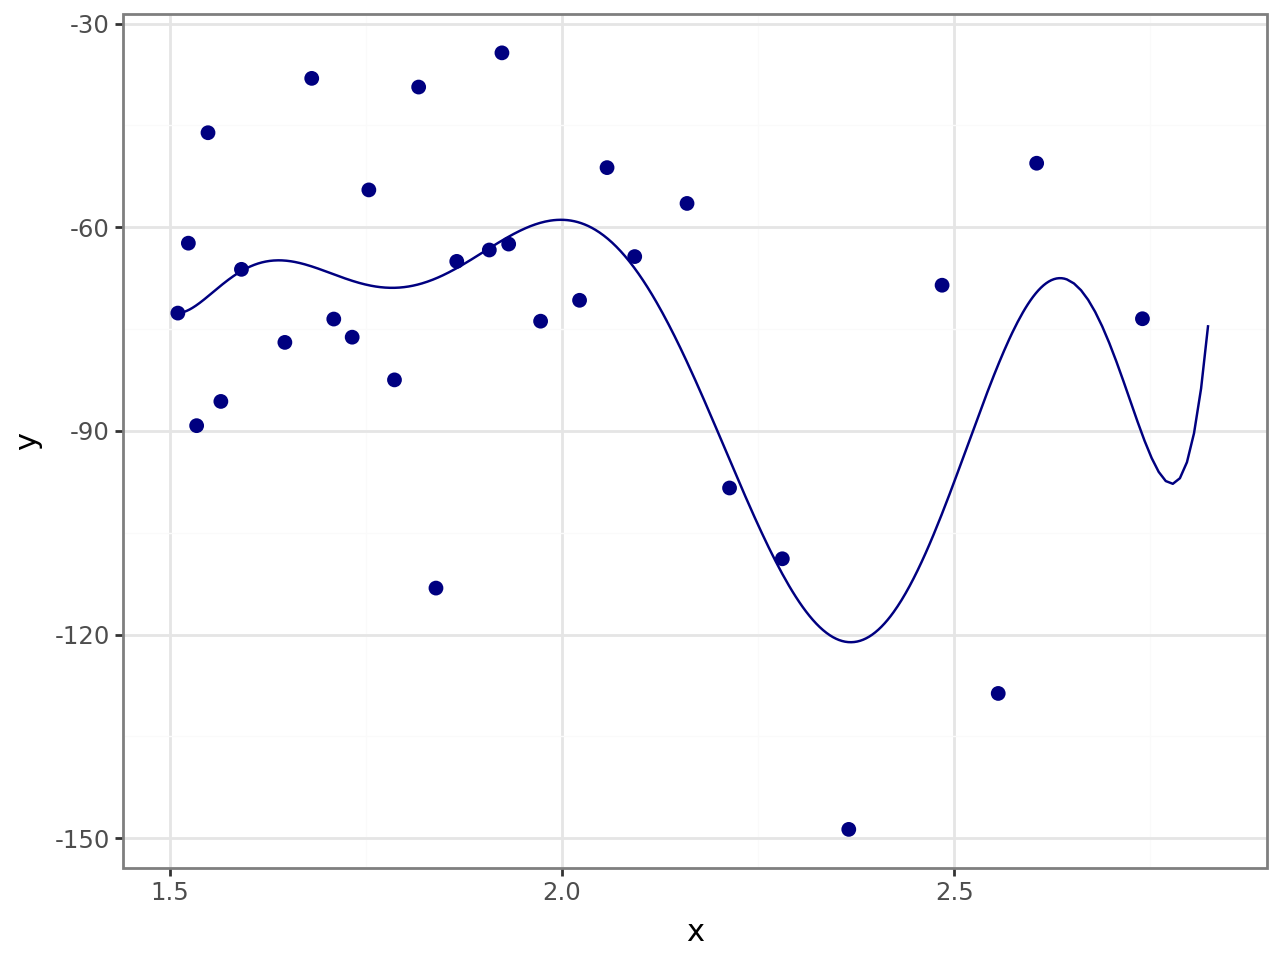

ValueError: All objects passed were None

In [13]:
import binsreg
import seaborn as sns

import numpy as np
import astropy.units as u
from astropy.coordinates import SkyCoord, Galactocentric
ra_array = np.array(results1['ra']) * u.degree
dec_array = np.array(results1['dec']) * u.degree
distance_array = (np.array(results1['parallax']) * u.mas).to(u.kpc, u.parallax())
pm_ra_cosdec_array = np.array(results1['pmra']) * u.mas / u.yr
pm_dec_array = np.array(results1['pmdec']) * u.mas / u.yr
radial_velocity_array = np.array(results1['radial_velocity']) * u.km / u.s
radial_velocity_error = np.array(results1['radial_velocity_error']) * u.km / u.s
pm_ra_error = np.array(results1['pmra_error']) * u.mas / u.yr
pm_dec_error = np.array(results1['pmdec_error']) * u.mas / u.yr

# Function to transform coordinates
def transform_to_galactocentric(ra, dec, distance, pm_ra_cosdec, pm_dec, radial_velocity):
    c = SkyCoord(ra=ra, dec=dec, distance=distance, pm_ra_cosdec=pm_ra_cosdec,
                 pm_dec=pm_dec, radial_velocity=radial_velocity)
    g = c.transform_to(Galactocentric(galcen_distance=8.2 * u.kpc,  # Default distance to Galactic Center
                                      z_sun=0.020 * u.kpc,  # Default Sun's height above the Galactic plane
                                      galcen_v_sun=[5, -5, 7.25] * (u.km / u.s)))
    return np.array([g.v_x.value, g.v_y.value, g.v_z.value ,np.abs(g.z.value)])

max(transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[2])
def binscatter(**kwargs):
    # Estimate binsreg
    est = binsreg.binsreg(**kwargs)
    
    # Retrieve estimates
    df_est = pd.concat([d.dots for d in est.data_plot])
    df_est = df_est.rename(columns={'x': kwargs.get("x"), 'fit': kwargs.get("y")})
    
    # Add confidence intervals
    if "ci" in kwargs:
        df_est = pd.merge(df_est, pd.concat([d.ci for d in est.data_plot]))
        df_est = df_est.drop(columns=['x'])
        df_est['ci'] = df_est['ci_r'] - df_est['ci_l']
    
    # Rename groups
    if "by" in kwargs:
        df_est['group'] = df_est['group'].astype(data[kwargs.get("by")].dtype)
        df_est = df_est.rename(columns={'group': kwargs.get("by")})

    return df_est
x = transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[3]
y=transform_to_galactocentric(ra_array,dec_array,distance_array,pm_ra_cosdec_array,pm_dec_array,radial_velocity_array)[1]
data = pd.DataFrame({'x': x, 'y': y})
# Estimate binsreg
filtered_data = data[(data['x'] >= 1.5) & (data['x'] <= 3)]

# Unbinned scatter plot using seaborn for filtered data
#plt.scatter(filtered_data['x'], filtered_data['y'], alpha=0.5, label='Unbinned')

# Binned scatter plot using binsreg for filtered data
df_est = binscatter(y='y',x='x', data=filtered_data, nbins=30,ci=(3,3),polyreg=10)
sns.regplot( data=filtered_data, x="x", y="y", x_bins=np.arange(1, 5, 0.1), order=6)
plt.scatter(a,c,color='r')
transformed_data = transform_to_galactocentric(ra_array, dec_array, distance_array, pm_ra_cosdec_array, pm_dec_array, radial_velocity_array)

x = transformed_data[3]
y1 = transformed_data[0]
y2 = transformed_data[1]
y3 = transformed_data[2]

# Create DataFrames
data1 = pd.DataFrame({'x': x, 'y': y1})
data2 = pd.DataFrame({'x': x, 'y': y2})
data3 = pd.DataFrame({'x': x, 'y': y3})

# Filter data
filtered_data1 = data1[(data1['x'] >= 1.5) & (data1['x'] <= 5)]
filtered_data2 = data2[(data2['x'] >= 1.5) & (data2['x'] <= 5)]
filtered_data3 = data3[(data3['x'] >= 1.5) & (data3['x'] <= 5)]

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(10, 10))
data_1200=pd.DataFrame({'x': Zu, 'y': u1})
# Plot (x, y1)
sns.regplot(ax=axes[0], x='x', y='y', data=filtered_data1, x_bins=np.arange(1, 5, 0.1), order=5, scatter_kws={'s':20,'color':'blue'}, line_kws={'color':'blue'})
sns.regplot(ax=axes[0], x='x', y='y', data=data_1200, x_bins=np.arange(1, 5, 0.5), order=5, scatter_kws={'s':20,'color':'orange'}, line_kws={'color':'orange'})

axes[0].scatter(filtered_data1['x'], filtered_data1['y'], alpha=0.1, color='blue',label='GaiaDR3 data ')
axes[0].scatter(a,b,color='black',label='Monibidens Data')
axes[0].set_xlabel(r'$Z(Kpc)$')
axes[0].set_ylabel(r'$U(km/s)$')
axes[0].set_ylim(-100,100)
axes[0].set_xlim(1,6)
axes[0].set_title(r'$Binned Scatter Plot for (Z, U)$')
axes[0].legend()
# Plot (x, y2)
sns.regplot(ax=axes[1], x='x', y='y', data=filtered_data2, x_bins=np.arange(1, 5, 0.1), order=6, scatter_kws={'s':20,'color':'green'}, line_kws={'color':'green'})
axes[1].scatter(filtered_data2['x'], filtered_data2['y'], alpha=0.1, color='green',label='GaiaDR3 data ')
axes[1].scatter(a,c,color='black',label='Monibidens Data')
axes[1].set_xlabel(r'$Z(Kpc)$')
axes[1].set_ylabel(r'$V(km/s)$')
axes[1].set_ylim(-200,0)
axes[1].set_title(r'$Binned Scatter Plot for (Z, V)$')
axes[1].legend()

# Plot (x, y3)
sns.regplot(ax=axes[2], x='x', y='y', data=filtered_data3, x_bins=np.arange(1, 5, 0.1), order=6, scatter_kws={'s':20,'color':'red'}, line_kws={'color':'red'})
axes[2].scatter(filtered_data3['x'], filtered_data3['y'], alpha=0.1, color='red',label='GaiaDR3 data ')
axes[2].scatter(a,d,color='black',label='Monibidens Data')
axes[2].set_xlabel(r'$Z(kpc)$')
axes[2].set_ylabel(r'$W(km/s)$')
axes[2].set_ylim(-20,20)
axes[2].set_title('Binned Scatter Plot for (Z, yW)')
axes[2].legend()

plt.tight_layout()
plt.show()


,bin,y,bin_center
0,"(1.0, 1.08]",153.204260,1.04
1,"(1.08, 1.16]",140.654324,1.12
2,"(1.16, 1.24]",229.611513,1.20
3,"(1.24, 1.32]",202.888411,1.28
4,"(1.32, 1.4]",179.616987,1.36
5,"(1.4, 1.48]",247.176573,1.44
6,"(1.48, 1.56]",301.768331,1.52
7,"(1.56, 1.64]",186.430736,1.60
8,"(1.64, 1.72]",207.960477,1.68
9,"(1.72, 1.8]",264.926137,1.76


C:\Users\sutir\AppData\Local\Temp\ipykernel_39516\1759097798.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sutir\AppData\Local\Temp\ipykernel_39516\1759097798.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
C:\Users\sutir\AppData\Local\Temp\ipykernel_39516\1759097798.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

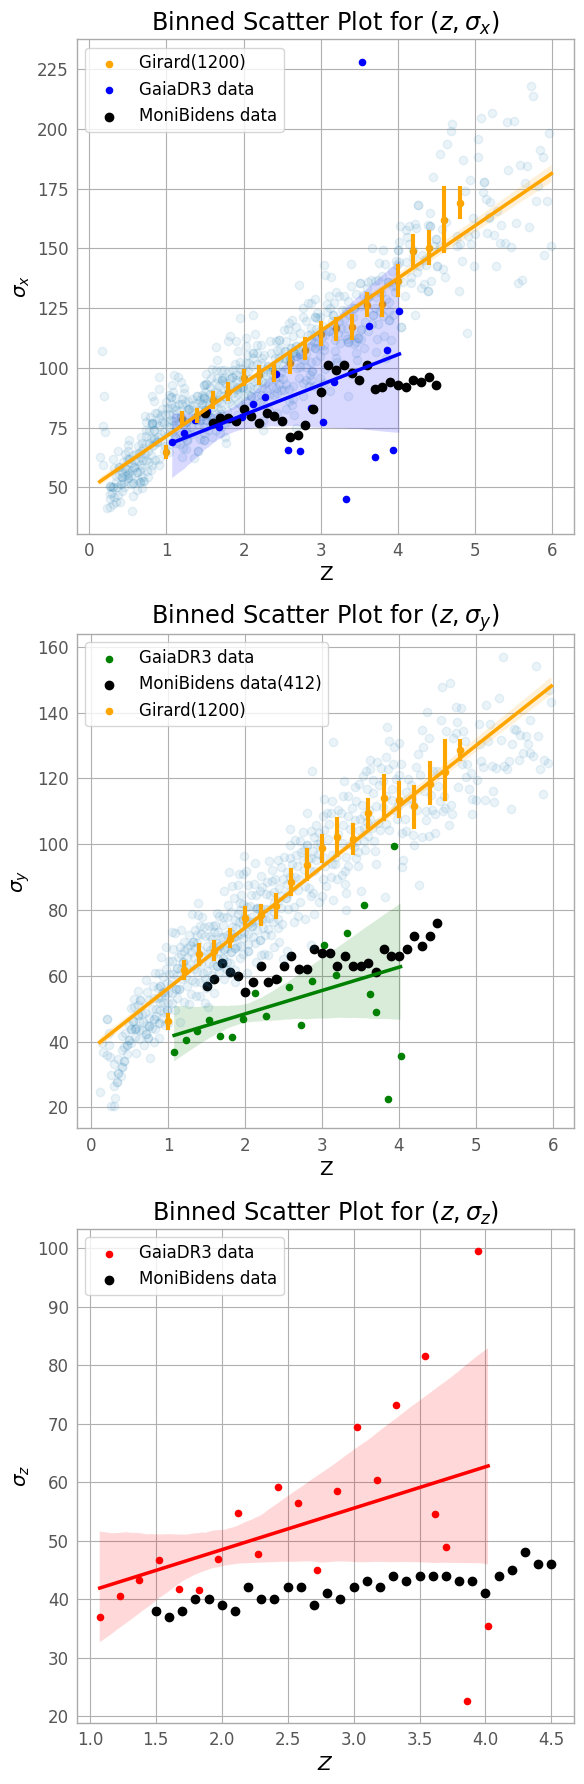

In [ ]:
import seaborn as sns
import pandas as pd

transformed_data = transform_to_galactocentric(ra_array, dec_array, distance_array, pm_ra_cosdec_array, pm_dec_array, radial_velocity_array)

x = transformed_data[3]
y1 = transformed_data[0]
y2 = transformed_data[1]
y3 = transformed_data[2]

# Create DataFrames
data1 = pd.DataFrame({'x': x, 'y': y1})
data2 = pd.DataFrame({'x': x, 'y': y2})
data3 = pd.DataFrame({'x': x, 'y': y3})
data_1200=pd.DataFrame({'x': Zu, 'y': u1})
# Filter data
filtered_data1 = data1[(data1['x'] >= 1) & (data1['x'] <= 5)]
filtered_data2 = data2[(data2['x'] >= 1) & (data2['x'] <= 5)]
filtered_data3 = data3[(data3['x'] >= 1) & (data3['x'] <= 5)]
filtered_data4 = data_1200[(data_1200['x'] >= 1) & (data_1200['x'] <= 5)]
# Function to calculate bin dispersion
def calculate_dispersion(data, x_col, y_col, bins):
    data['bin'] = pd.cut(data[x_col], bins=bins)
    dispersion = data.groupby('bin')[y_col].std().reset_index()
    dispersion['bin_center'] = dispersion['bin'].apply(lambda x: x.mid)
    return dispersion

def calculate_dispersion_for_ranges(data, x_col, y_col, bin_ranges):
    dispersions = []
    for bin_range in bin_ranges:
        bins = np.arange(bin_range[0], bin_range[1], bin_range[2])
        dispersion = calculate_dispersion(data, x_col, y_col, bins)
        dispersions.append(dispersion)
    combined_dispersion = pd.concat(dispersions).reset_index(drop=True)
    return combined_dispersion

# Define bin ranges
bin_ranges = [(1, 3.5, 0.15), (3.5, 5, 0.08)]  # Adjust bin size as needed


# Calculate dispersion for each filtered data
dispersion1 = calculate_dispersion_for_ranges(filtered_data1, 'x', 'y', bin_ranges)
dispersion2 = calculate_dispersion_for_ranges(filtered_data2, 'x', 'y', bin_ranges)
dispersion3 = calculate_dispersion_for_ranges(filtered_data3, 'x', 'y', bin_ranges)

# Plotting
fig, axes = plt.subplots(3, 1, figsize=(6, 18))
jk=pd.DataFrame({'x': j, 'y': k})
sns.regplot(ax=axes[0], x='x', y='y', data=jk, x_bins=np.arange(1, 5, 0.2), order=1, scatter_kws={'s':20,'color':'orange'}, line_kws={'color':'orange'},label='Girard(1200) ')
#sns.regplot(ax=axes[0], x='bin_center', y='y', data=dispersion_u_1200, x_bins=np.arange(1, 5, 0.05), order=1, scatter_kws={'s':20,'color':'orange'}, line_kws={'color':'orange'},label='Girard(1200) ')

axes[0].scatter(j,k,alpha=0.1)
# Plot (x, y1) with dispersion
sns.regplot(ax=axes[0], x='bin_center', y='y', data=dispersion1, x_bins=np.arange(1, 5, 0.000005), order=1, scatter_kws={'s':20,'color':'blue'}, line_kws={'color':'blue'},label='GaiaDR3 data ')
axes[0].scatter(a,e,color='black',label='MoniBidens data')
#axes[0].errorbar(dispersion1['bin_center'], dispersion1['y'], yerr=dispersion1['y'], fmt='o', color='blue', label='Dispersion')
axes[0].set_xlabel('Z')
axes[0].set_ylabel(r'$\sigma_{x}$')
axes[0].set_title(r'Binned Scatter Plot for $(z, \sigma_{x})$')
axes[0].legend()

# Plot (x, y2) with dispersion
sns.regplot(ax=axes[1], x='bin_center', y='y', data=dispersion2, x_bins=np.arange(1, 5, 0.000005), order=1, scatter_kws={'s':20,'color':'green'}, line_kws={'color':'green'},label='GaiaDR3 data ')

axes[1].scatter(a,f,color='black',label='MoniBidens data(412)')
hi=pd.DataFrame({'x': h, 'y': i})
axes[1].scatter(h,i,alpha=0.1)
sns.regplot(ax=axes[1], x='x', y='y', data=hi, x_bins=np.arange(1, 5, 0.2), order=1, scatter_kws={'s':20,'color':'orange'}, line_kws={'color':'orange'},label='Girard(1200) ')

#axes[1].errorbar(dispersion2['bin_center'], dispersion2['y'], yerr=dispersion2['y'], fmt='o', color='green', label='Dispersion')
axes[1].set_xlabel('Z')
axes[1].set_ylabel(r'$\sigma_{y}$')
axes[1].set_title(r'Binned Scatter Plot for $(z, \sigma_{y})$')
axes[1].legend()
# Plot (x, y3) with dispersion
sns.regplot(ax=axes[2], x='bin_center', y='y', data=dispersion2, x_bins=np.arange(1, 5, 0.000005), order=1, scatter_kws={'s':20,'color':'red'}, line_kws={'color':'red'},label='GaiaDR3 data ')
axes[2].scatter(a,g,color='black',label='MoniBidens data')
#axes[2].errorbar(dispersion3['bin_center'], dispersion3['y'], yerr=dispersion3['y'], fmt='o', color='red', label='Dispersion')
axes[2].set_xlabel(r'$Z$')
axes[2].set_ylabel(r'$\sigma_{z}$')
axes[2].set_title(r'Binned Scatter Plot for $(z, \sigma_{z})$')
axes[2].legend()
plt.tight_layout()
plt.show()

C:\Users\sutir\AppData\Local\Temp\ipykernel_39516\1181847471.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\sutir\AppData\Local\Temp\ipykernel_39516\1181847471.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
C:\Users\sutir\AppData\Local\Temp\ipykernel_39516\1181847471.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vie

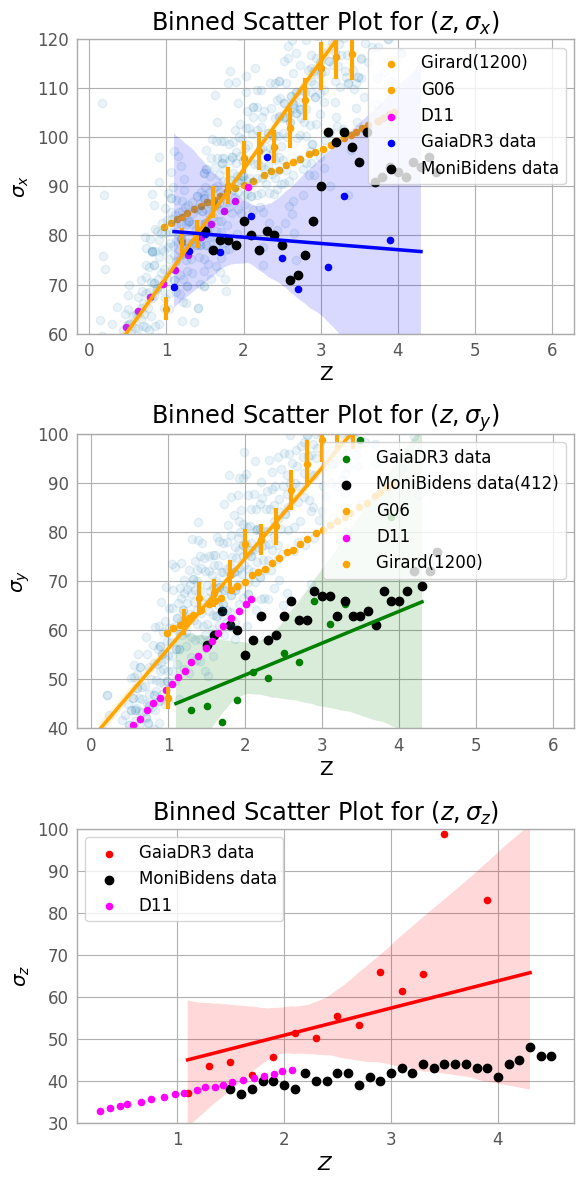

In [ ]:
import seaborn as sns
import pandas as pd

transformed_data = transform_to_galactocentric(ra_array, dec_array, distance_array, pm_ra_cosdec_array, pm_dec_array, radial_velocity_array)

x = transformed_data[3]
y1 = transformed_data[0]
y2 = transformed_data[1]
y3 = transformed_data[2]

# Create DataFrames
data1 = pd.DataFrame({'x': x, 'y': y1})
data2 = pd.DataFrame({'x': x, 'y': y2})
data3 = pd.DataFrame({'x': x, 'y': y3})
data_1200=pd.DataFrame({'x': Zu, 'y': u1})
# Filter data
filtered_data1 = data1[(data1['x'] >= 1) & (data1['x'] <= 4.5)]
filtered_data2 = data2[(data2['x'] >= 1) & (data2['x'] <= 4.5)]
filtered_data3 = data3[(data3['x'] >= 1) & (data3['x'] <= 4.5)]
filtered_data4 = data_1200[(data_1200['x'] >= 1) & (data_1200['x'] <= 4.5)]
# Function to calculate bin dispersion
def calculate_dispersion(data, x_col, y_col, bins):
    data['bin'] = pd.cut(data[x_col], bins=bins)
    dispersion = data.groupby('bin')[y_col].std().reset_index()
    dispersion['bin_center'] = dispersion['bin'].apply(lambda x: x.mid)
    return dispersion

# Calculate dispersion
bins1 = np.arange(1, 5, 0.2)  # Adjust bin size as needed
bins2 = np.arange(1, 5, 0.2)  # Adjust bin size as needed
bins3 = np.arange(1, 5, 0.2)  # Adjust bin size as needed

dispersion1 = calculate_dispersion(filtered_data1, 'x', 'y', bins1)
dispersion2 = calculate_dispersion(filtered_data2, 'x', 'y', bins2)
dispersion3 = calculate_dispersion(filtered_data3, 'x', 'y', bins3) 





#dispersion_u_1200=calculate_dispersion(filtered_data4, 'x', 'y', bins) 
g06x1 = [0.9749552540860926, 1.0572510217791196, 1.1344123033315745, 1.1993890753093455, 1.2684275779501528, 1.357772004248439, 1.4471157481323003, 1.5283373955189388, 1.613620091154189, 1.6907806902922184, 1.79230757892191, 1.893834467551603, 2.0034834526785175, 2.1293779956287255, 2.2593322219986933, 2.360859793042812, 2.466447729921115, 2.5476693773077552, 2.6410741694402264, 2.730417913324086, 2.8481896773626483, 2.9294120071637133, 3.0349992616275903, 3.132465784423099, 3.2096263835611265, 3.3030311756935995, 3.388313188914423, 3.4573516915552296, 3.534513655522111, 3.6076118415826777, 3.7375674327814967, 3.7375674327814967, 3.8025442047592666, 3.8797061687261474, 3.9446829407039186]
g06y1 = [81.79686882271196, 82.58215256997255, 83.32704671966675, 83.75269541052243, 84.49758956021662, 85.34889588262475, 86.09378556197058, 86.83867971166477, 87.26432840252045, 88.00922255221465, 88.9669365769883, 89.60541855396859, 90.24389606060049, 91.20161455572253, 92.37215739627241, 93.1170515459666, 93.32987589139445, 94.3940065592304, 94.92607636349676, 95.6709660428426, 96.62868006761624, 97.05433769916868, 97.6928152058006, 98.54411705786033, 99.28901120755454, 99.92748871418644, 100.45955404810442, 101.0980360250847, 101.84292570443051, 102.58781761895051, 103.33270953347053, 103.33270953347053, 103.97118927527661, 104.82249559768474, 105.24814652371461]
D11x1 = [0.48173340361292, 0.6272111933435657, 0.7888512863375441, 0.9558804060529608, 1.1175211814613661, 1.27916195686977, 1.4461910765851866, 1.5808914952873827, 1.7533089593098108, 1.8933977223190184, 2.0604268420344356]
D11y1 = [61.38790905992653, 64.49393840318152, 67.45878967441168, 70.14127139054713, 72.964926708359, 76.0709694626591, 79.60055090338197, 82.28302814916904, 84.96550986530448, 86.94207886957406, 89.90692567045586]
# Plotting
fig, axes = plt.subplots(3, 1, figsize=(6, 12))
jk=pd.DataFrame({'x': j, 'y': k})
sns.regplot(ax=axes[0], x='x', y='y', data=jk, x_bins=np.arange(1, 4, 0.2), order=1, scatter_kws={'s':20,'color':'orange'}, line_kws={'color':'orange'},label='Girard(1200) ')
#sns.regplot(ax=axes[0], x='bin_center', y='y', data=dispersion_u_1200, x_bins=np.arange(1, 5, 0.05), order=1, scatter_kws={'s':20,'color':'orange'}, line_kws={'color':'orange'},label='Girard(1200) ')
axes[0].scatter(g06x1,g06y1,color='orange',label='G06',s=20)
axes[0].scatter(D11x1,D11y1,color='magenta',label='D11',s=20)
axes[0].scatter(j,k,alpha=0.1)
# Plot (x, y1) with dispersion
sns.regplot(ax=axes[0], x='bin_center', y='y', data=dispersion1, x_bins=np.arange(1, 5, 0.000005), order=1, scatter_kws={'s':20,'color':'blue'}, line_kws={'color':'blue'},label='GaiaDR3 data ')
axes[0].scatter(a,e,color='black',label='MoniBidens data')
#axes[0].errorbar(dispersion1['bin_center'], dispersion1['y'], yerr=dispersion1['y'], fmt='o', color='blue', label='Dispersion')
axes[0].set_xlabel('Z')
axes[0].set_ylabel(r'$\sigma_{x}$')
axes[0].set_title(r'Binned Scatter Plot for $(z, \sigma_{x})$')
axes[0].set_ylim(60,120)
axes[0].legend()






g06x2 = [0.9856628937631621, 1.0663081763439866, 1.1559138939588192, 1.2634411652790416, 1.3261648941544761, 1.4247310468033179, 1.532258318123541, 1.6039424820329835, 1.684587764613808, 1.8100359060020483, 1.8906811885828723, 1.9982077762657233, 2.087813493880557, 2.168458776461381, 2.2580644940762133, 2.347670211691046, 2.4462363643398883, 2.5448025169887307, 2.6254477995695535, 2.715053517184387, 2.8046592347992196, 2.9211469411534527, 3.010752658768285, 3.1003583763831175, 3.1899640939979514, 3.297490681680801, 3.369175529227616, 3.485662551944476, 3.5842287045933183, 3.6827955408795314, 3.754479704788976, 3.8440854224038086, 3.906809834916614]
g06y2 = [59.37984553432746, 60.542633309257354, 61.12402719672231, 62.48061786269011, 63.06201175015506, 64.03100402687143, 65.38759469283922, 65.96898858030417, 66.5503898605935, 68.29457152298835, 69.0697683014912, 69.84495768716967, 71.20154835313747, 71.97674513164031, 72.55813901910528, 73.72092679403517, 74.68991907075153, 76.04650973671934, 76.43410812597077, 77.59689590090065, 78.56588817761704, 79.92247884358483, 80.50387273104978, 81.47286500776616, 82.248061786269, 83.02325856477185, 83.99225084148821, 85.15503861641812, 85.93023539492097, 87.4806215591023, 88.25581094478076, 89.22480322149715, 89.80620450178647]
D11x2 = [0.5465954243603783, 0.6337202219524429, 0.7192521444678893, 0.7966378440593074, 0.8862428780367677, 0.9758472283768566, 1.053233611605646, 1.1306193111970635, 1.212078122250496, 1.2894638218419128, 1.3872143951060307, 1.4849649683701491, 1.5664237794235818, 1.6519557019390276, 1.7171220671444012, 1.8108002125838767, 1.9207694365966674, 2.0063013591121126, 2.075541519416873]
D11y2 = [40.58137910181619, 42.0002025633879, 43.67390103817432, 45.083328219963136, 46.22849150157873, 47.90218258354075, 49.13543876043035, 50.456765654120794, 51.60192893573639, 53.45180580824639, 54.77314748758559, 56.44684596237199, 57.85627314416081, 59.44187133084884, 60.851298512637655, 62.43690409215007, 64.02251706448686, 65.43194424627566, 66.31283623489368]
# Plot (x, y2) with dispersion
sns.regplot(ax=axes[1], x='bin_center', y='y', data=dispersion2, x_bins=np.arange(1, 5, 0.000005), order=1, scatter_kws={'s':20,'color':'green'}, line_kws={'color':'green'},label='GaiaDR3 data ')

axes[1].scatter(a,f,color='black',label='MoniBidens data(412)')
hi=pd.DataFrame({'x': h, 'y': i})
axes[1].scatter(h,i,alpha=0.1)
axes[1].scatter(g06x2,g06y2,color='orange',label='G06',s=20)
axes[1].scatter(D11x2,D11y2,color='magenta',label='D11',s=20)
sns.regplot(ax=axes[1], x='x', y='y', data=hi, x_bins=np.arange(1, 5, 0.2), order=1, scatter_kws={'s':20,'color':'orange'}, line_kws={'color':'orange'},label='Girard(1200) ')
axes[1].set_ylim(40,100)
#axes[1].errorbar(dispersion2['bin_center'], dispersion2['y'], yerr=dispersion2['y'], fmt='o', color='green', label='Dispersion')
axes[1].set_xlabel('Z')
axes[1].set_ylabel(r'$\sigma_{y}$')
axes[1].set_title(r'Binned Scatter Plot for $(z, \sigma_{y})$')
axes[1].legend()
# Plot (x, y3) with dispersion





D11x3 = [0.27678557804652587, 0.37500040871756385, 0.4642861230032784, 0.5357142857142856, 0.660714421953474, 0.7589285714285715, 0.8750002724783769, 0.9821428571428568, 1.0625001362391877, 1.187500272478376, 1.258928435189384, 1.3571432658604212, 1.4285714285714286, 1.517857142857143, 1.6160712923322404, 1.7232145581926623, 1.812500272478376, 1.9107144219534742, 1.982143265860422, 2.071428980146136]
D11y3 = [32.94117691057646, 33.52941827653149, 34.01961442829423, 34.60784831444958, 35.09804446621233, 35.68627835236768, 36.17647450413041, 36.86274612467839, 37.1568668076559, 37.84313842820387, 38.52941752855153, 38.62745526294414, 39.11765141470687, 39.705885300862235, 40.196081452624966, 40.78431533878033, 41.17647375615046, 41.66666990791319, 42.35294900826084, 42.54902447704606]
sns.regplot(ax=axes[2], x='bin_center', y='y', data=dispersion2, x_bins=np.arange(1, 5, 0.000005), order=1, scatter_kws={'s':20,'color':'red'}, line_kws={'color':'red'},label='GaiaDR3 data ')
axes[2].scatter(a,g,color='black',label='MoniBidens data')
#axes[2].errorbar(dispersion3['bin_center'], dispersion3['y'], yerr=dispersion3['y'], fmt='o', color='red', label='Dispersion')
axes[2].scatter(D11x3,D11y3,color='magenta',label='D11',s=20)
axes[2].set_ylim(30,100)
axes[2].set_xlabel(r'$Z$')
axes[2].set_ylabel(r'$\sigma_{z}$')
axes[2].set_title(r'Binned Scatter Plot for $(z, \sigma_{z})$')
axes[2].legend()
plt.tight_layout()
plt.show()

In [ ]:
len(j)

717

In [1]:
import scipy
import scipy.optimize
plt.scatter(j,k, marker='o', alpha=0.3)
line = lambda x, m, c: m*x**2+c
j = np.array(j)
k = np.array(k)
idx = np.where((j <= 4) & (j >= 1))[0]
xdata = j[idx]
ydata = k[idx]
p0 = [1,1]
popt, _ = scipy.optimize.curve_fit(line, xdata, ydata, p0)
plt.plot([1,4], [line(1, *popt), line(4, *popt)])
plt.plot([1,4], [81.5, 102])
plt.xlim(0, 6)
plt.ylim(0, 240)

NameError: name 'plt' is not defined

: 

In [ ]:
e1=[5
,5
,5
,5
,5
,6
,6
,6
,7
,6
,7
,7
,7
,7
,7
,7
,8
,8
,8
,8
,9
,9
,9
,9
,10
,9
,10
,10
,10
,10
,11]


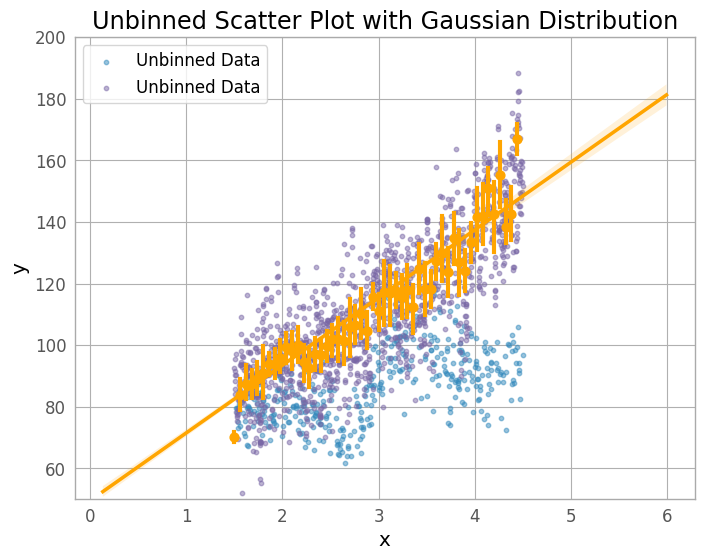

1200

In [ ]:
plt.errorbar(a,b,b1)
import matplotlib.pyplot as plt
import numpy as np
jk=pd.DataFrame({'x': j, 'y': k})
# Example binned data
x_binned = a
y_binned =e
y_err =e1

n_points = 412

# Generate unbinned data with Gaussian spread
x_unbinned = []
y_unbinned = []

# Spread the x values uniformly across the entire range
x_unbinned = np.random.uniform(min(x_binned), max(x_binned), n_points)

# Spread the y values according to Gaussian distribution around the binned points
for x in x_unbinned:
    closest_x_index = np.argmin(np.abs(x_binned - x))
    y_unbinned.append(np.random.normal(y_binned[closest_x_index], y_err[closest_x_index]))

y_unbinned = np.array(y_unbinned)

# Plot the unbinned data
plt.scatter(x_unbinned, y_unbinned, alpha=0.5, label='Unbinned Data', s=10)
#plt.errorbar(x_binned, y_binned, yerr=y_err, fmt='o', color='red', label='Binned Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Unbinned Scatter Plot with Gaussian Distribution')
plt.legend()
#sns.regplot(x='x', y='y', data=jk, x_bins=np.arange(1.5, 4.5, 0.06), order=1, scatter_kws={'s':40,'color':'orange'}, line_kws={'color':'orange'},label='Girard(1200) ')
plt.ylim(50,200)




x_binned1 = j
y_binned1 =k
y_err1 =np.random.randint(low=5, high=10, size=len(k))

n_points1 = 1200
# Generate unbinned data with Gaussian spread
x_unbinned1 = []
y_unbinned1 = []

# Spread the x values uniformly across the entire range
x_unbinned1 = np.random.uniform(1.5, 4.5, n_points1)

# Spread the y values according to Gaussian distribution around the binned points
for x in x_unbinned1:
    closest_x_index = np.argmin(np.abs(x_binned1 - x))
    y_unbinned1.append(np.random.normal(y_binned1[closest_x_index], y_err1[closest_x_index]))

y_unbinned1 = np.array(y_unbinned1)

# Plot the unbinned data
plt.scatter(x_unbinned1, y_unbinned1, alpha=0.5, label='Unbinned Data', s=10)
#plt.errorbar(x_binned1, y_binned1, yerr=y_err1, fmt='o', color='red', label='Binned Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Unbinned Scatter Plot with Gaussian Distribution')
plt.legend()
sns.regplot(x='x', y='y', data=jk, x_bins=np.arange(1.5, 4.5, 0.06), order=1, scatter_kws={'s':40,'color':'orange'}, line_kws={'color':'orange'},label='Girard(1200) ')
plt.ylim(50,200)



plt.show()

len(x_unbinned1)


IndexError: list index out of range

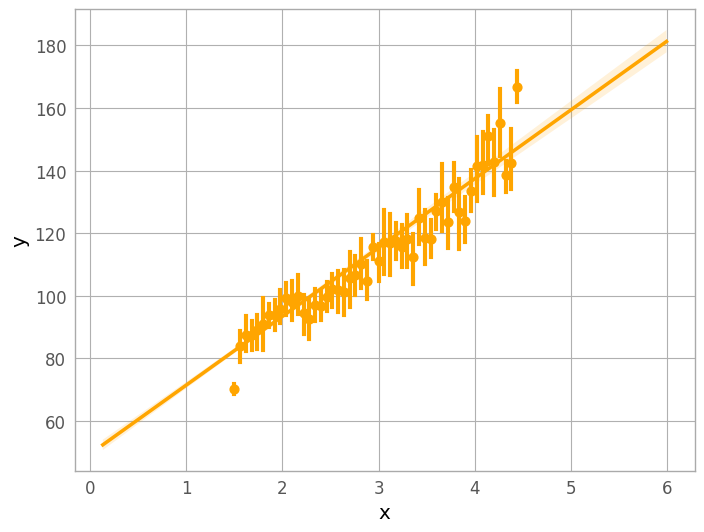

In [ ]:
ax=sns.regplot(x='x', y='y', data=jk, x_bins=np.arange(1.5, 4.5, 0.06), order=1, scatter_kws={'s':40,'color':'orange'}, line_kws={'color':'orange'},label='Girard(1200) ')
